# Ev Fiyat Tahmin Modeli

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

In [3]:
#!pip install lightgbm
#!pip install catboost
#!pip install xgboost

## Exploratory Data Analysis

### Genel Resim

In [6]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [7]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053             0   
5   6          50       RL         85.0    14115   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin            5            5       1993          1995     Gable  CompShg     VinylSd     VinylSd        NaN         0.0        TA        TA       Wood       Gd       TA           No          GLQ         732          Unf           0         64          796    GasA        Ex          Y      SBrkr       796       566             0   
6   7          20       RL         75.0    10084   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story            8            5       2004          2005     Gable  CompShg     VinylSd     VinylSd      Stone       186.0        Gd        TA      PConc       Ex       TA           Av          GLQ        1369          Unf           0        317         1686    GasA        Ex          Y      SBrkr      1694         0             0   
7   8          60  

In [8]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            5       1999          2000     Gable  CompShg     VinylSd     VinylSd        NaN         0.0        TA        TA      PConc       Gd       TA           No          Unf           0          Unf           0        953          953    GasA        Ex          Y      SBrkr       953       694   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story            6            6       1978          1988     Gable  CompShg     Plywood     Plywood      Stone       119.0        TA        TA     CBlock       Gd       TA           No          ALQ         790          Rec         163        589         1542    GasA        TA          Y      SBrkr      2073         0   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            9       1941          2006     Gable  CompShg     CemntBd     CmentBd        NaN         0.0        Ex        Gd      Stone       TA       Gd           No          GLQ         275          Unf           0        877         1152    GasA        Ex          Y      SBrkr      1188      1152   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story            5            6       1950          1996       Hip  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       TA       TA           Mn          GLQ          49          Rec        1029          0         1078    GasA        Gd          Y      FuseA      1078         0   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam     1Story            5            6       1965          1965     Gable  CompShg     HdBoard     HdBoard        NaN         0.0        Gd        TA     CBlock       TA       TA           No          BLQ         830          LwQ         290        136         1256    GasA        Gd          Y      SBrkr      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
1455             0       1647             0             0         2         1             3             1          TA             7        Typ           1          TA     Attchd       1999.0          RFn           2         460         TA         TA          Y           0           40              0          0            0         0    NaN    NaN         NaN        0       8    2007       WD        Normal     175000  
1456             0       2073             1             0         2         0             3             1          TA             7       Min1           2          TA     Attchd       1978.0          Unf           2         500  

In [9]:
df.drop("Id", axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T

count           mean           std      min        1%        5%        25%       50%        75%        95%        99%      100%       max
MSSubClass     1460.0      56.897260     42.300571     20.0     20.00     20.00      20.00      50.0      70.00     160.00     190.00     190.0     190.0
LotFrontage    1201.0      70.049958     24.284752     21.0     21.00     34.00      59.00      69.0      80.00     107.00     141.00     313.0     313.0
LotArea        1460.0   10516.828082   9981.264932   1300.0   1680.00   3311.70    7553.50    9478.5   11601.50   17401.15   37567.64  215245.0  215245.0
OverallQual    1460.0       6.099315      1.382997      1.0      3.00      4.00       5.00       6.0       7.00       8.00      10.00      10.0      10.0
OverallCond    1460.0       5.575342      1.112799      1.0      3.00      4.00       5.00       5.0       6.00       8.00       9.00       9.0       9.0
YearBuilt      1460.0    1971.267808     30.202904   1872.0   1899.18   1916.00    1954.00    1973.0    2000.00    2007.00    2009.00    2010.0    2010.0
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0   1950.00   1950.00    1967.00    1994.0    2004.00    2007.00    2009.00    2010.0    2010.0
MasVnrArea     1452.0     103.685262    181.066207      0.0      0.00      0.00       0.00       0.0     166.00     456.00     791.92    1600.0    1600.0
BsmtFinSF1     1460.0     443.639726    456.098091      0.0      0.00      0.00       0.00     383.5     712.25    1274.00    1572.41    5644.0    5644.0
BsmtFinSF2     1460.0      46.549315    161.319273      0.0      0.00      0.00       0.00       0.0       0.00     396.20     830.38    1474.0    1474.0
BsmtUnfSF      1460.0     567.240411    441.866955      0.0      0.00      0.00     223.00     477.5     808.00    1468.00    1797.05    2336.0    2336.0
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0      0.00    519.30     795.75     991.5    1298.25    1753.00    2155.05    6110.0    6110.0
1stFlrSF       1460.0    1162.626712    386.587738    334.0    520.00    672.95     882.00    1087.0    1391.25    1831.25    2219.46    4692.0    4692.0
2ndFlrSF       1460.0     346.992466    436.528436      0.0      0.00      0.00       0.00       0.0     728.00    1141.05    1418.92    2065.0    2065.0
LowQualFinSF   1460.0       5.844521     48.623081      0.0      0.00      0.00       0.00       0.0       0.00       0.00     360.00     572.0     572.0
GrLivArea      1460.0    1515.463699    525.480383    334.0    692.18    848.00    1129.50    1464.0    1776.75    2466.10    3123.48    5642.0    5642.0
BsmtFullBath   1460.0       0.425342      0.518911      0.0      0.00      0.00       0.00       0.0       1.00       1.00       2.00       3.0       3.0
BsmtHalfBath   1460.0       0.057534      0.238753      0.0      0.00      0.00       0.00       0.0       0.00       1.00       1.00       2.0       2.0
FullBath       1460.0       1.565068      0.550916      0.0      1.00      1.00       1.00       2.0       2.00       2.00       3.00       3.0       3.0
HalfBath       1460.0       0.382877      0.502885      0.0      0.00      0.00       0.00       0.0       1.00       1.00       1.00       2.0       2.0
BedroomAbvGr   1460.0       2.866438      0.815778      0.0      1.00      2.00       2.00       3.0       3.00       4.00       5.00       8.0       8.0
KitchenAbvGr   1460.0       1.046575      0.220338      0.0      1.00      1.00       1.00       1.0       1.00       1.00       2.00       3.0       3.0
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0      3.00      4.00       5.00       6.0       7.00      10.00      11.00      14.0      14.0
Fireplaces     1460.0       0.613014      0.644666      0.0      0.00      0.00       0.00       1.0       1.00       2.00       2.00       3.0       3.0
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0   1916.00   1930.00    1961.00    1980.0    2002.00    2007.00    2009.00    2010.0    2010.0
GarageCars  

In [12]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

### Kategorik ve Numeric Değişken Analizleri

In [14]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
num_cols = [col for col in num_cols if col not in ["SalePrice"]]

Observations: 1460
Variables: 80
cat_cols: 53
num_cols: 26
cat_but_car: 1
num_but_cat: 11


In [15]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

In [16]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold']

In [17]:
cat_but_car

['Neighborhood']

In [18]:
df.drop("Neighborhood",axis=1, inplace=True)

In [19]:
num_but_cat

['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

#### Kategorik Değişken Analizi

          MSZoning      Ratio
MSZoning                     
RL            1151  78.835616
RM             218  14.931507
FV              65   4.452055
RH              16   1.095890
C (all)         10   0.684932
##########################################


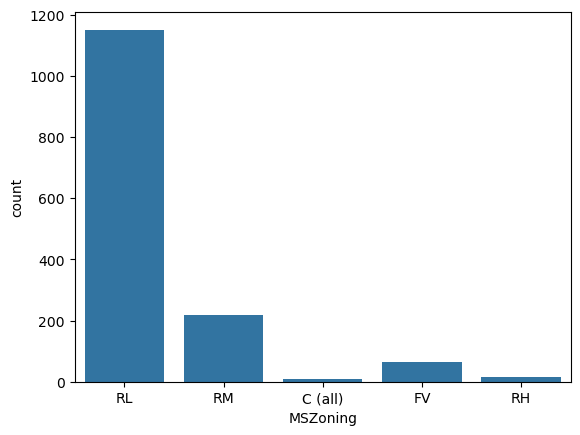

        Street      Ratio
Street                   
Pave      1454  99.589041
Grvl         6   0.410959
##########################################


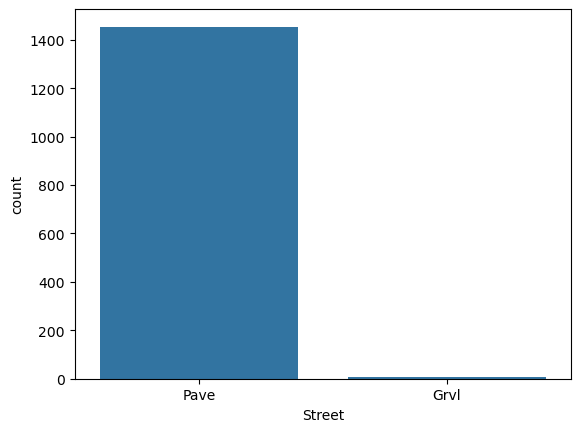

       Alley     Ratio
Alley                 
Grvl      50  3.424658
Pave      41  2.808219
##########################################


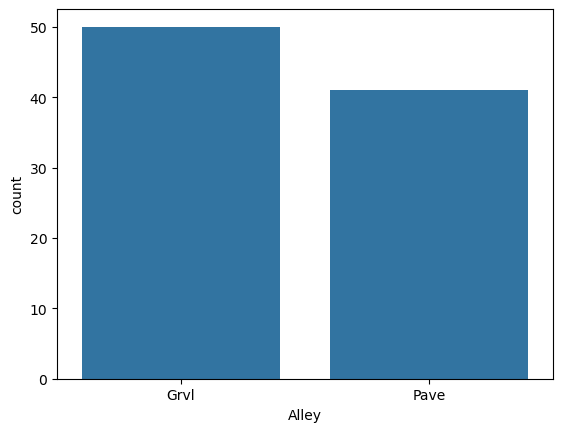

          LotShape      Ratio
LotShape                     
Reg            925  63.356164
IR1            484  33.150685
IR2             41   2.808219
IR3             10   0.684932
##########################################


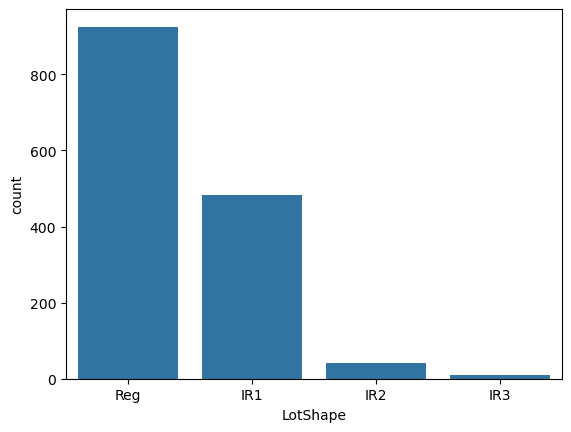

             LandContour      Ratio
LandContour                        
Lvl                 1311  89.794521
Bnk                   63   4.315068
HLS                   50   3.424658
Low                   36   2.465753
##########################################


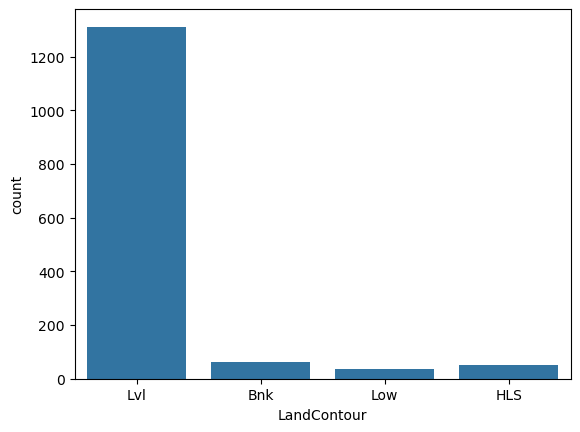

           Utilities      Ratio
Utilities                      
AllPub          1459  99.931507
NoSeWa             1   0.068493
##########################################


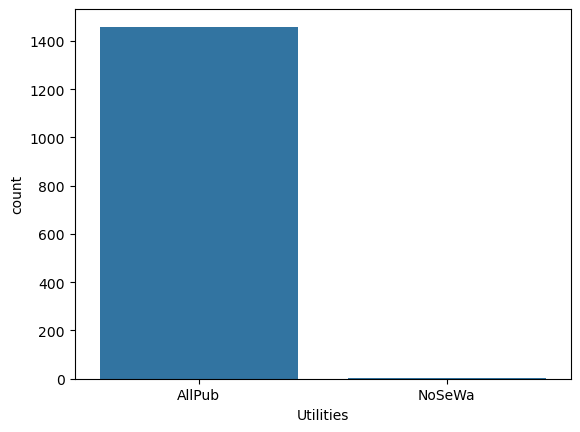

           LotConfig      Ratio
LotConfig                      
Inside          1052  72.054795
Corner           263  18.013699
CulDSac           94   6.438356
FR2               47   3.219178
FR3                4   0.273973
##########################################


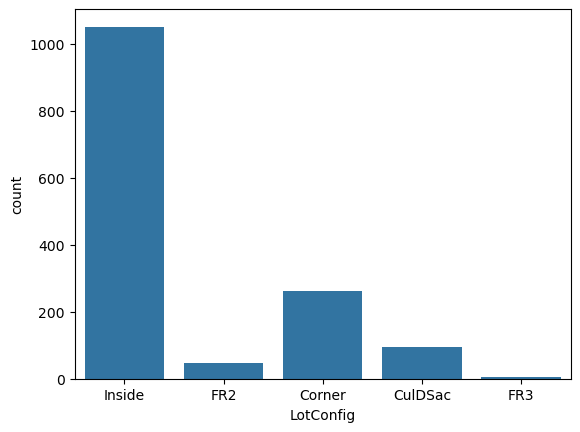

           LandSlope      Ratio
LandSlope                      
Gtl             1382  94.657534
Mod               65   4.452055
Sev               13   0.890411
##########################################


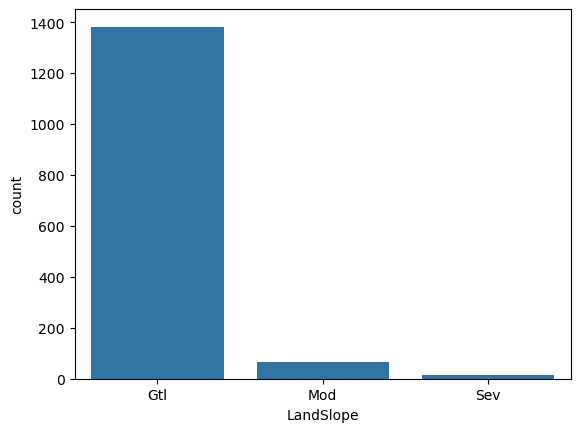

            Condition1      Ratio
Condition1                       
Norm              1260  86.301370
Feedr               81   5.547945
Artery              48   3.287671
RRAn                26   1.780822
PosN                19   1.301370
RRAe                11   0.753425
PosA                 8   0.547945
RRNn                 5   0.342466
RRNe                 2   0.136986
##########################################


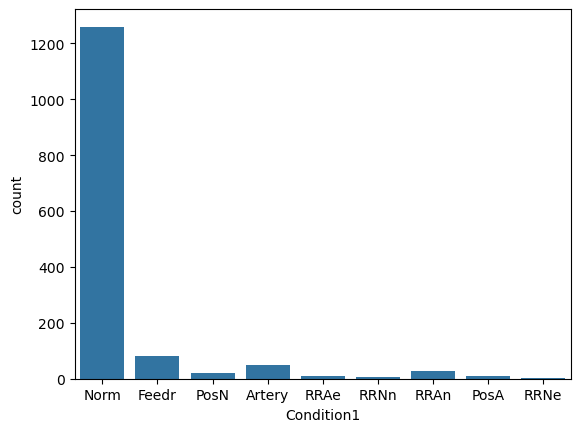

            Condition2      Ratio
Condition2                       
Norm              1445  98.972603
Feedr                6   0.410959
Artery               2   0.136986
RRNn                 2   0.136986
PosN                 2   0.136986
PosA                 1   0.068493
RRAn                 1   0.068493
RRAe                 1   0.068493
##########################################


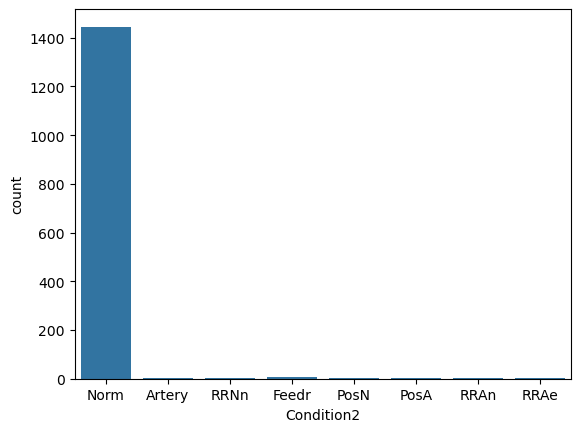

          BldgType      Ratio
BldgType                     
1Fam          1220  83.561644
TwnhsE         114   7.808219
Duplex          52   3.561644
Twnhs           43   2.945205
2fmCon          31   2.123288
##########################################


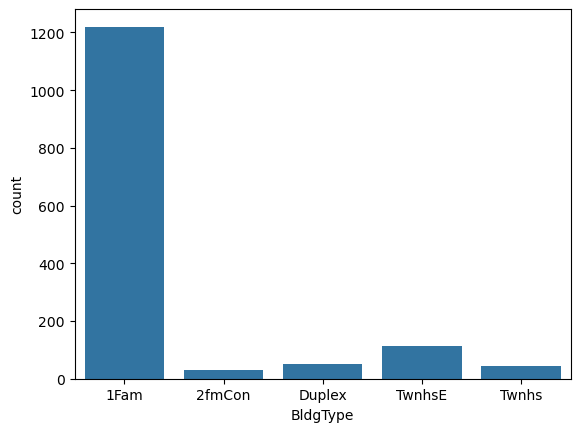

            HouseStyle      Ratio
HouseStyle                       
1Story             726  49.726027
2Story             445  30.479452
1.5Fin             154  10.547945
SLvl                65   4.452055
SFoyer              37   2.534247
1.5Unf              14   0.958904
2.5Unf              11   0.753425
2.5Fin               8   0.547945
##########################################


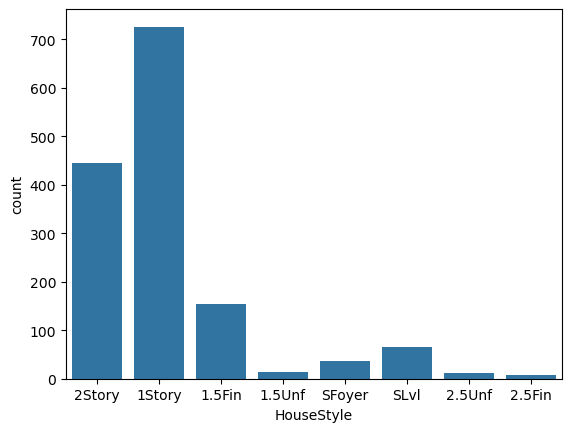

           RoofStyle      Ratio
RoofStyle                      
Gable           1141  78.150685
Hip              286  19.589041
Flat              13   0.890411
Gambrel           11   0.753425
Mansard            7   0.479452
Shed               2   0.136986
##########################################


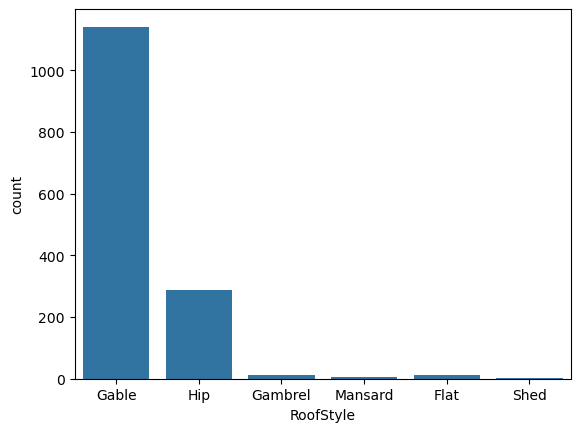

          RoofMatl      Ratio
RoofMatl                     
CompShg       1434  98.219178
Tar&Grv         11   0.753425
WdShngl          6   0.410959
WdShake          5   0.342466
Metal            1   0.068493
Membran          1   0.068493
Roll             1   0.068493
ClyTile          1   0.068493
##########################################


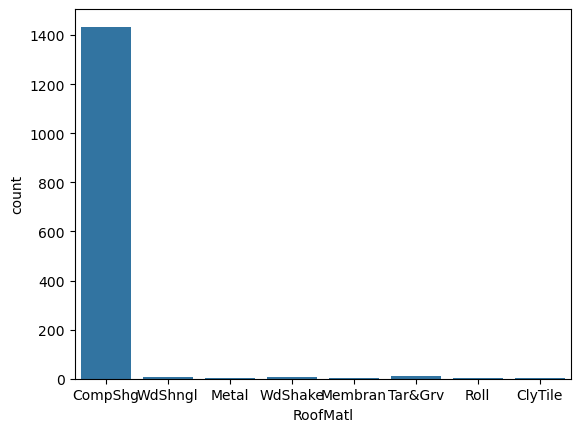

             Exterior1st      Ratio
Exterior1st                        
VinylSd              515  35.273973
HdBoard              222  15.205479
MetalSd              220  15.068493
Wd Sdng              206  14.109589
Plywood              108   7.397260
CemntBd               61   4.178082
BrkFace               50   3.424658
WdShing               26   1.780822
Stucco                25   1.712329
AsbShng               20   1.369863
BrkComm                2   0.136986
Stone                  2   0.136986
AsphShn                1   0.068493
ImStucc                1   0.068493
CBlock                 1   0.068493
##########################################


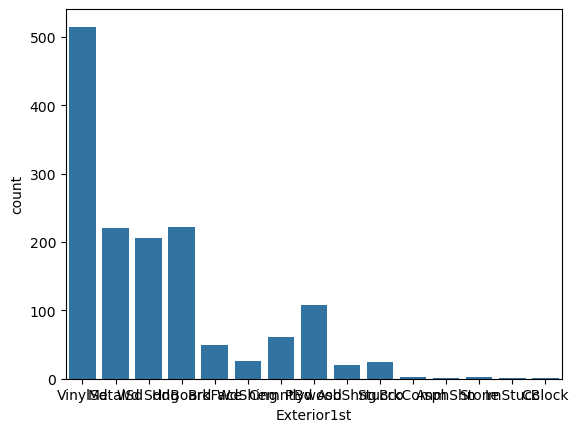

             Exterior2nd      Ratio
Exterior2nd                        
VinylSd              504  34.520548
MetalSd              214  14.657534
HdBoard              207  14.178082
Wd Sdng              197  13.493151
Plywood              142   9.726027
CmentBd               60   4.109589
Wd Shng               38   2.602740
Stucco                26   1.780822
BrkFace               25   1.712329
AsbShng               20   1.369863
ImStucc               10   0.684932
Brk Cmn                7   0.479452
Stone                  5   0.342466
AsphShn                3   0.205479
Other                  1   0.068493
CBlock                 1   0.068493
##########################################


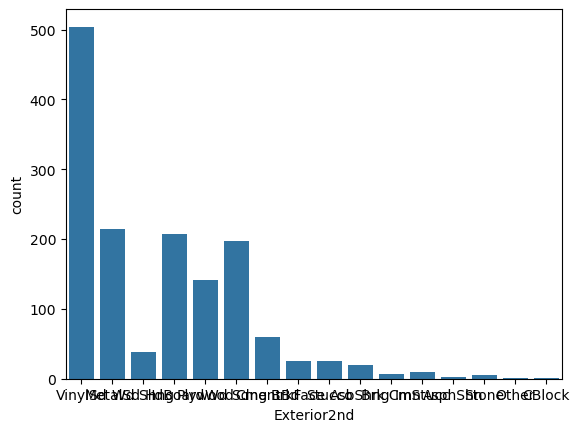

            MasVnrType      Ratio
MasVnrType                       
BrkFace            445  30.479452
Stone              128   8.767123
BrkCmn              15   1.027397
##########################################


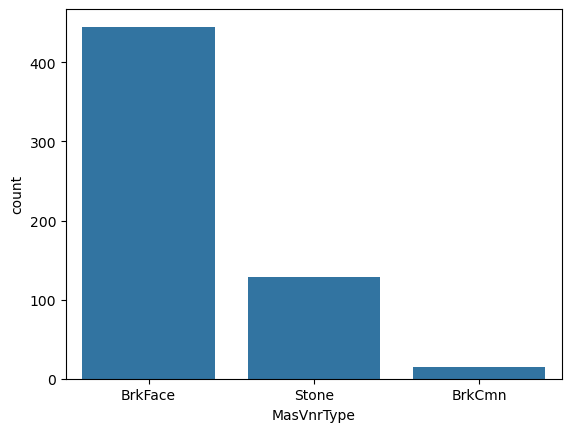

           ExterQual      Ratio
ExterQual                      
TA               906  62.054795
Gd               488  33.424658
Ex                52   3.561644
Fa                14   0.958904
##########################################


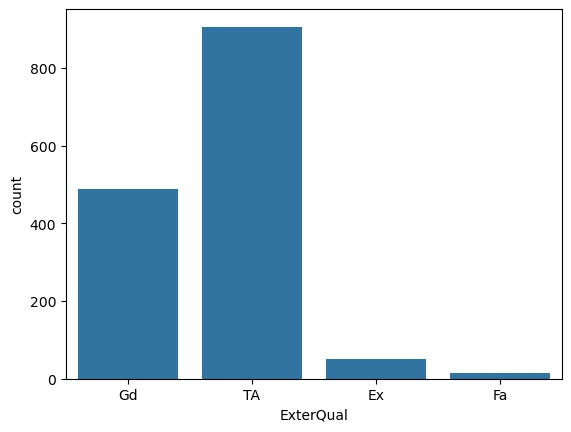

           ExterCond      Ratio
ExterCond                      
TA              1282  87.808219
Gd               146  10.000000
Fa                28   1.917808
Ex                 3   0.205479
Po                 1   0.068493
##########################################


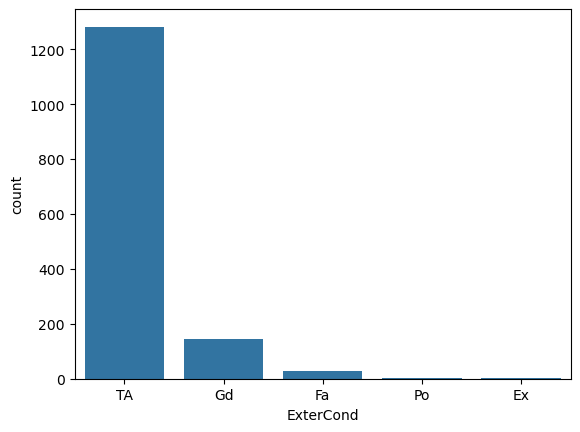

            Foundation      Ratio
Foundation                       
PConc              647  44.315068
CBlock             634  43.424658
BrkTil             146  10.000000
Slab                24   1.643836
Stone                6   0.410959
Wood                 3   0.205479
##########################################


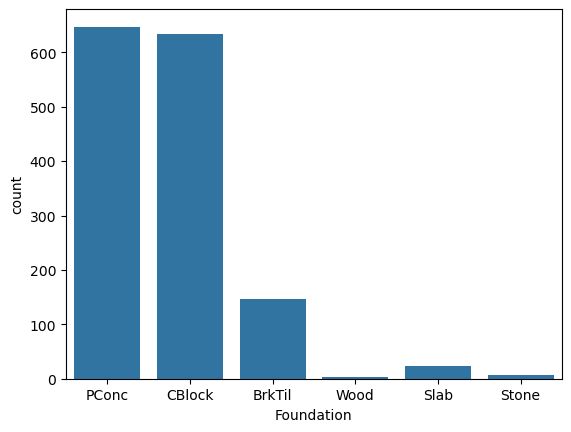

          BsmtQual      Ratio
BsmtQual                     
TA             649  44.452055
Gd             618  42.328767
Ex             121   8.287671
Fa              35   2.397260
##########################################


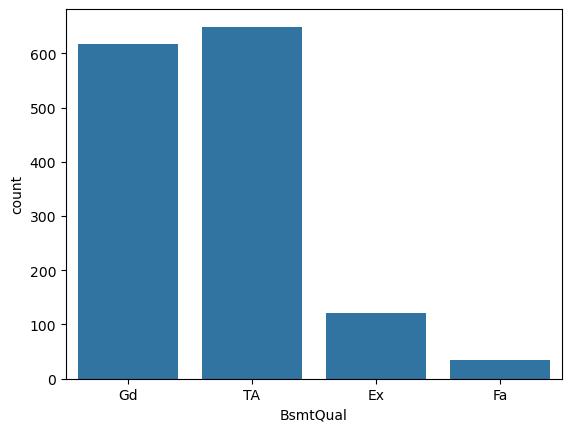

          BsmtCond      Ratio
BsmtCond                     
TA            1311  89.794521
Gd              65   4.452055
Fa              45   3.082192
Po               2   0.136986
##########################################


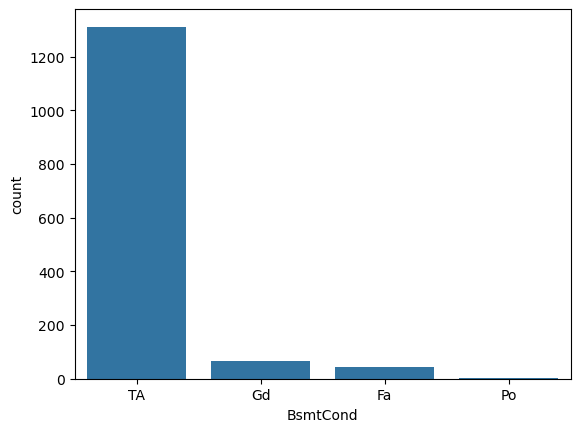

              BsmtExposure      Ratio
BsmtExposure                         
No                     953  65.273973
Av                     221  15.136986
Gd                     134   9.178082
Mn                     114   7.808219
##########################################


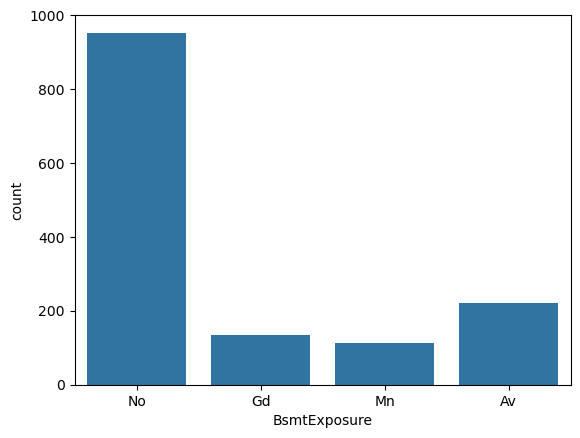

              BsmtFinType1      Ratio
BsmtFinType1                         
Unf                    430  29.452055
GLQ                    418  28.630137
ALQ                    220  15.068493
BLQ                    148  10.136986
Rec                    133   9.109589
LwQ                     74   5.068493
##########################################


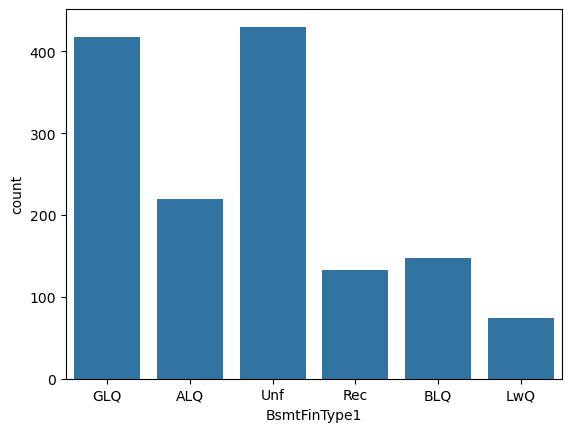

              BsmtFinType2      Ratio
BsmtFinType2                         
Unf                   1256  86.027397
Rec                     54   3.698630
LwQ                     46   3.150685
BLQ                     33   2.260274
ALQ                     19   1.301370
GLQ                     14   0.958904
##########################################


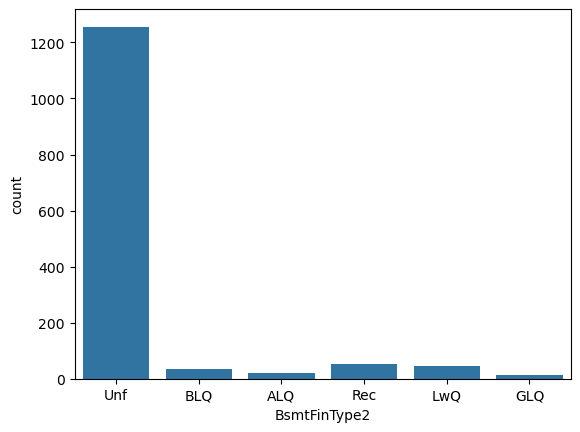

         Heating      Ratio
Heating                    
GasA        1428  97.808219
GasW          18   1.232877
Grav           7   0.479452
Wall           4   0.273973
OthW           2   0.136986
Floor          1   0.068493
##########################################


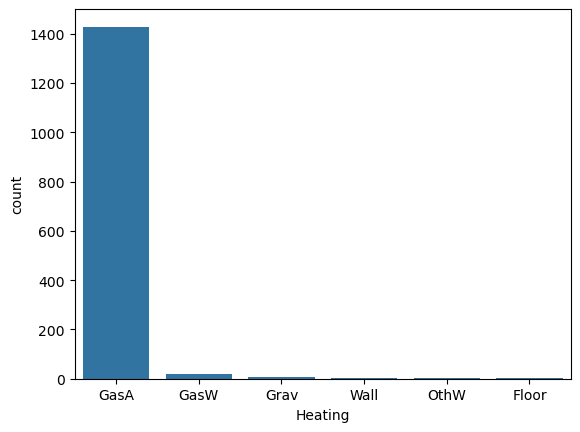

           HeatingQC      Ratio
HeatingQC                      
Ex               741  50.753425
TA               428  29.315068
Gd               241  16.506849
Fa                49   3.356164
Po                 1   0.068493
##########################################


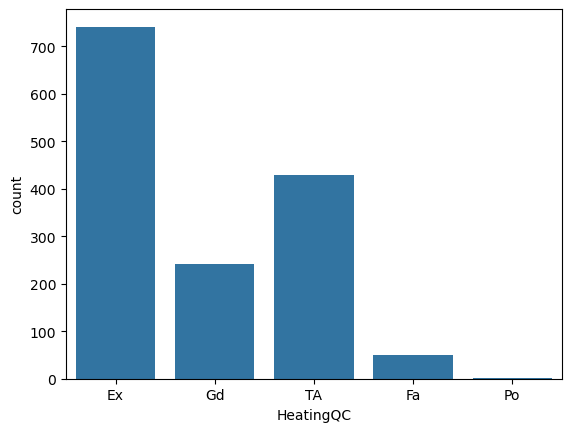

            CentralAir      Ratio
CentralAir                       
Y                 1365  93.493151
N                   95   6.506849
##########################################


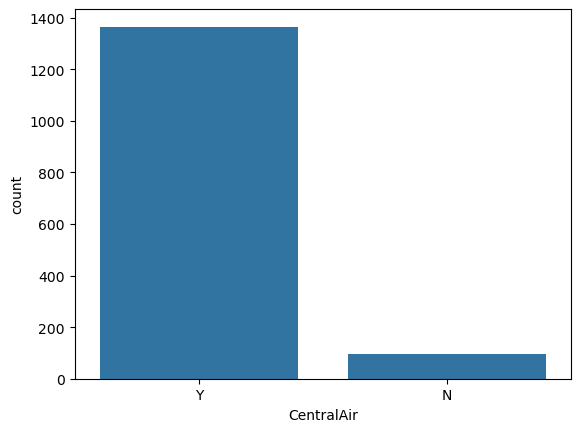

            Electrical      Ratio
Electrical                       
SBrkr             1334  91.369863
FuseA               94   6.438356
FuseF               27   1.849315
FuseP                3   0.205479
Mix                  1   0.068493
##########################################


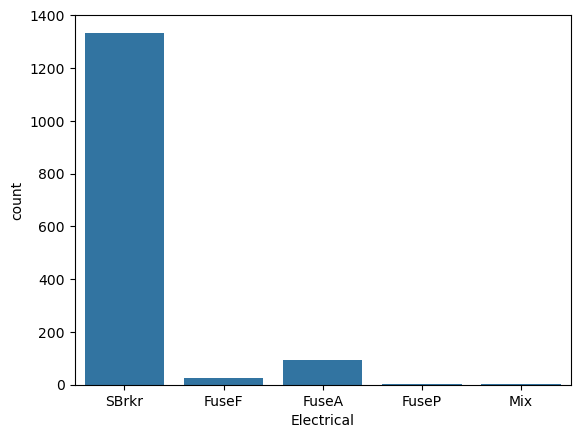

             KitchenQual      Ratio
KitchenQual                        
TA                   735  50.342466
Gd                   586  40.136986
Ex                   100   6.849315
Fa                    39   2.671233
##########################################


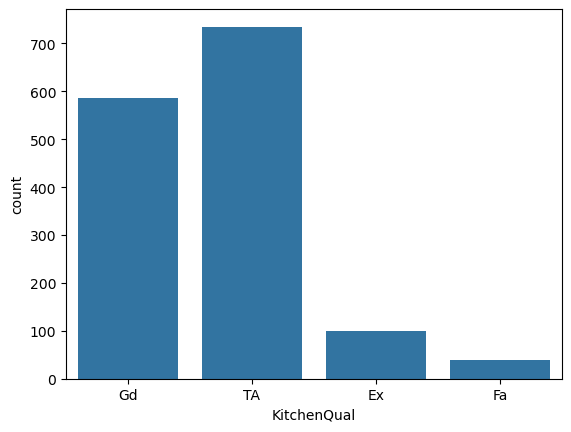

            Functional      Ratio
Functional                       
Typ               1360  93.150685
Min2                34   2.328767
Min1                31   2.123288
Mod                 15   1.027397
Maj1                14   0.958904
Maj2                 5   0.342466
Sev                  1   0.068493
##########################################


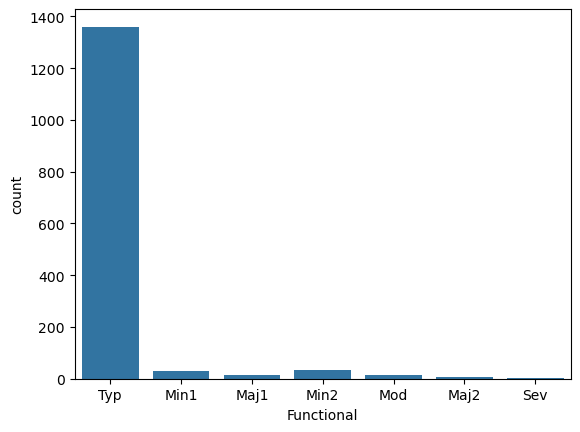

             FireplaceQu      Ratio
FireplaceQu                        
Gd                   380  26.027397
TA                   313  21.438356
Fa                    33   2.260274
Ex                    24   1.643836
Po                    20   1.369863
##########################################


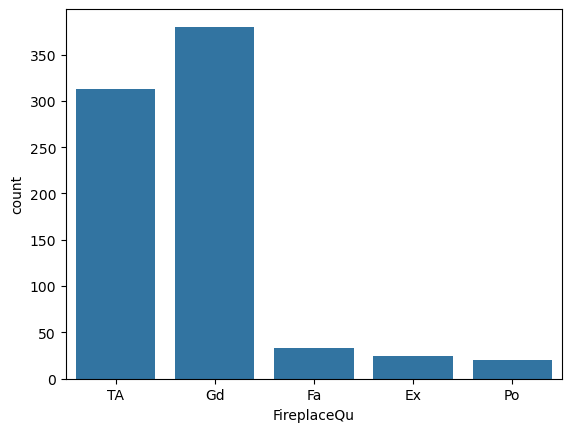

            GarageType      Ratio
GarageType                       
Attchd             870  59.589041
Detchd             387  26.506849
BuiltIn             88   6.027397
Basment             19   1.301370
CarPort              9   0.616438
2Types               6   0.410959
##########################################


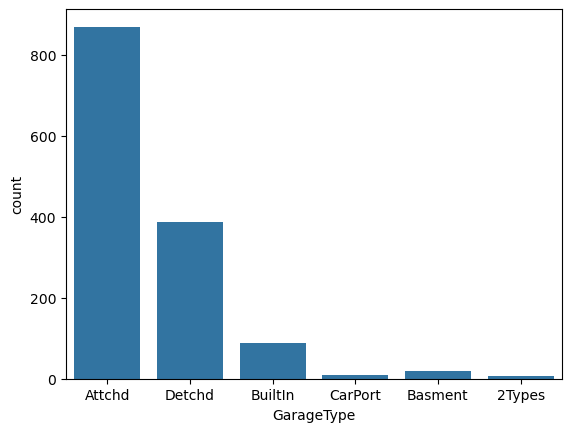

              GarageFinish      Ratio
GarageFinish                         
Unf                    605  41.438356
RFn                    422  28.904110
Fin                    352  24.109589
##########################################


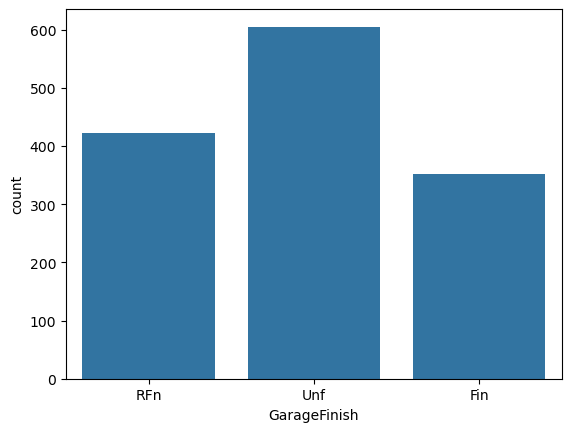

            GarageQual      Ratio
GarageQual                       
TA                1311  89.794521
Fa                  48   3.287671
Gd                  14   0.958904
Ex                   3   0.205479
Po                   3   0.205479
##########################################


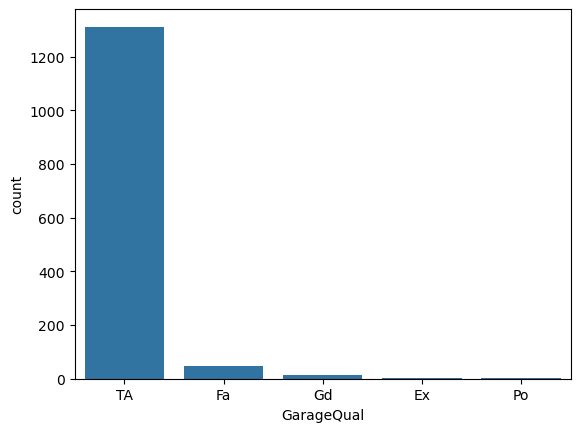

            GarageCond      Ratio
GarageCond                       
TA                1326  90.821918
Fa                  35   2.397260
Gd                   9   0.616438
Po                   7   0.479452
Ex                   2   0.136986
##########################################


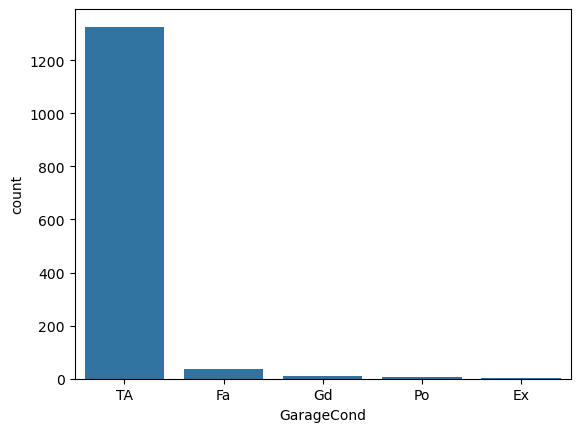

            PavedDrive      Ratio
PavedDrive                       
Y                 1340  91.780822
N                   90   6.164384
P                   30   2.054795
##########################################


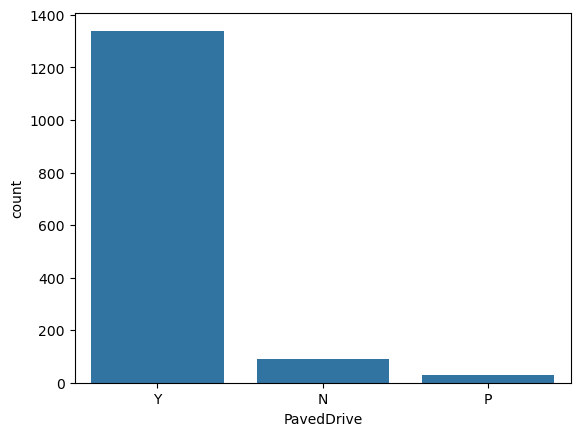

        PoolQC     Ratio
PoolQC                  
Gd           3  0.205479
Ex           2  0.136986
Fa           2  0.136986
##########################################


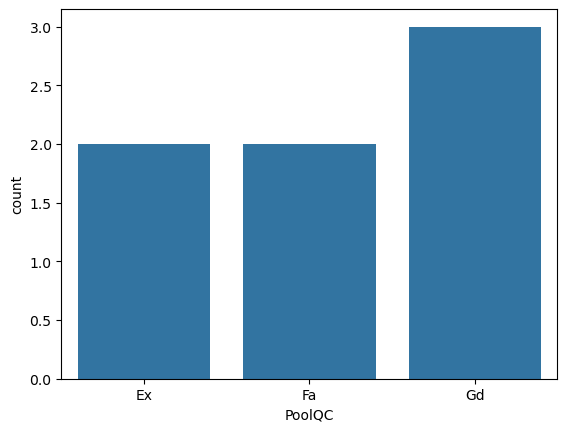

       Fence      Ratio
Fence                  
MnPrv    157  10.753425
GdPrv     59   4.041096
GdWo      54   3.698630
MnWw      11   0.753425
##########################################


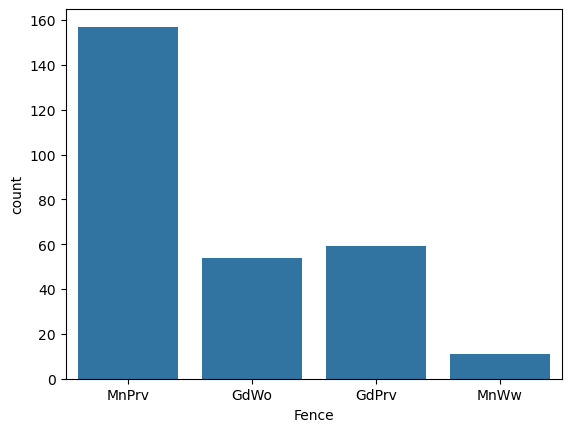

             MiscFeature     Ratio
MiscFeature                       
Shed                  49  3.356164
Gar2                   2  0.136986
Othr                   2  0.136986
TenC                   1  0.068493
##########################################


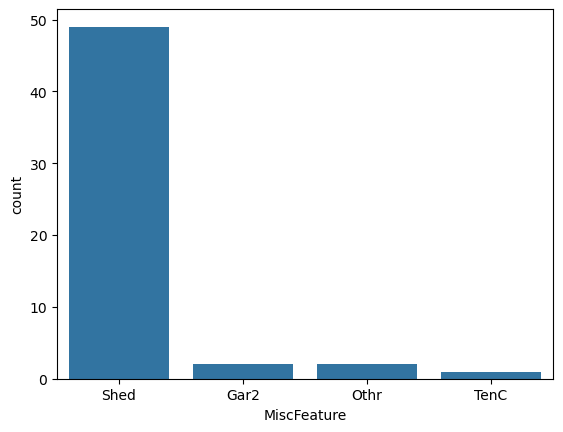

          SaleType      Ratio
SaleType                     
WD            1267  86.780822
New            122   8.356164
COD             43   2.945205
ConLD            9   0.616438
ConLI            5   0.342466
ConLw            5   0.342466
CWD              4   0.273973
Oth              3   0.205479
Con              2   0.136986
##########################################


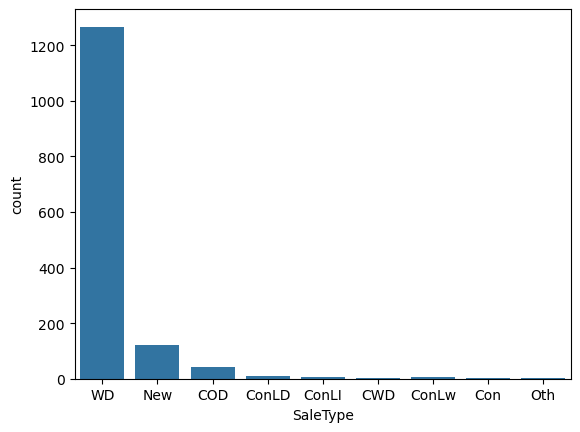

               SaleCondition      Ratio
SaleCondition                          
Normal                  1198  82.054795
Partial                  125   8.561644
Abnorml                  101   6.917808
Family                    20   1.369863
Alloca                    12   0.821918
AdjLand                    4   0.273973
##########################################


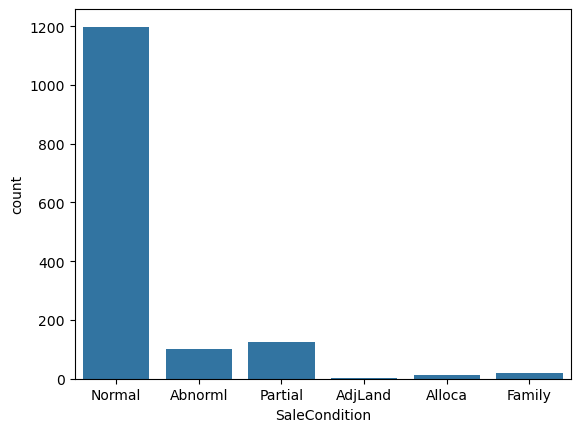

             OverallCond      Ratio
OverallCond                        
5                    821  56.232877
6                    252  17.260274
7                    205  14.041096
8                     72   4.931507
4                     57   3.904110
3                     25   1.712329
9                     22   1.506849
2                      5   0.342466
1                      1   0.068493
##########################################


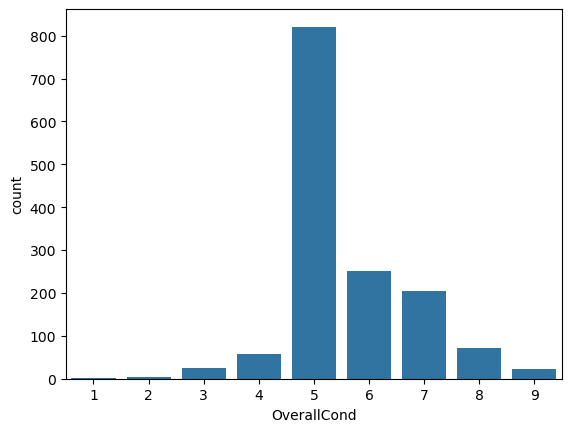

              BsmtFullBath      Ratio
BsmtFullBath                         
0                      856  58.630137
1                      588  40.273973
2                       15   1.027397
3                        1   0.068493
##########################################


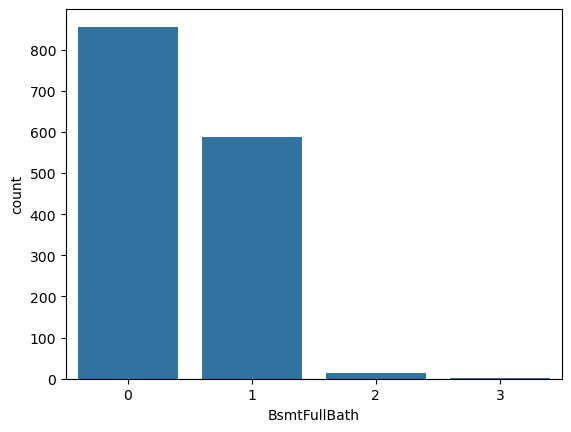

              BsmtHalfBath      Ratio
BsmtHalfBath                         
0                     1378  94.383562
1                       80   5.479452
2                        2   0.136986
##########################################


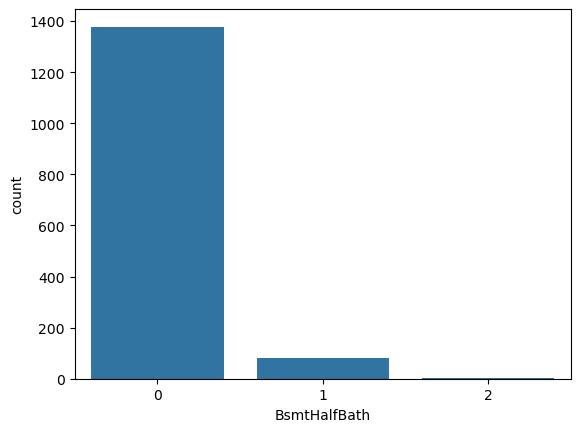

          FullBath      Ratio
FullBath                     
2              768  52.602740
1              650  44.520548
3               33   2.260274
0                9   0.616438
##########################################


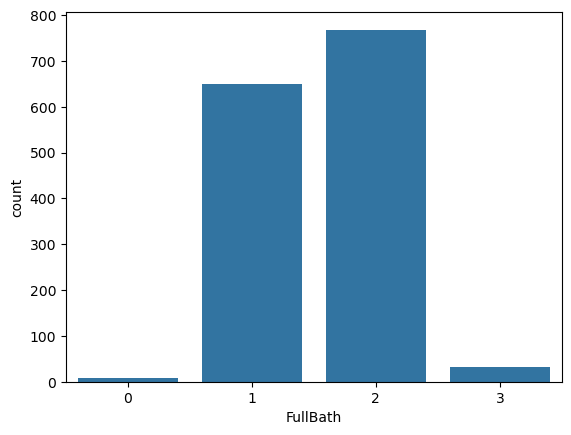

          HalfBath      Ratio
HalfBath                     
0              913  62.534247
1              535  36.643836
2               12   0.821918
##########################################


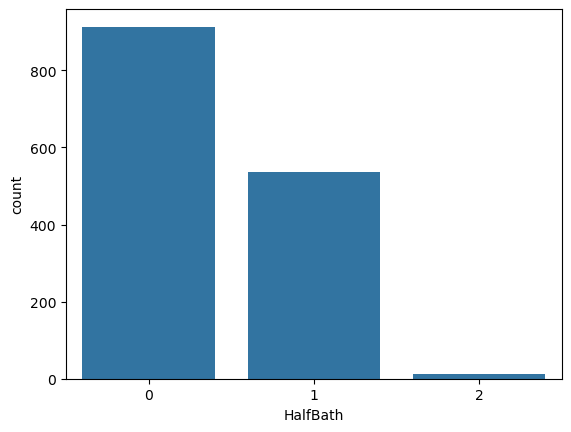

              BedroomAbvGr      Ratio
BedroomAbvGr                         
3                      804  55.068493
2                      358  24.520548
4                      213  14.589041
1                       50   3.424658
5                       21   1.438356
6                        7   0.479452
0                        6   0.410959
8                        1   0.068493
##########################################


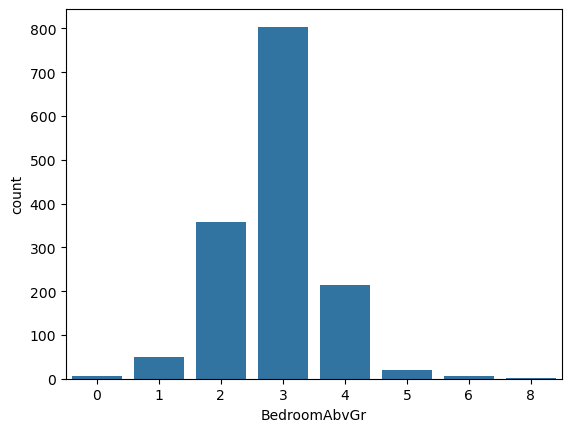

              KitchenAbvGr      Ratio
KitchenAbvGr                         
1                     1392  95.342466
2                       65   4.452055
3                        2   0.136986
0                        1   0.068493
##########################################


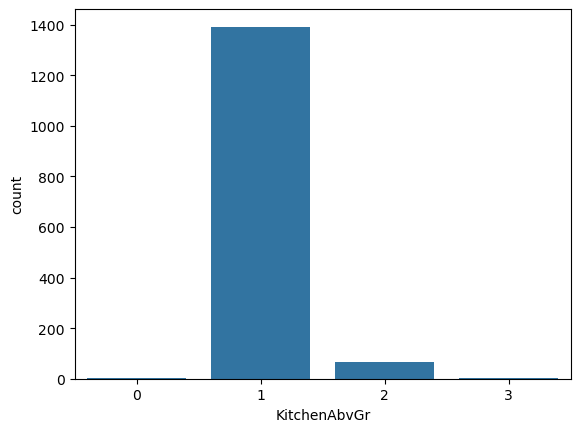

            Fireplaces      Ratio
Fireplaces                       
0                  690  47.260274
1                  650  44.520548
2                  115   7.876712
3                    5   0.342466
##########################################


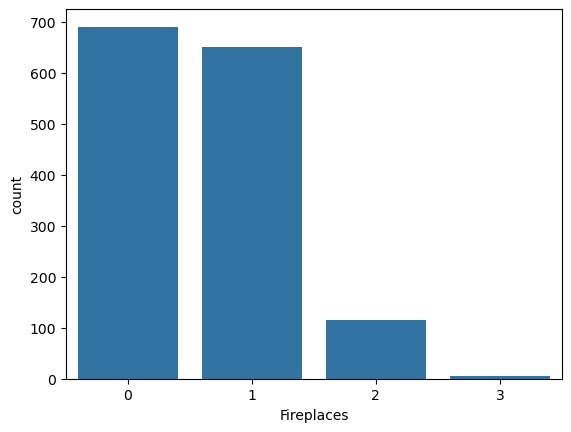

            GarageCars      Ratio
GarageCars                       
2                  824  56.438356
1                  369  25.273973
3                  181  12.397260
0                   81   5.547945
4                    5   0.342466
##########################################


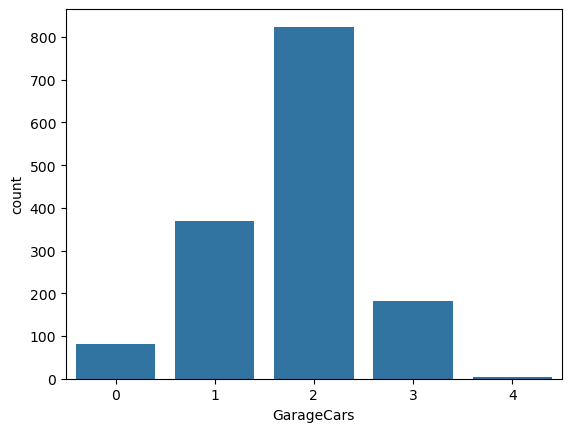

          PoolArea      Ratio
PoolArea                     
0             1453  99.520548
512              1   0.068493
648              1   0.068493
576              1   0.068493
555              1   0.068493
480              1   0.068493
519              1   0.068493
738              1   0.068493
##########################################


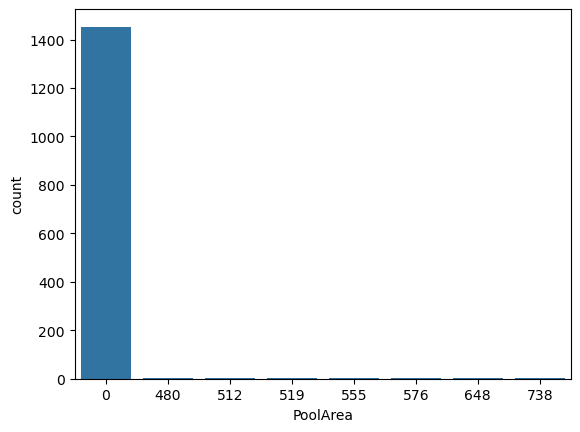

        YrSold      Ratio
YrSold                   
2009       338  23.150685
2007       329  22.534247
2006       314  21.506849
2008       304  20.821918
2010       175  11.986301
##########################################


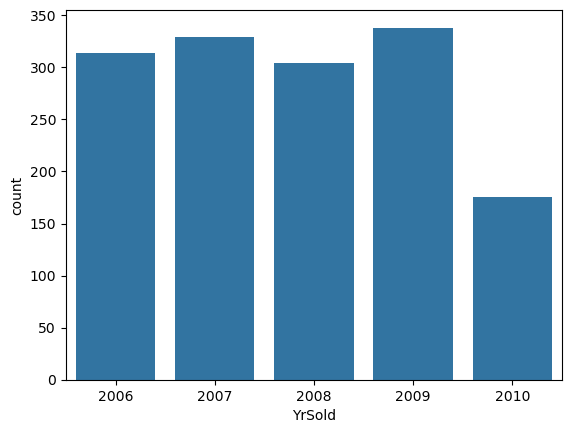

In [21]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

#### Numeric Değişken Analizi

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
1%         20.000000
5%         20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


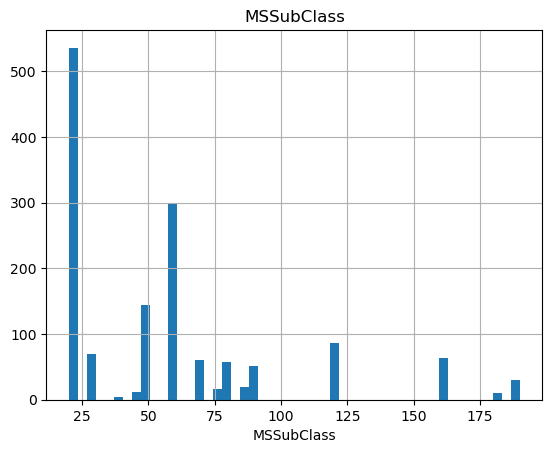

#####################################
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
1%         21.000000
5%         34.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64


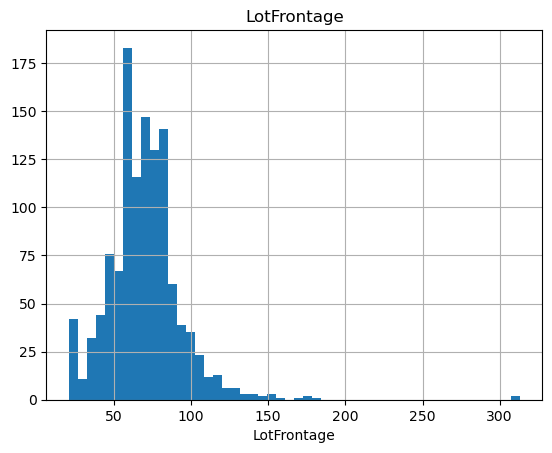

#####################################
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
1%         1680.000000
5%         3311.700000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64


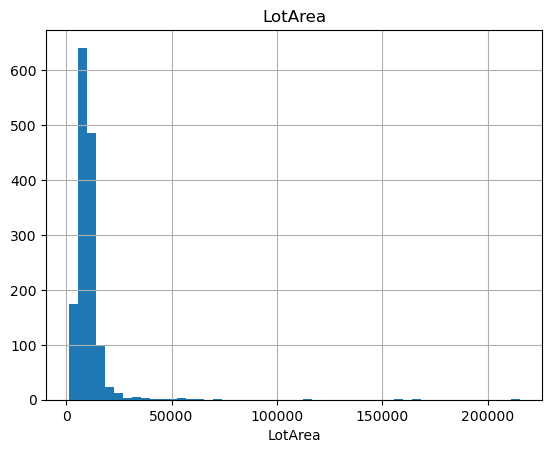

#####################################
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
1%          3.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64


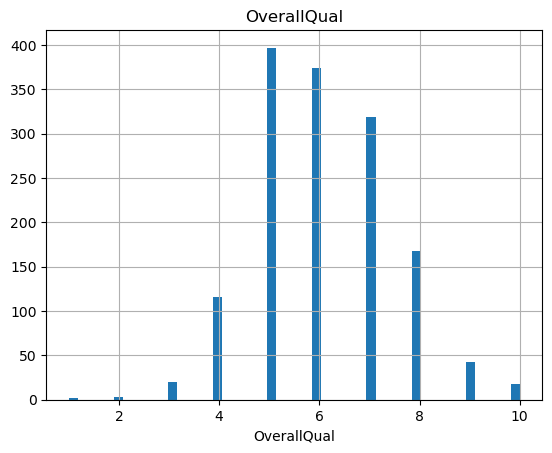

#####################################
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
1%       1899.180000
5%       1916.000000
10%      1924.900000
20%      1947.800000
30%      1958.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1997.300000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearBuilt, dtype: float64


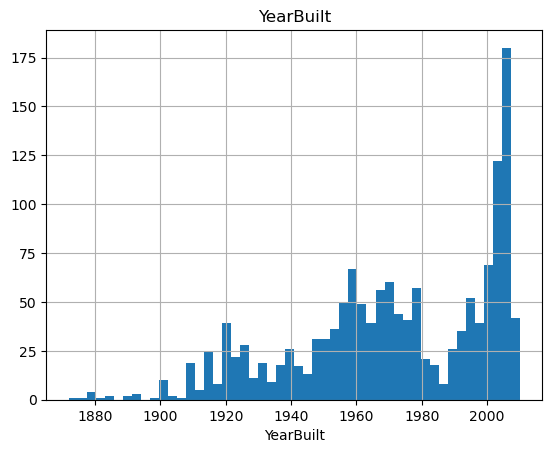

#####################################
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
1%       1950.000000
5%       1950.000000
10%      1950.000000
20%      1961.800000
30%      1971.000000
40%      1980.000000
50%      1994.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


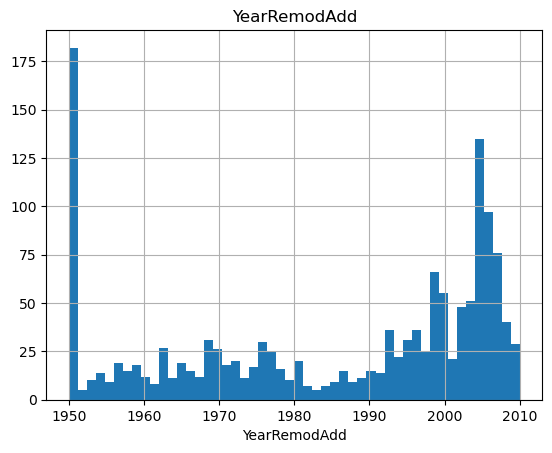

#####################################
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%        16.000000
70%       117.000000
80%       206.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64


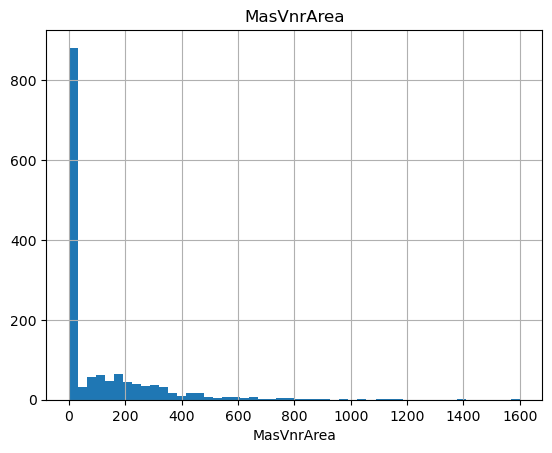

#####################################
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       218.600000
50%       383.500000
60%       525.600000
70%       655.000000
80%       806.400000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


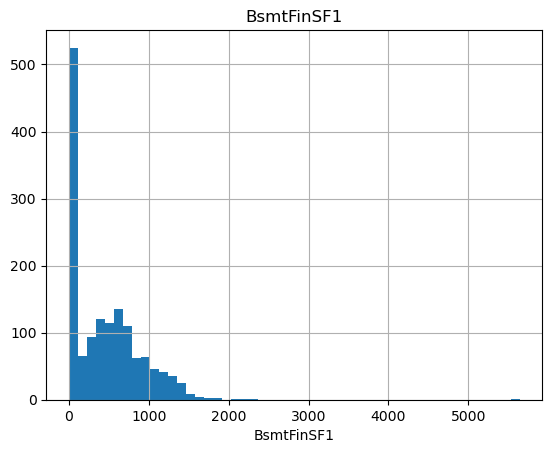

#####################################
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


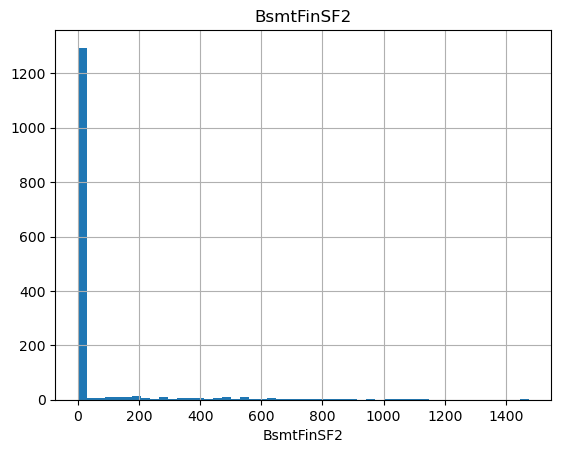

#####################################
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
1%          0.000000
5%          0.000000
10%        74.900000
20%       172.000000
30%       280.000000
40%       374.600000
50%       477.500000
60%       604.400000
70%       736.000000
80%       896.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


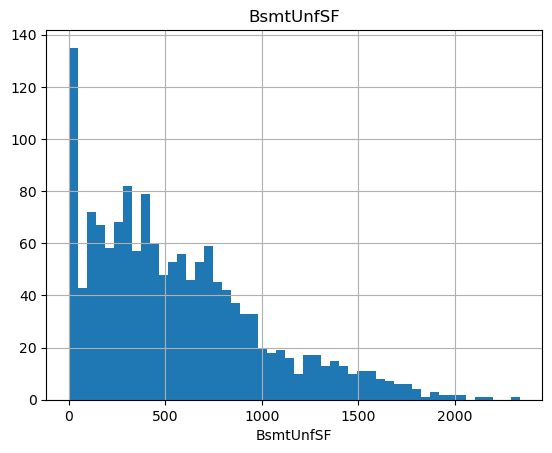

#####################################
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
1%          0.000000
5%        519.300000
10%       636.900000
20%       755.800000
30%       840.000000
40%       910.000000
50%       991.500000
60%      1088.000000
70%      1216.000000
80%      1391.200000
90%      1602.200000
95%      1753.000000
99%      2155.050000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


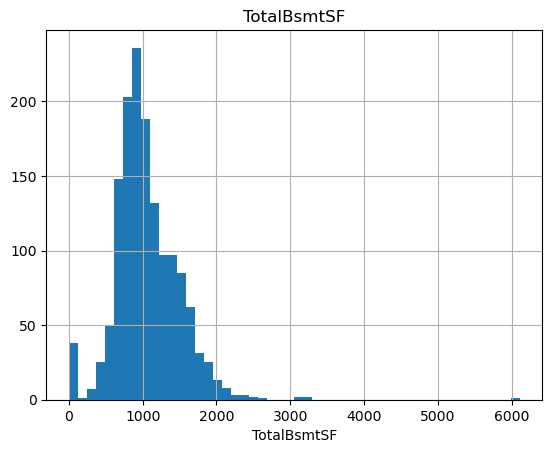

#####################################
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
1%        520.000000
5%        672.950000
10%       756.900000
20%       848.000000
30%       915.700000
40%      1000.200000
50%      1087.000000
60%      1182.000000
70%      1314.000000
80%      1482.400000
90%      1680.000000
95%      1831.250000
99%      2219.460000
max      4692.000000
Name: 1stFlrSF, dtype: float64


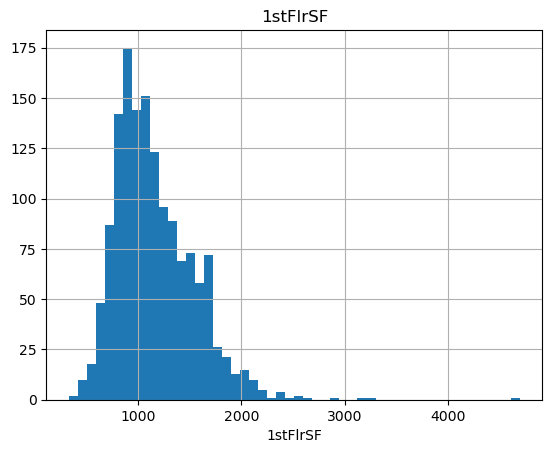

#####################################
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       455.400000
70%       672.000000
80%       796.200000
90%       954.200000
95%      1141.050000
99%      1418.920000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


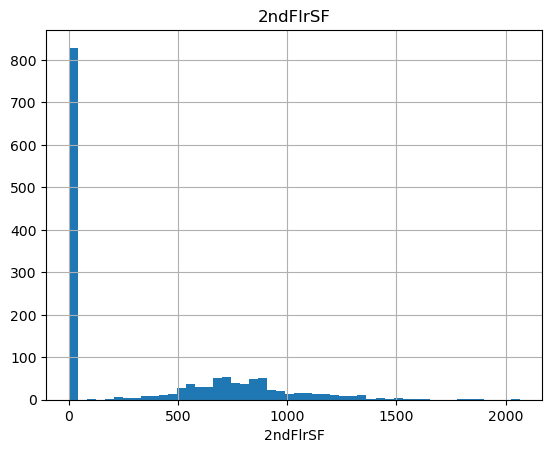

#####################################
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       360.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


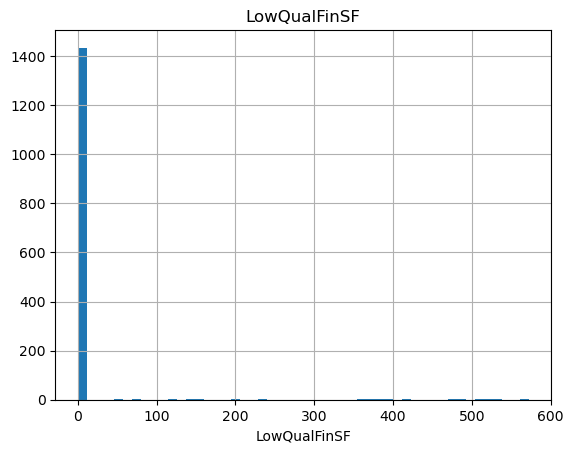

#####################################
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
1%        692.180000
5%        848.000000
10%       912.000000
20%      1066.600000
30%      1208.000000
40%      1339.000000
50%      1464.000000
60%      1578.000000
70%      1709.300000
80%      1869.000000
90%      2158.300000
95%      2466.100000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64


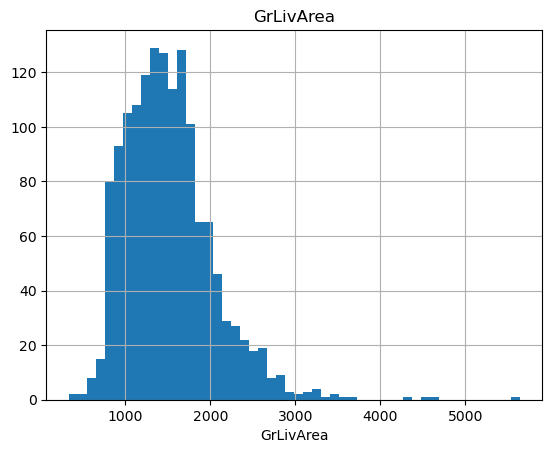

#####################################
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
1%          3.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         9.000000
95%        10.000000
99%        11.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


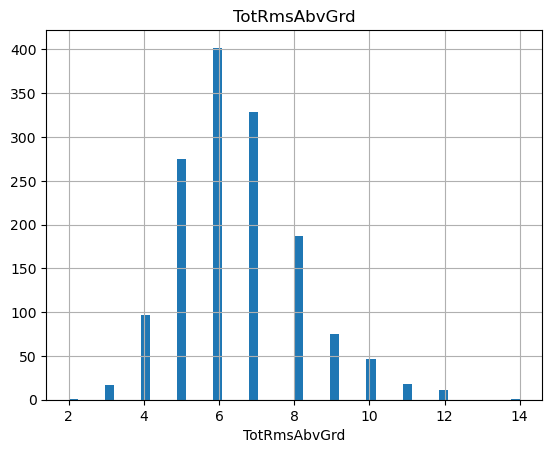

#####################################
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
1%       1916.000000
5%       1930.000000
10%      1945.000000
20%      1957.000000
30%      1965.000000
40%      1973.000000
50%      1980.000000
60%      1993.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


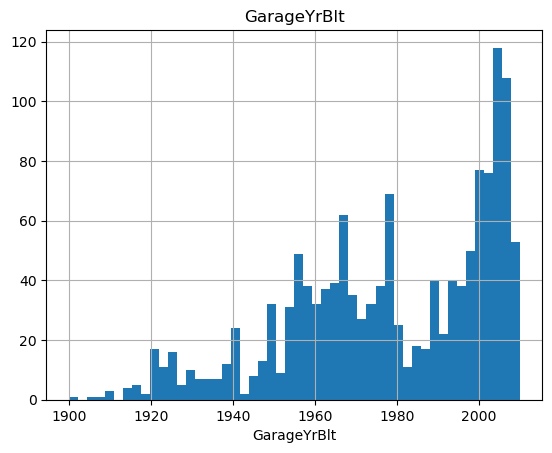

#####################################
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
1%          0.000000
5%          0.000000
10%       240.000000
20%       295.600000
30%       384.000000
40%       440.000000
50%       480.000000
60%       516.000000
70%       560.000000
80%       620.200000
90%       757.100000
95%       850.100000
99%      1002.790000
max      1418.000000
Name: GarageArea, dtype: float64


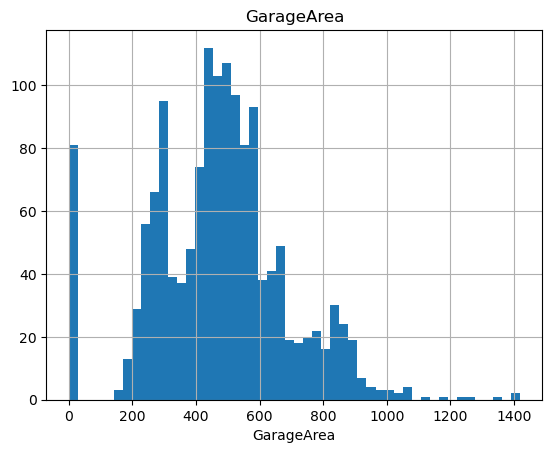

#####################################
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       262.000000
95%       335.000000
99%       505.460000
max       857.000000
Name: WoodDeckSF, dtype: float64


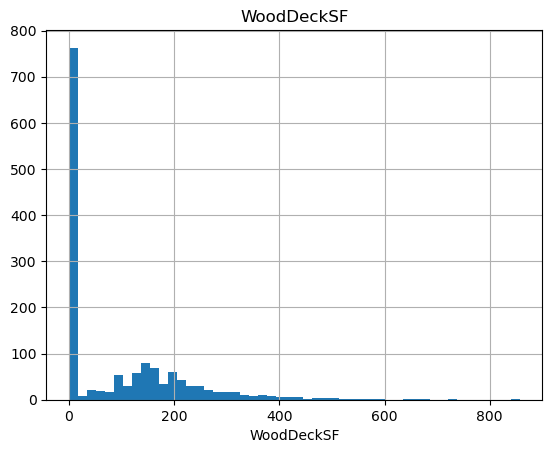

#####################################
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        25.000000
60%        40.000000
70%        57.000000
80%        83.200000
90%       130.000000
95%       175.050000
99%       285.820000
max       547.000000
Name: OpenPorchSF, dtype: float64


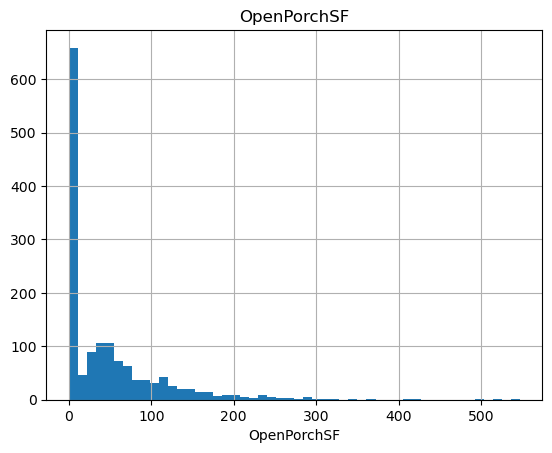

#####################################
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
95%       180.150000
99%       261.050000
max       552.000000
Name: EnclosedPorch, dtype: float64


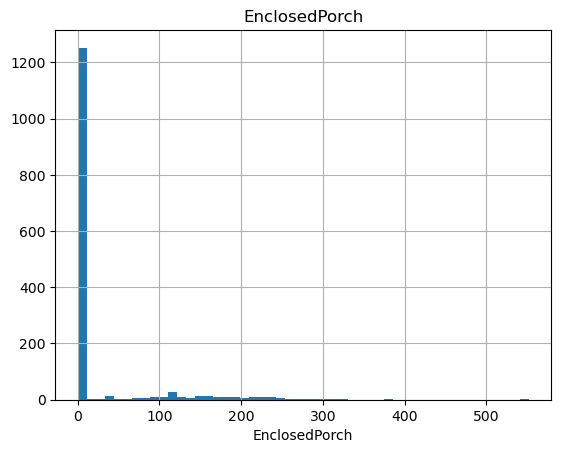

#####################################
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       168.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


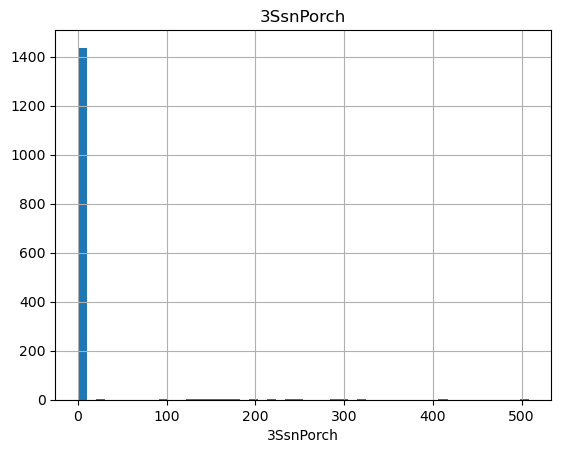

#####################################
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%       160.000000
99%       268.050000
max       480.000000
Name: ScreenPorch, dtype: float64


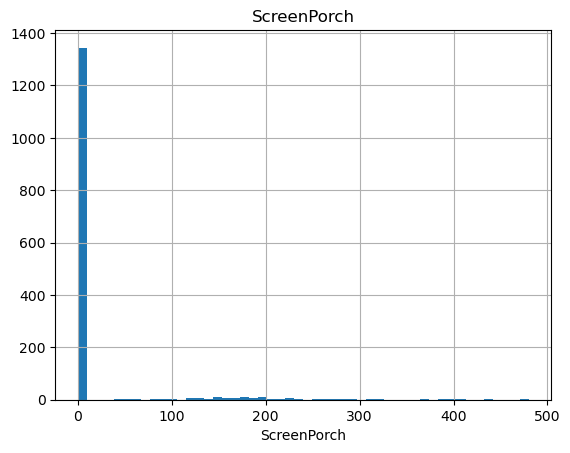

#####################################
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%        700.000000
max      15500.000000
Name: MiscVal, dtype: float64


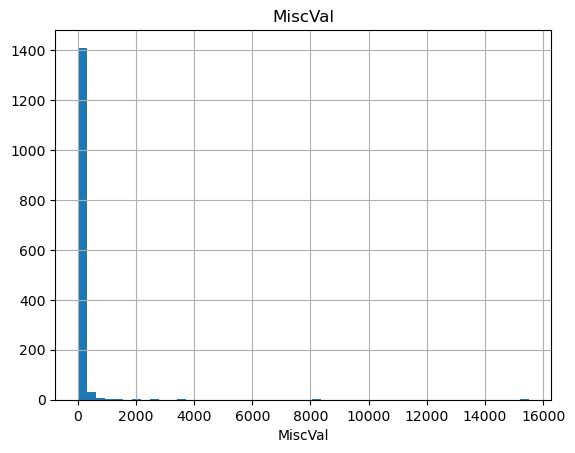

#####################################
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
1%          1.000000
5%          2.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
95%        11.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


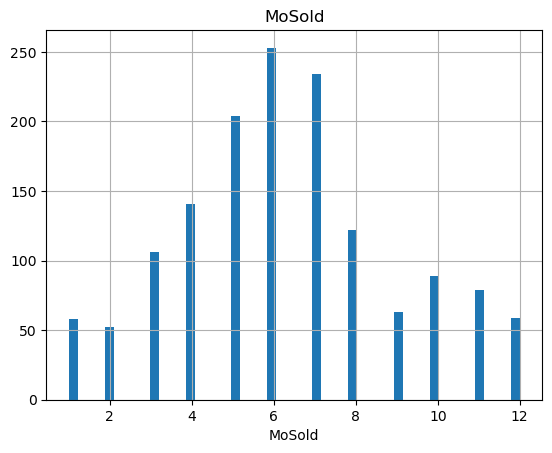

#####################################


In [23]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)

### Hedef Değişken Analizi

In [25]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"SalePrice",col)

            TARGET_MEAN
MSZoning               
C (all)    74528.000000
FV        214014.061538
RH        131558.375000
RL        191004.994787
RM        126316.830275


          TARGET_MEAN
Street               
Grvl    130190.500000
Pave    181130.538514


         TARGET_MEAN
Alley               
Grvl   122219.080000
Pave   168000.585366


            TARGET_MEAN
LotShape               
IR1       206101.665289
IR2       239833.365854
IR3       216036.500000
Reg       164754.818378


               TARGET_MEAN
LandContour               
Bnk          143104.079365
HLS          231533.940000
Low          203661.111111
Lvl          180183.746758


            TARGET_MEAN
Utilities              
AllPub     180950.95682
NoSeWa     137500.00000


             TARGET_MEAN
LotConfig               
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529


             TARGET_MEAN
LandSlope               
Gtl        179956.7

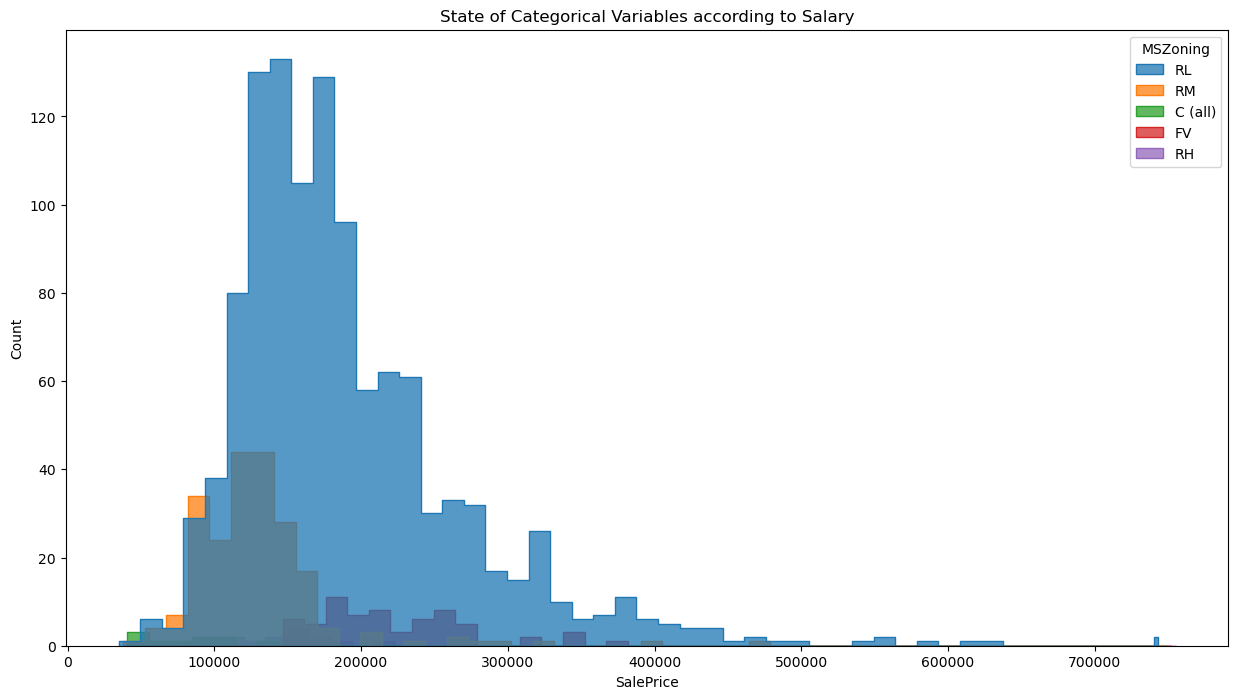

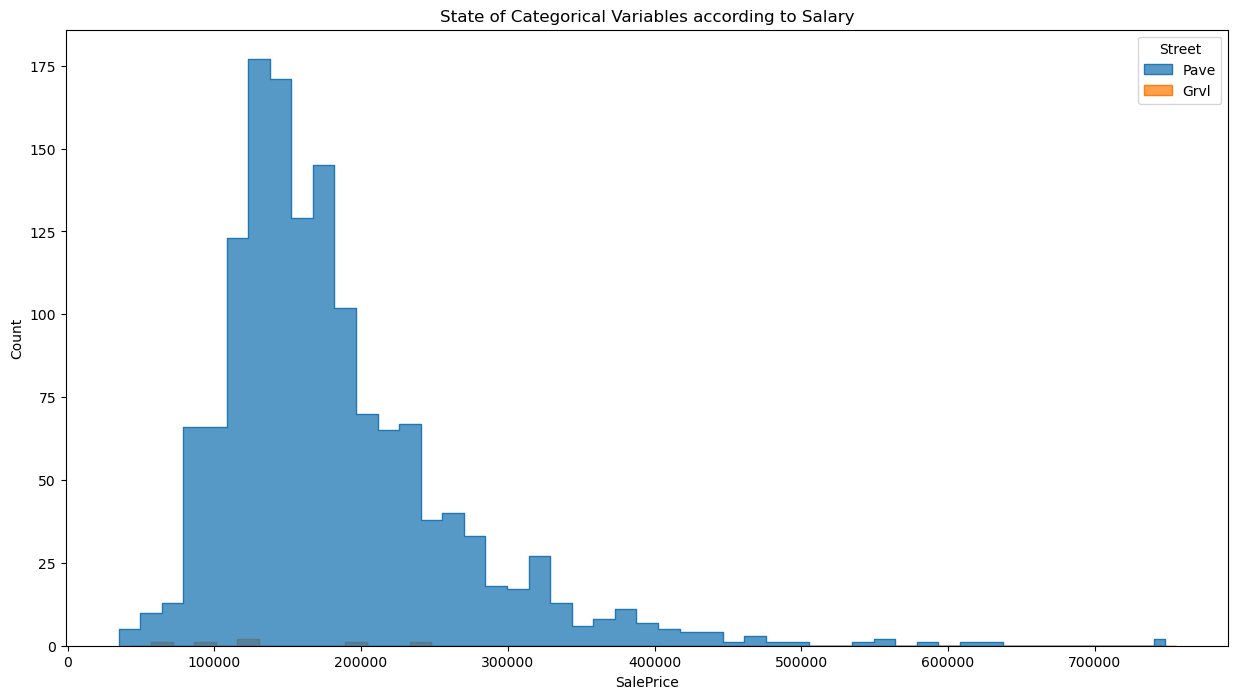

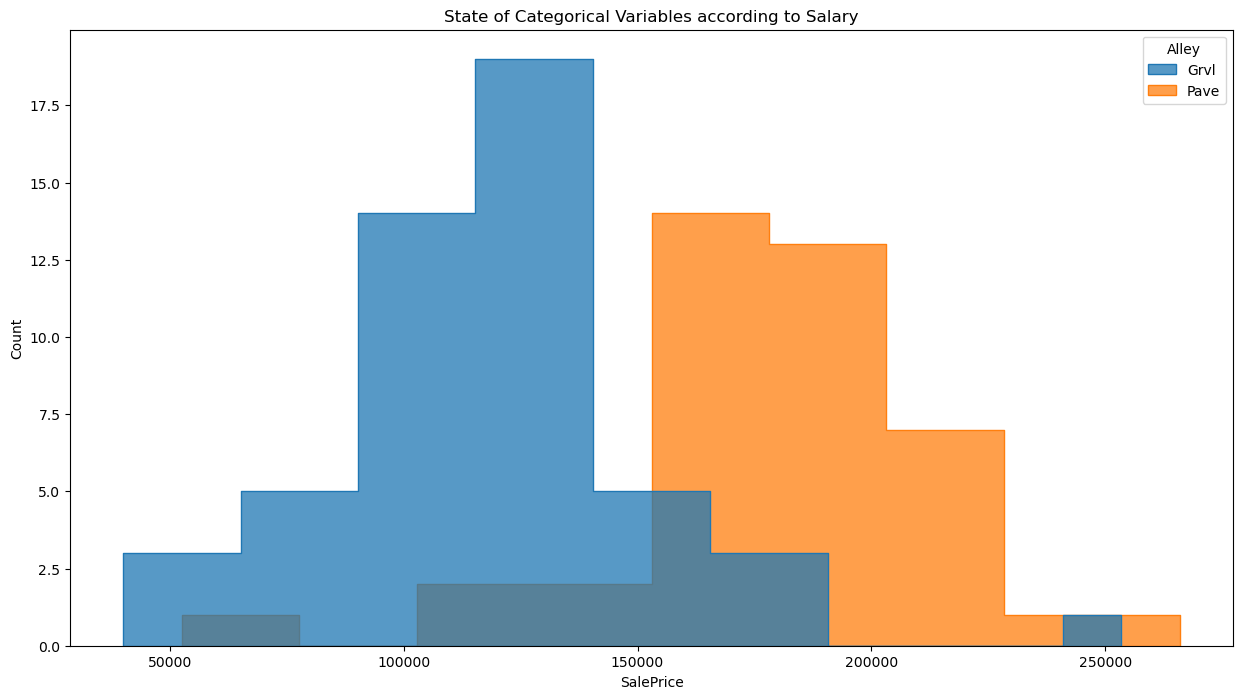

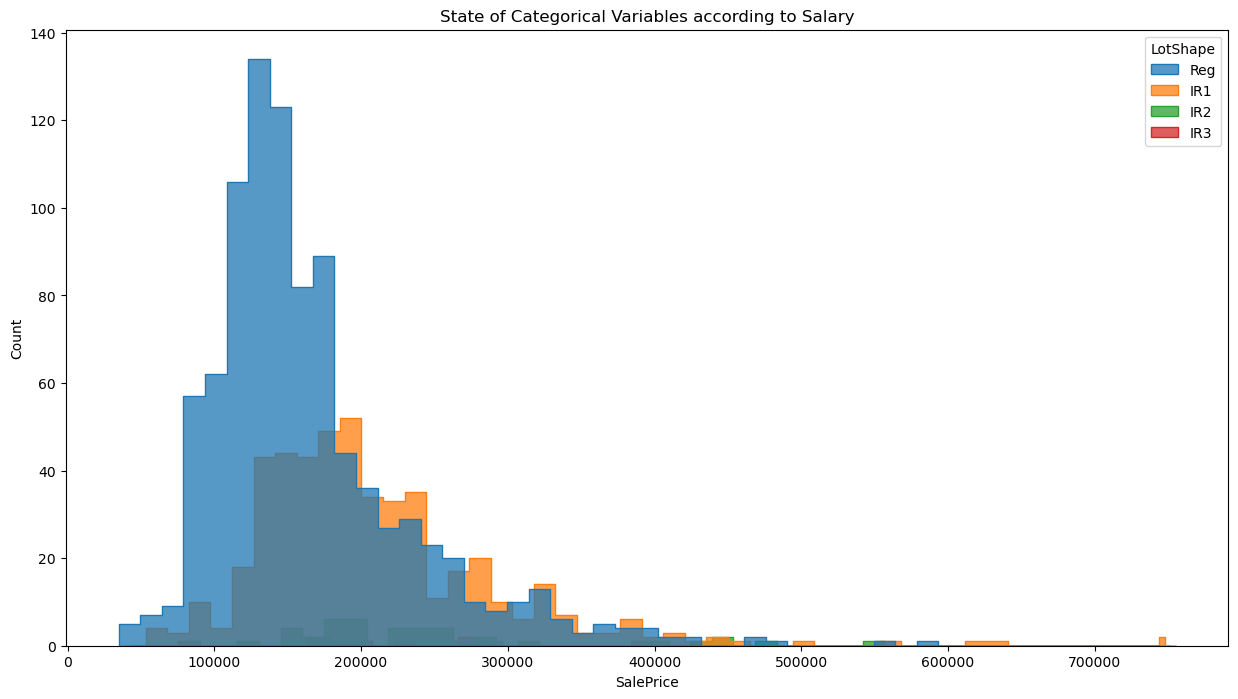

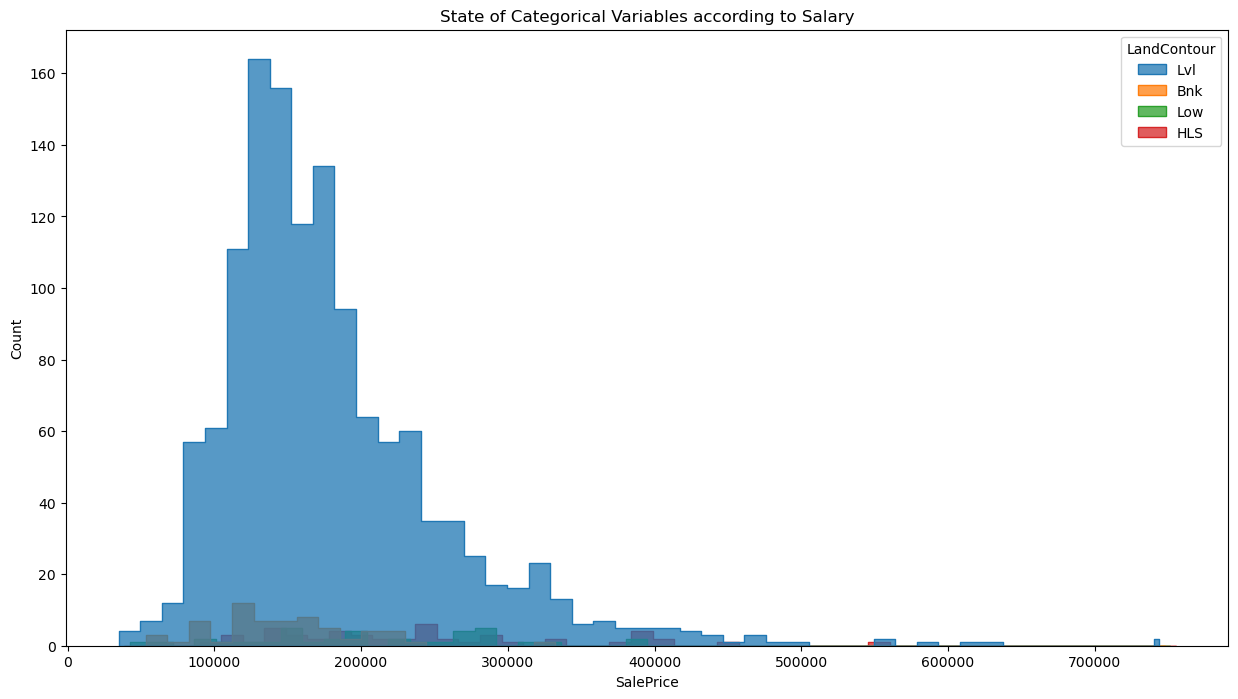

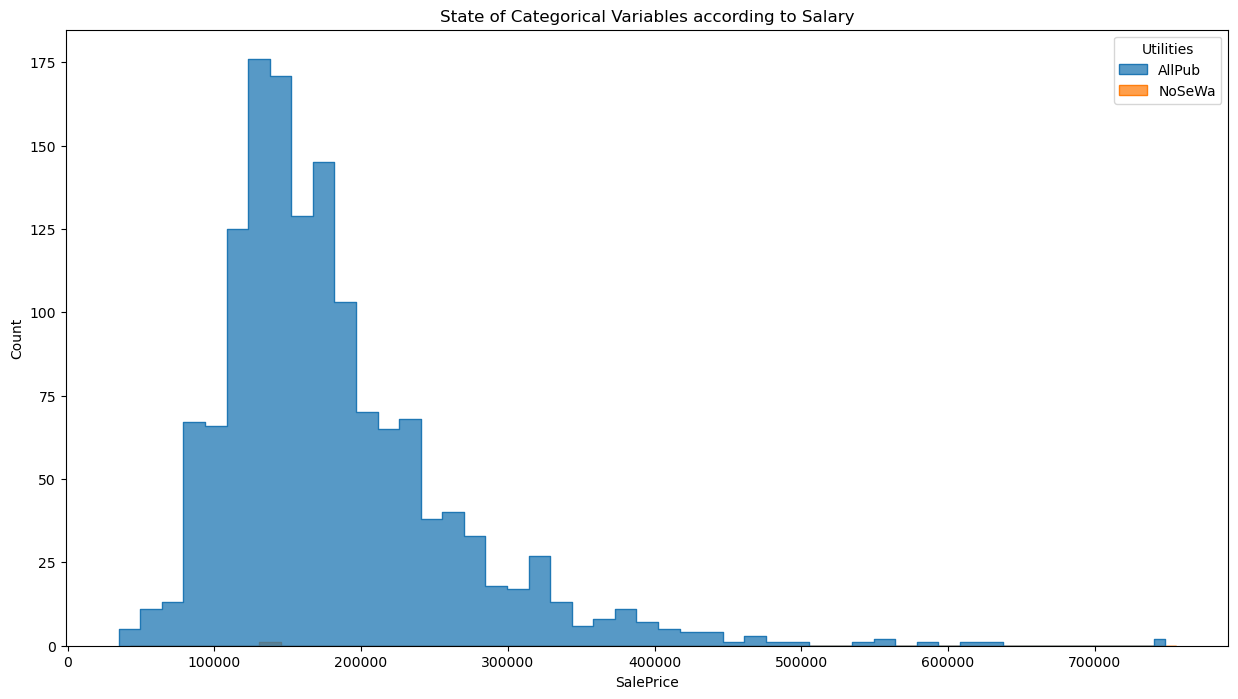

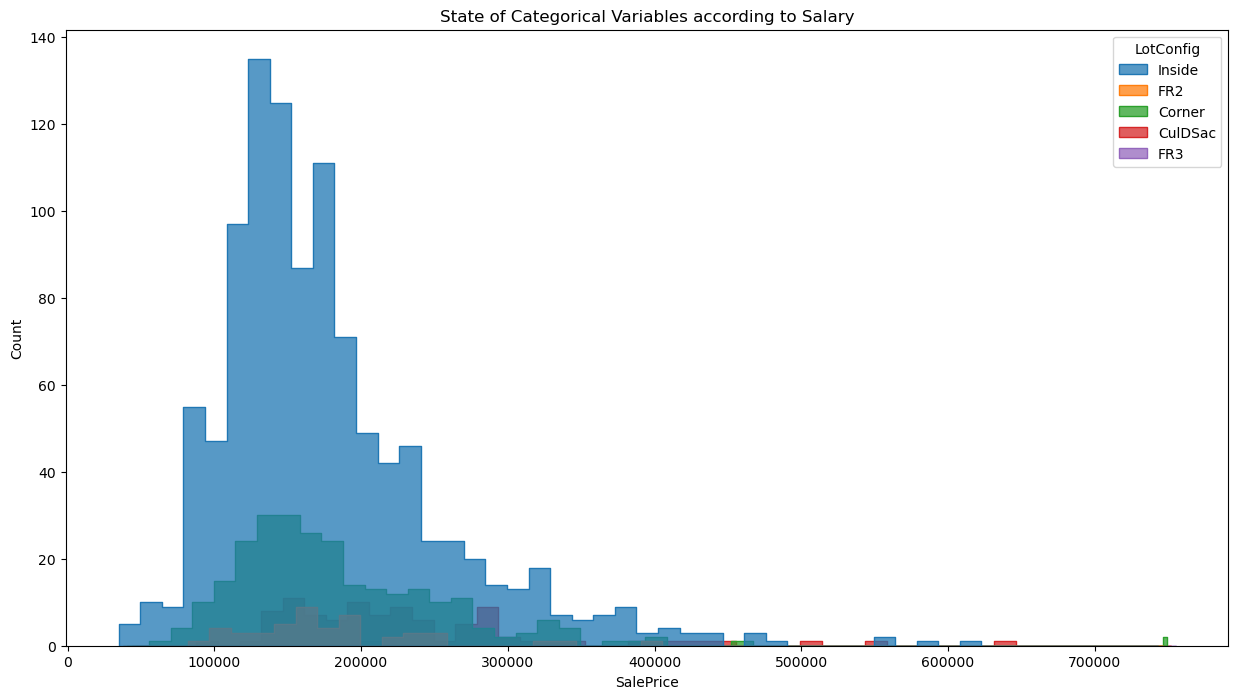

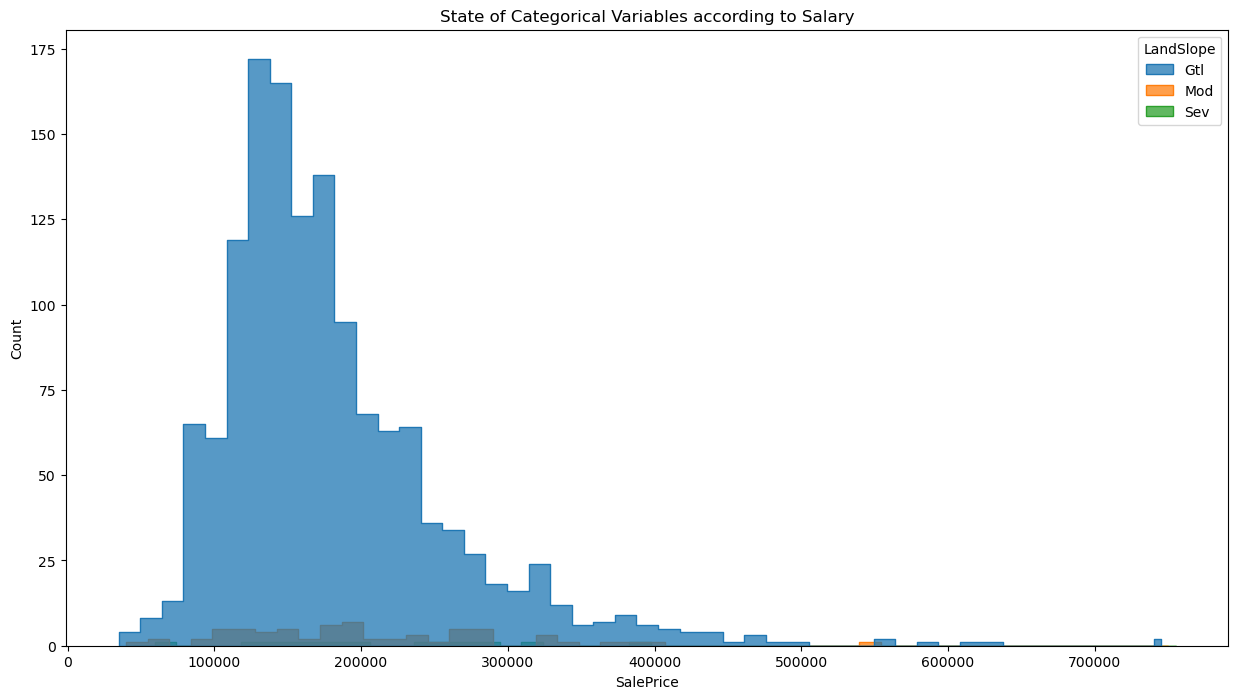

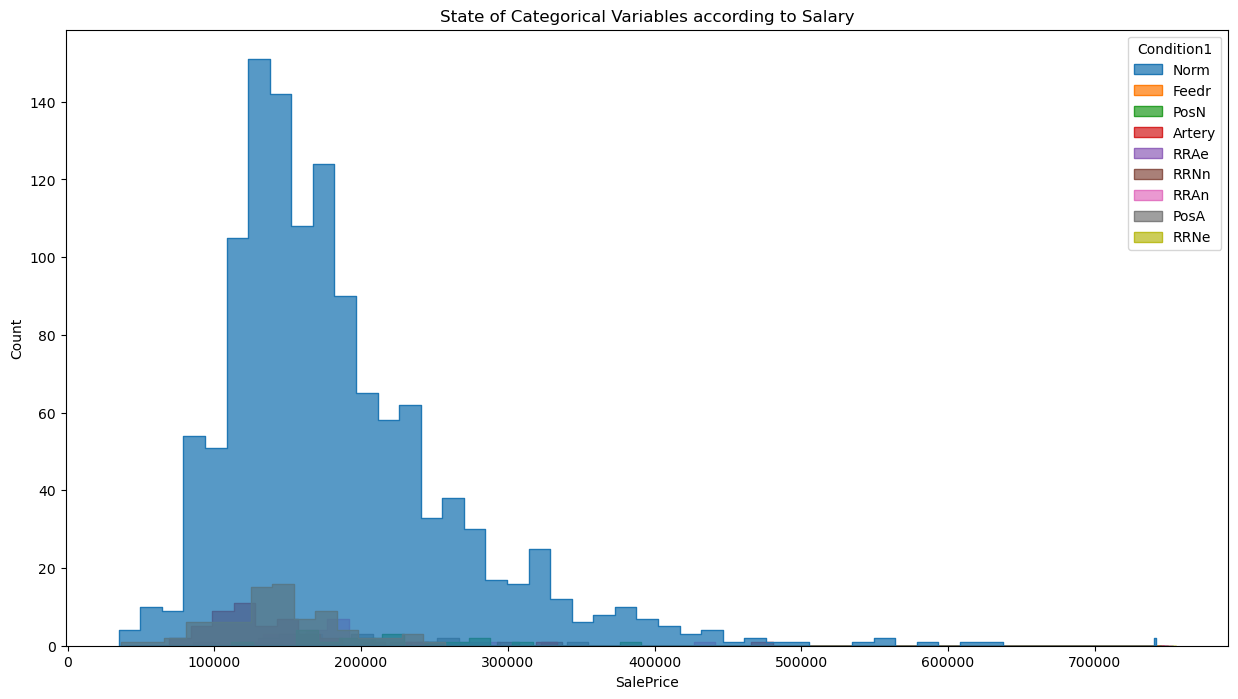

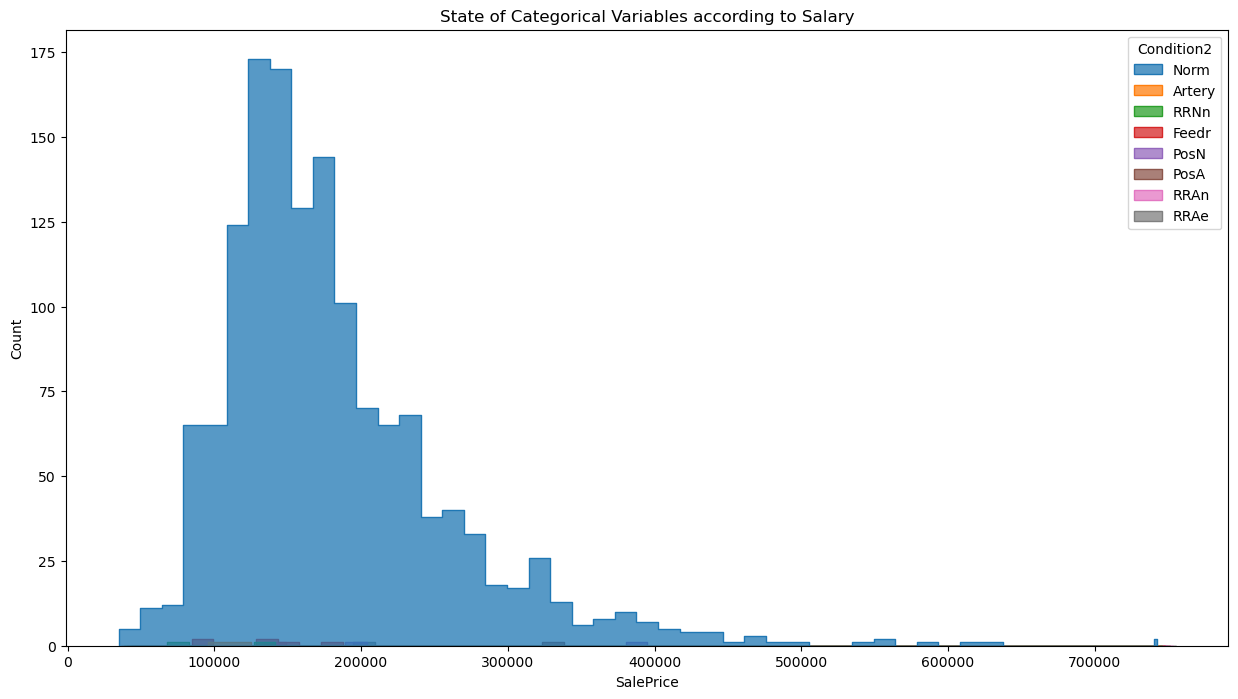

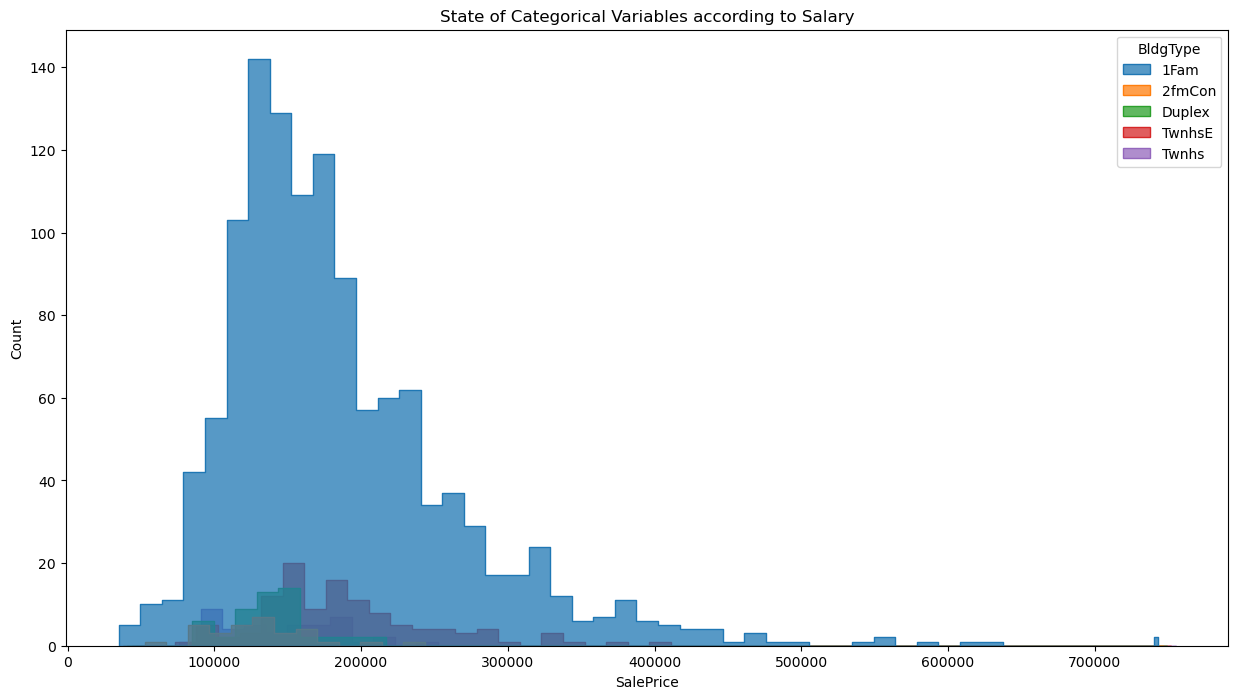

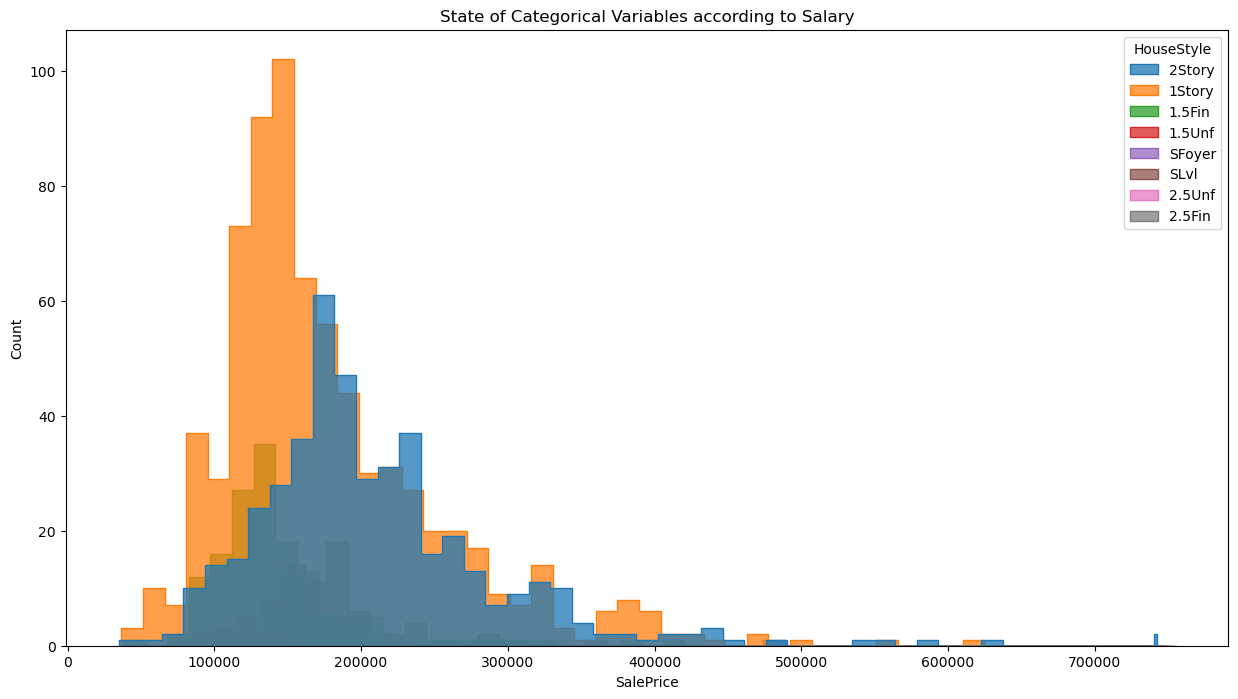

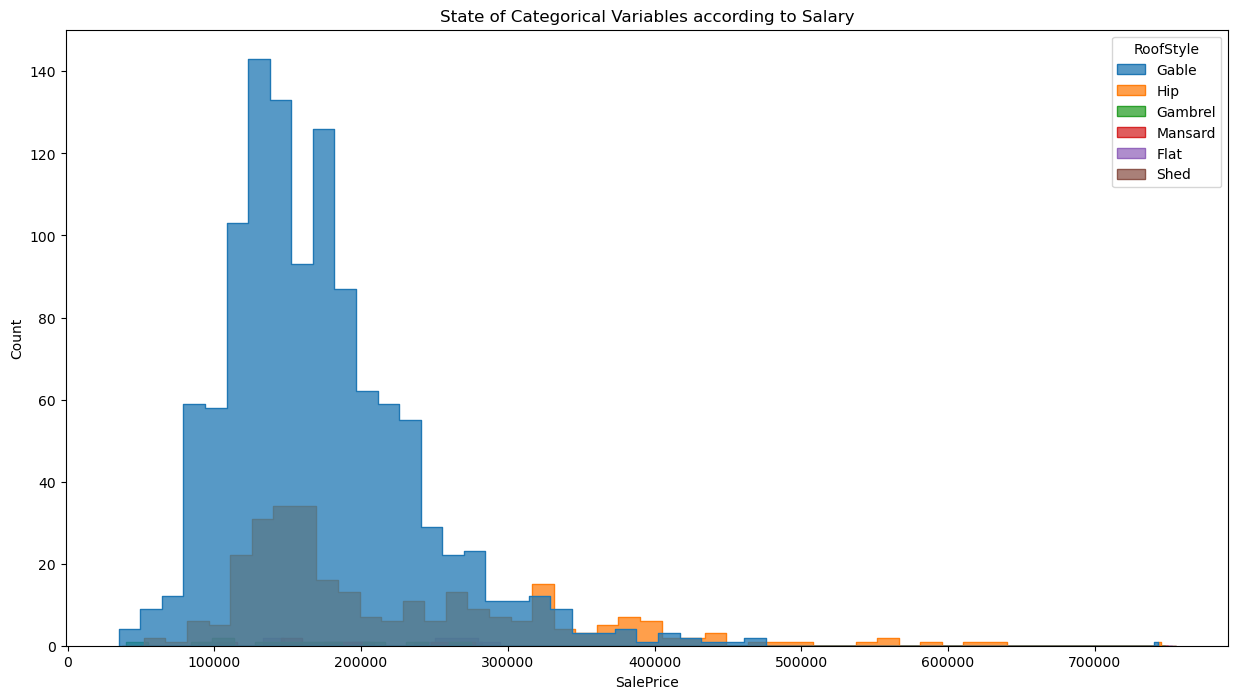

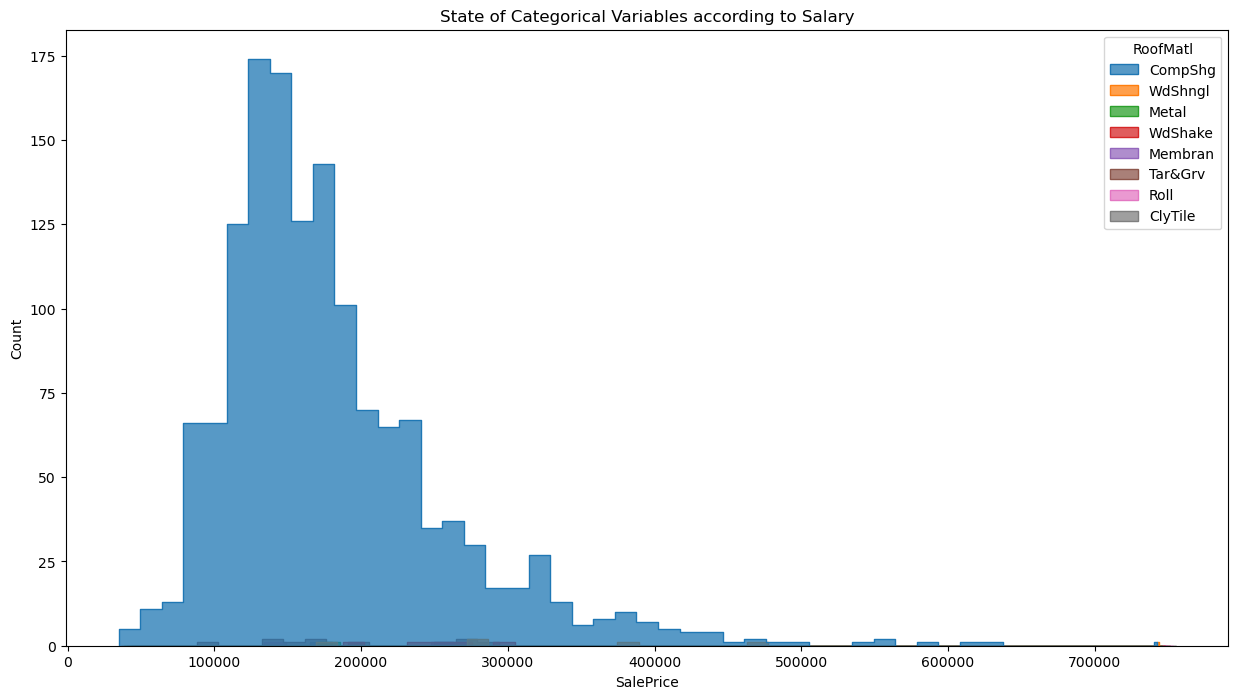

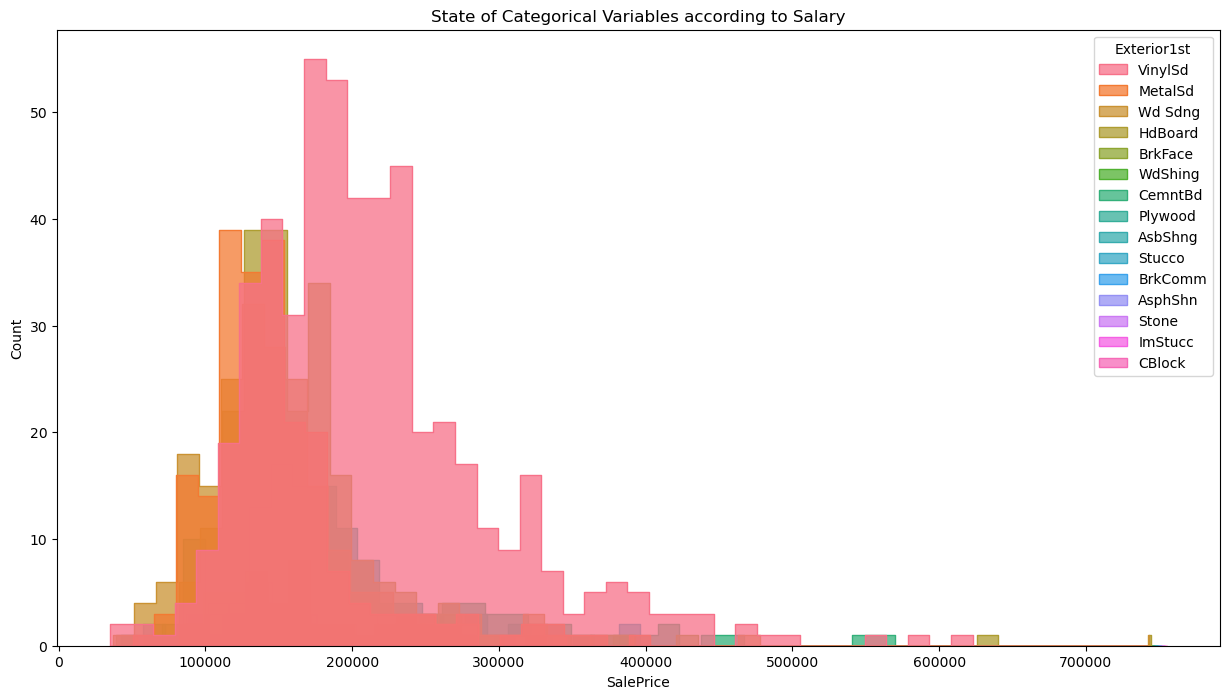

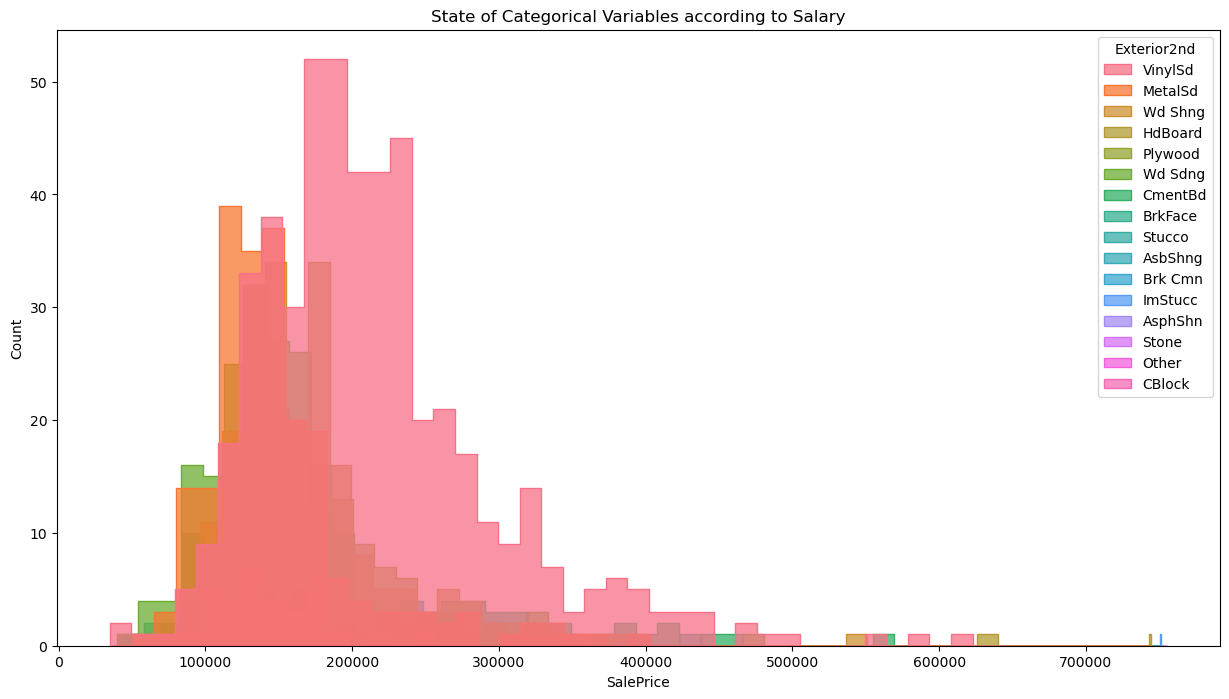

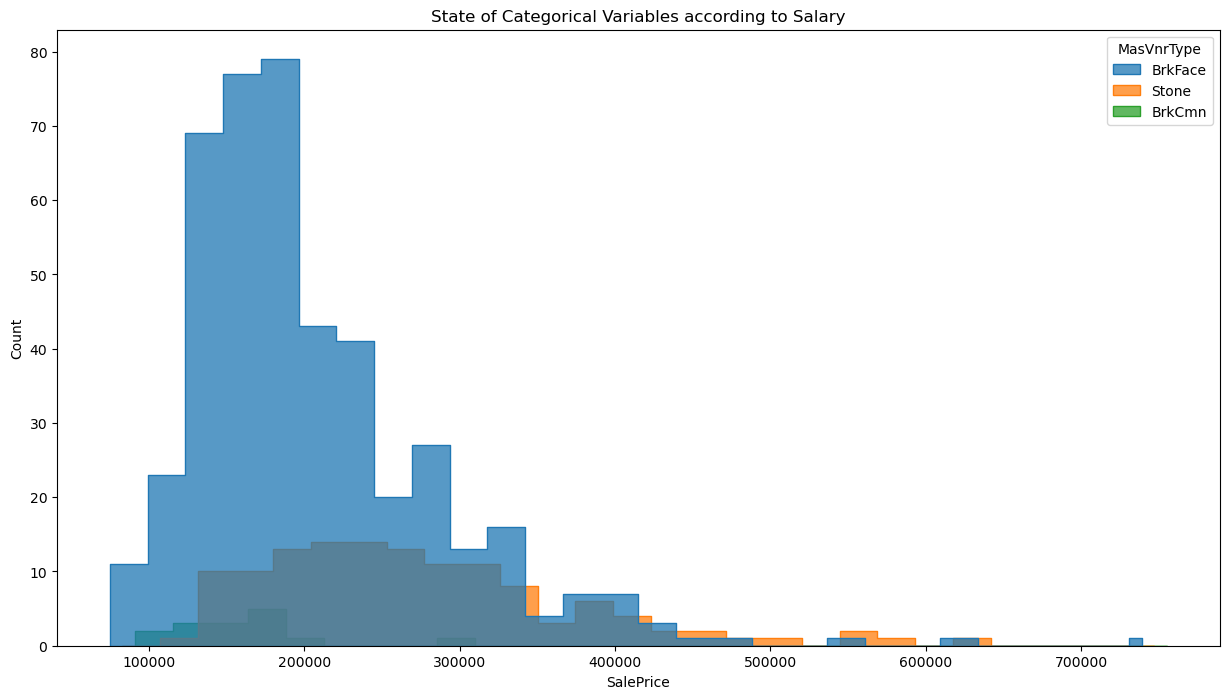

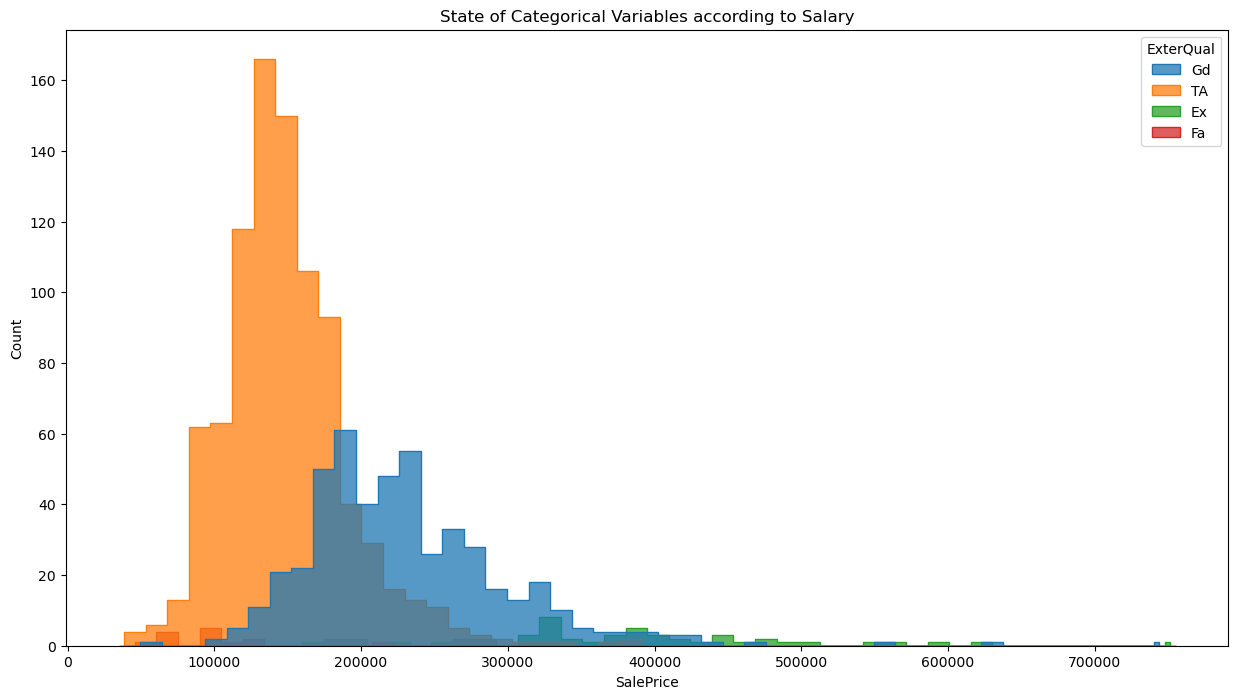

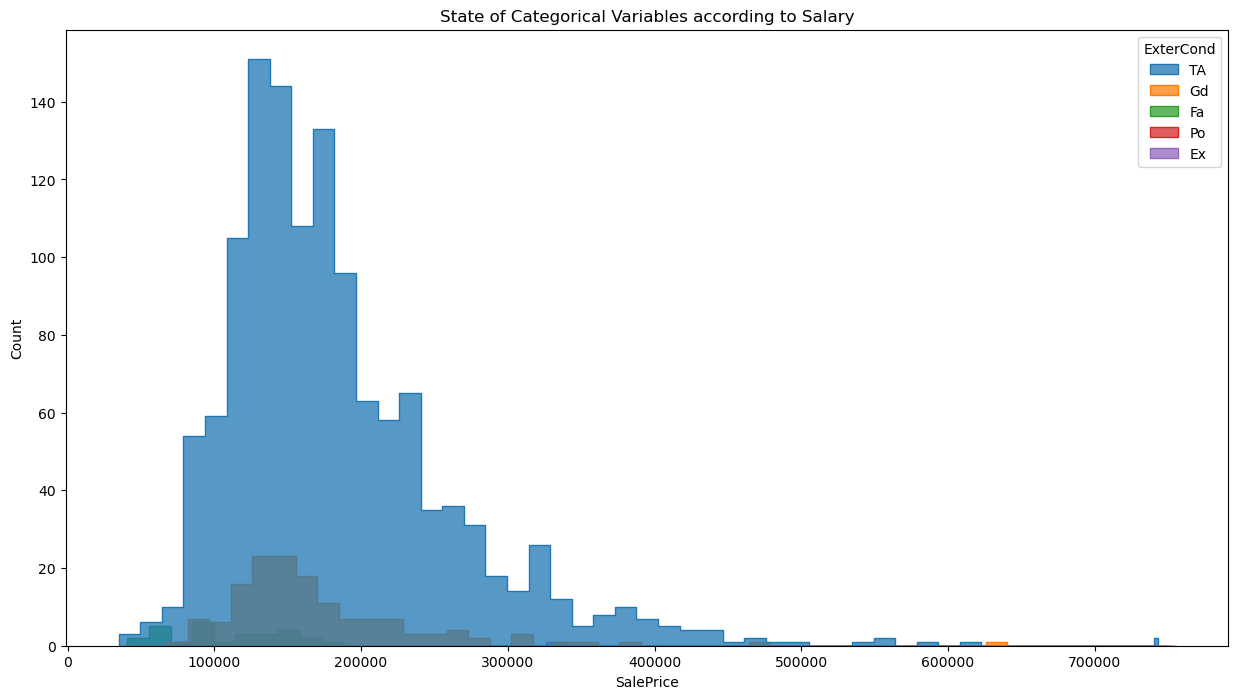

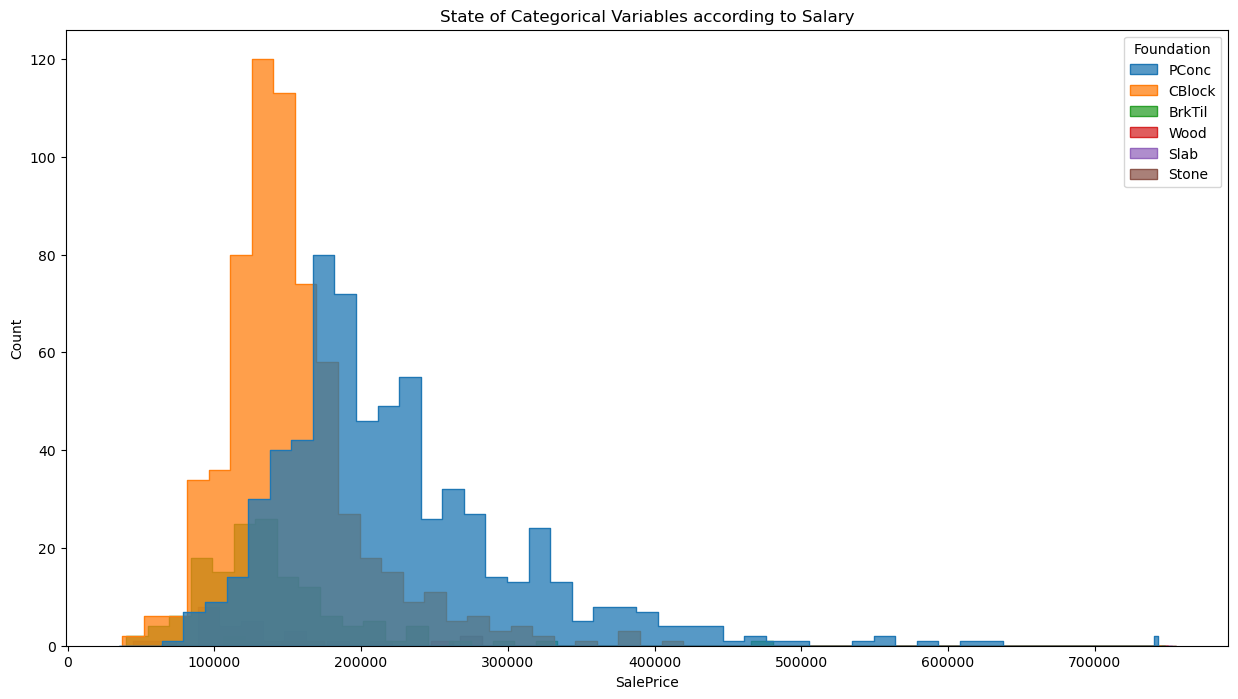

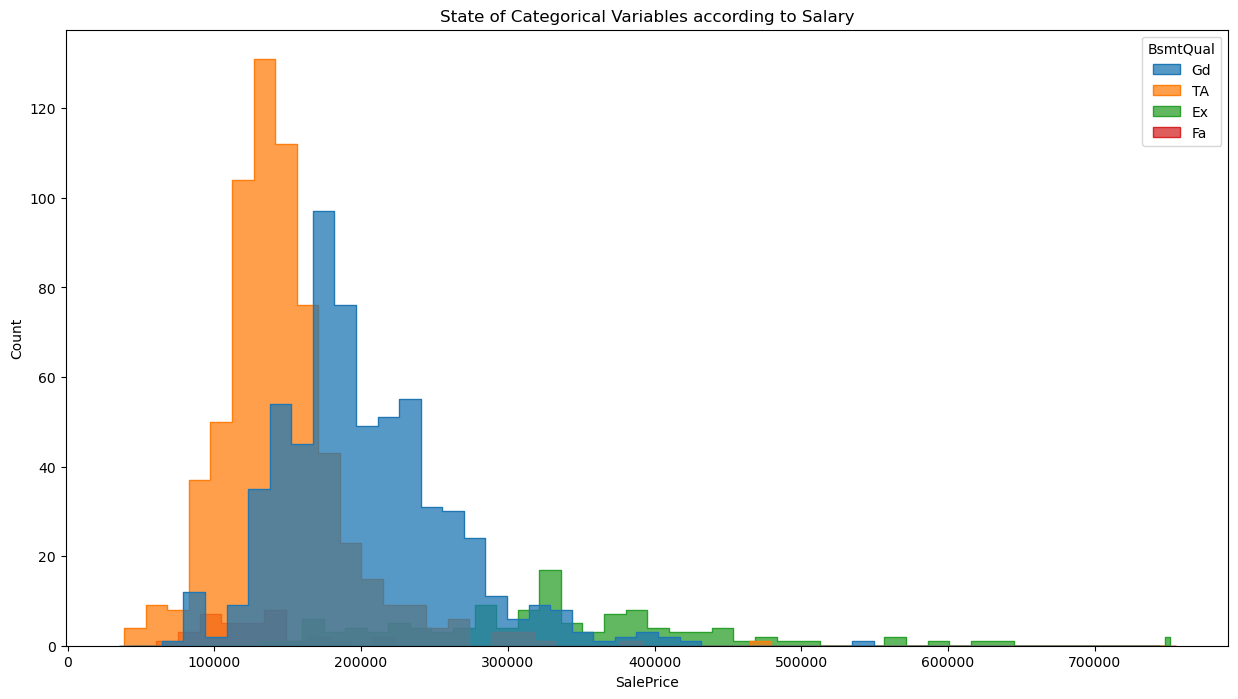

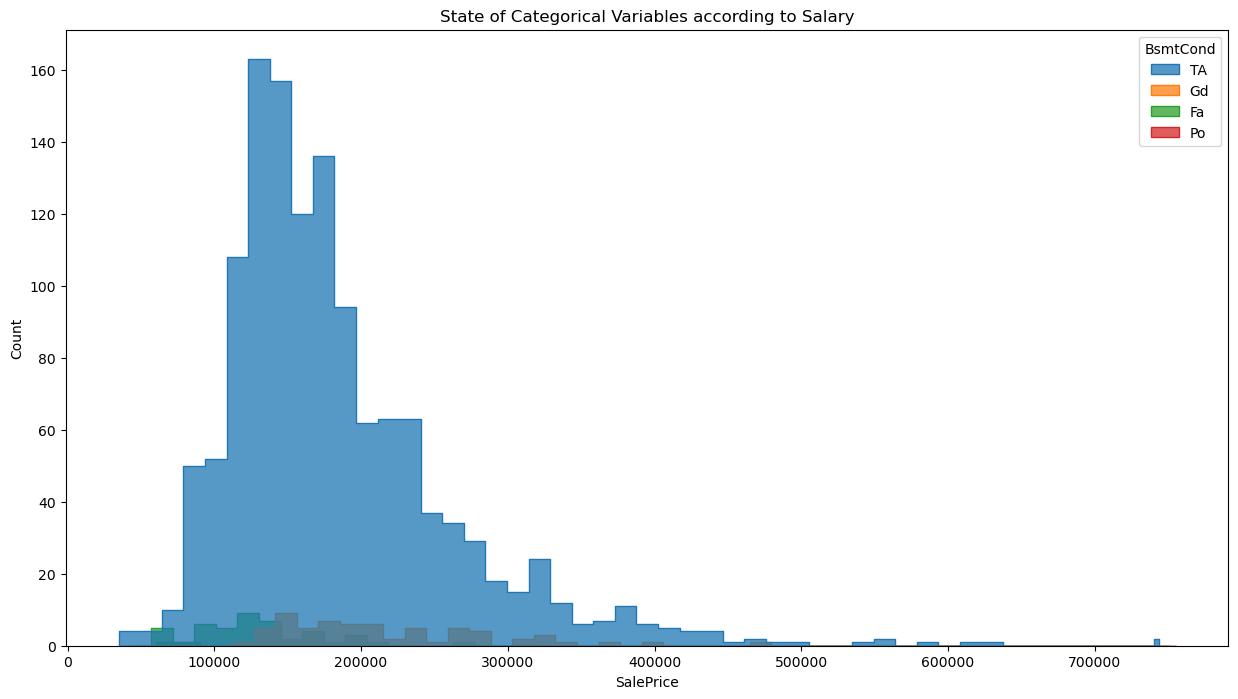

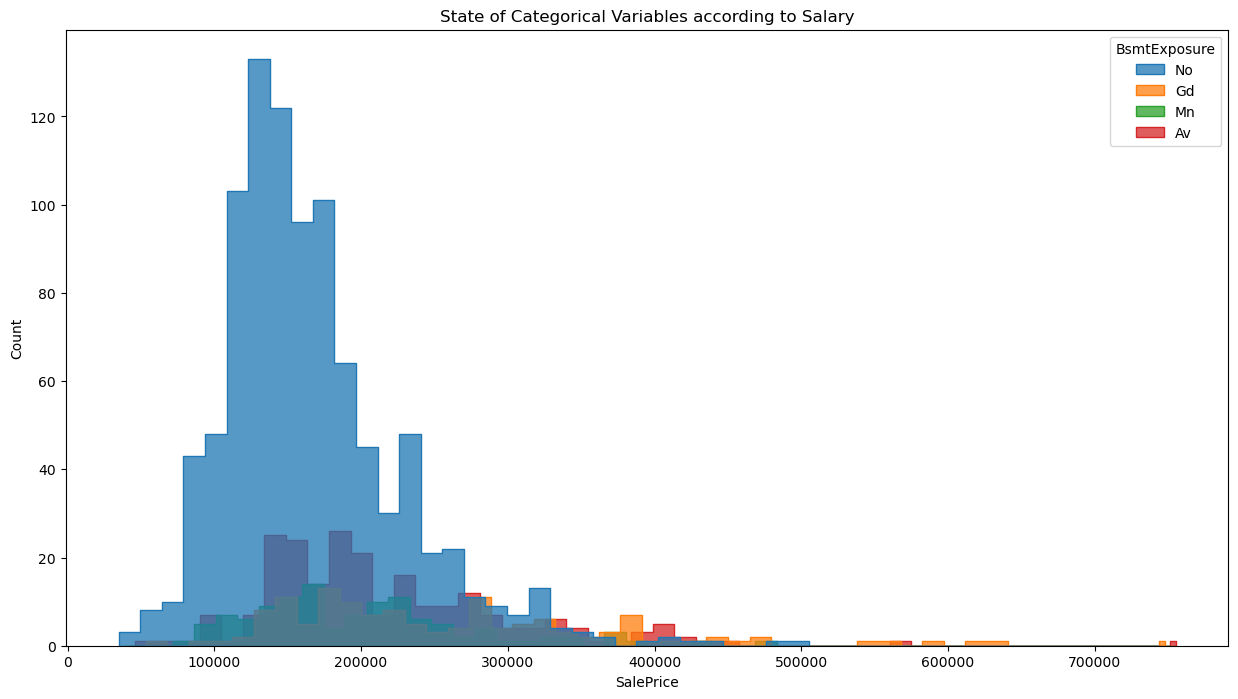

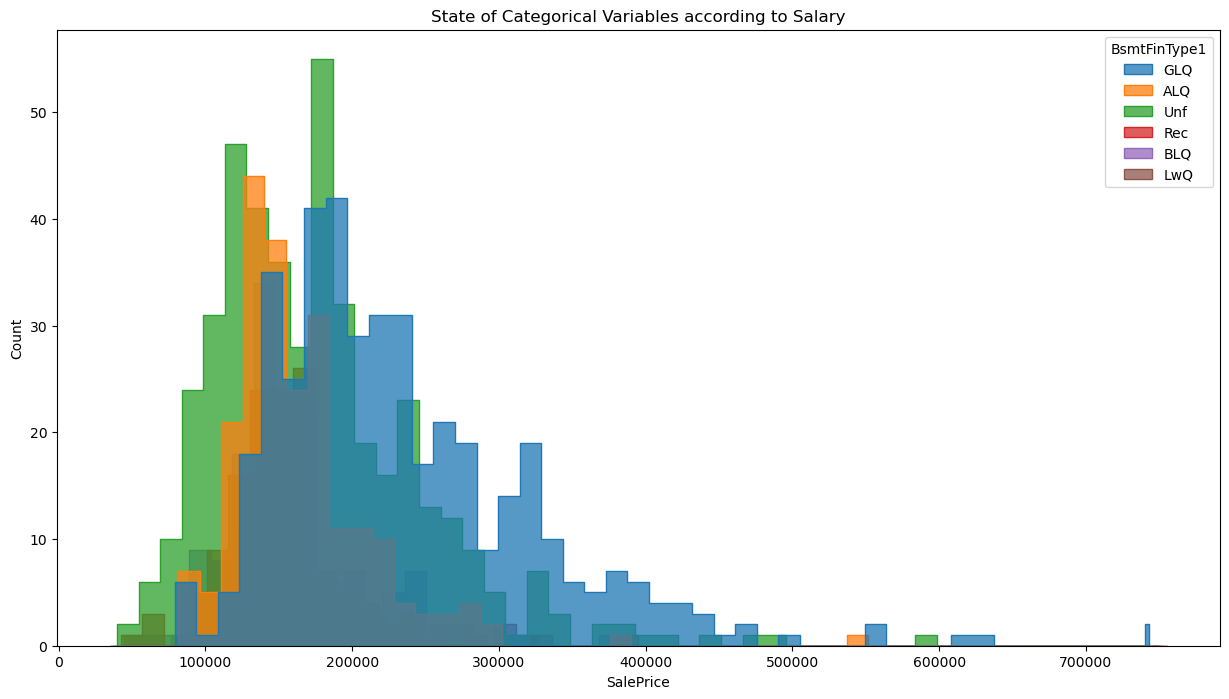

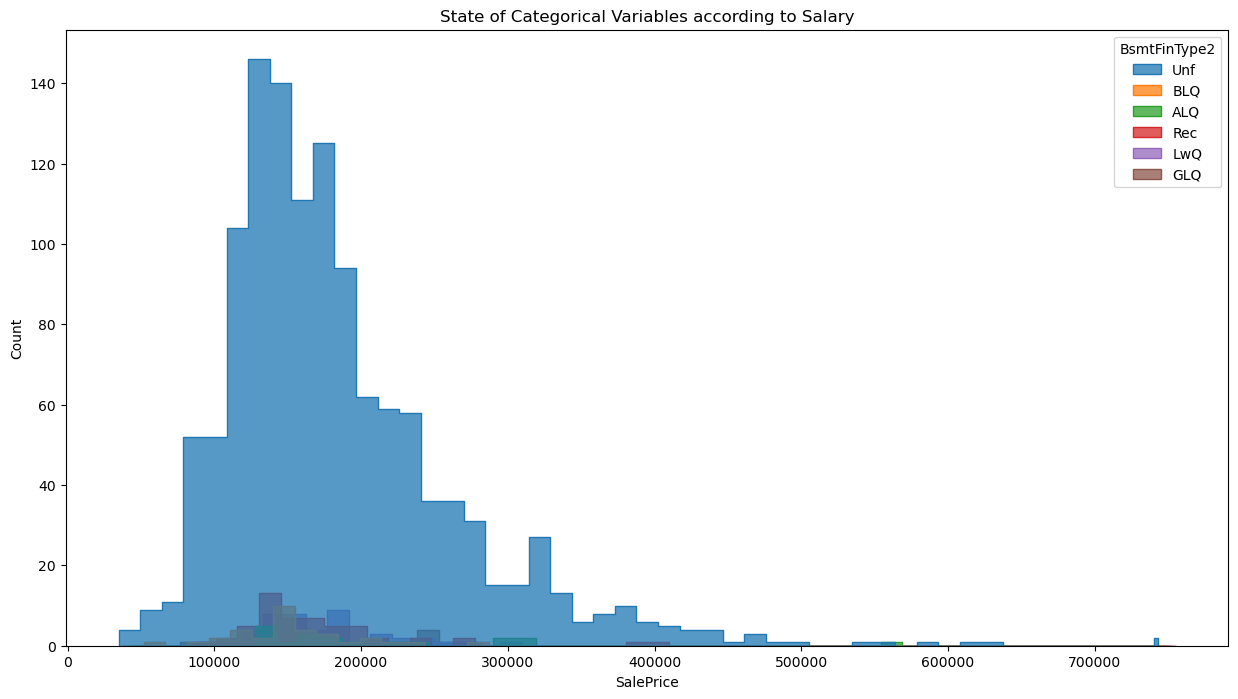

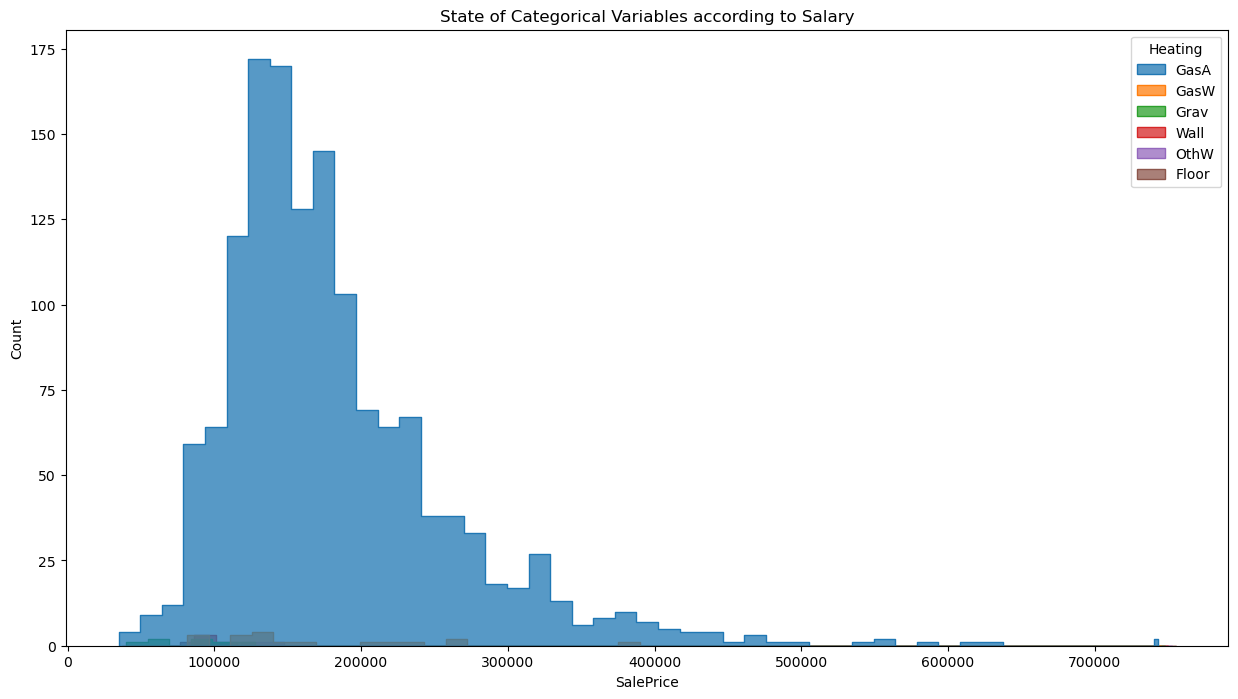

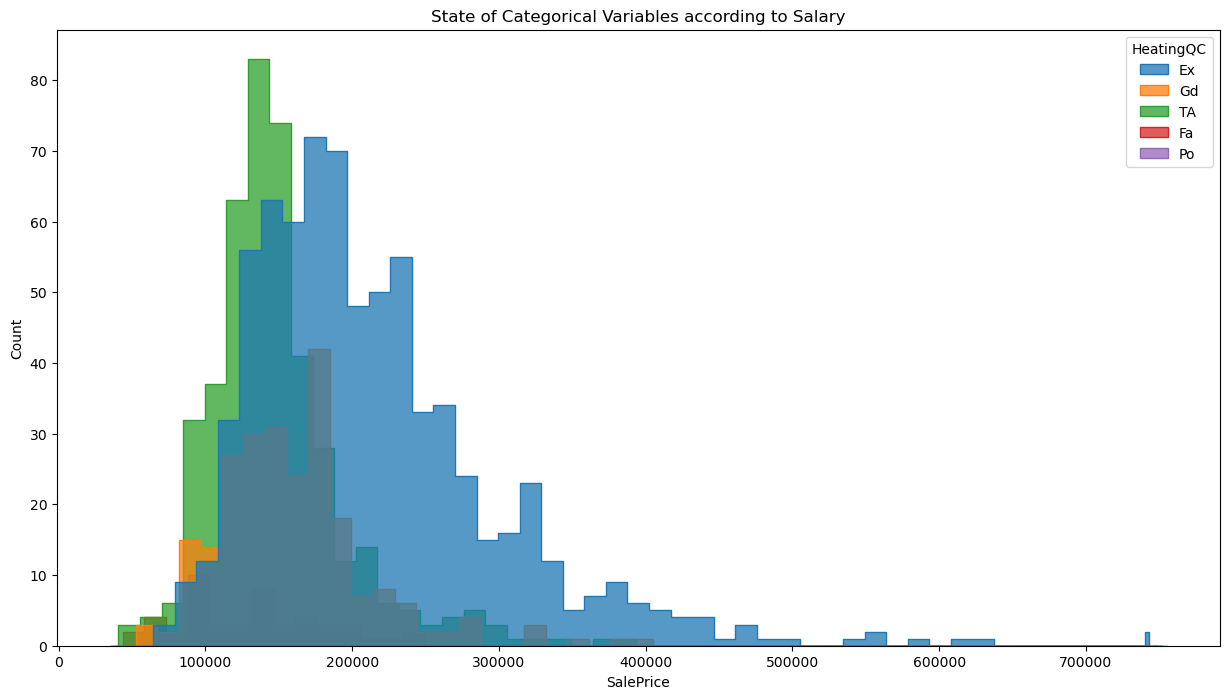

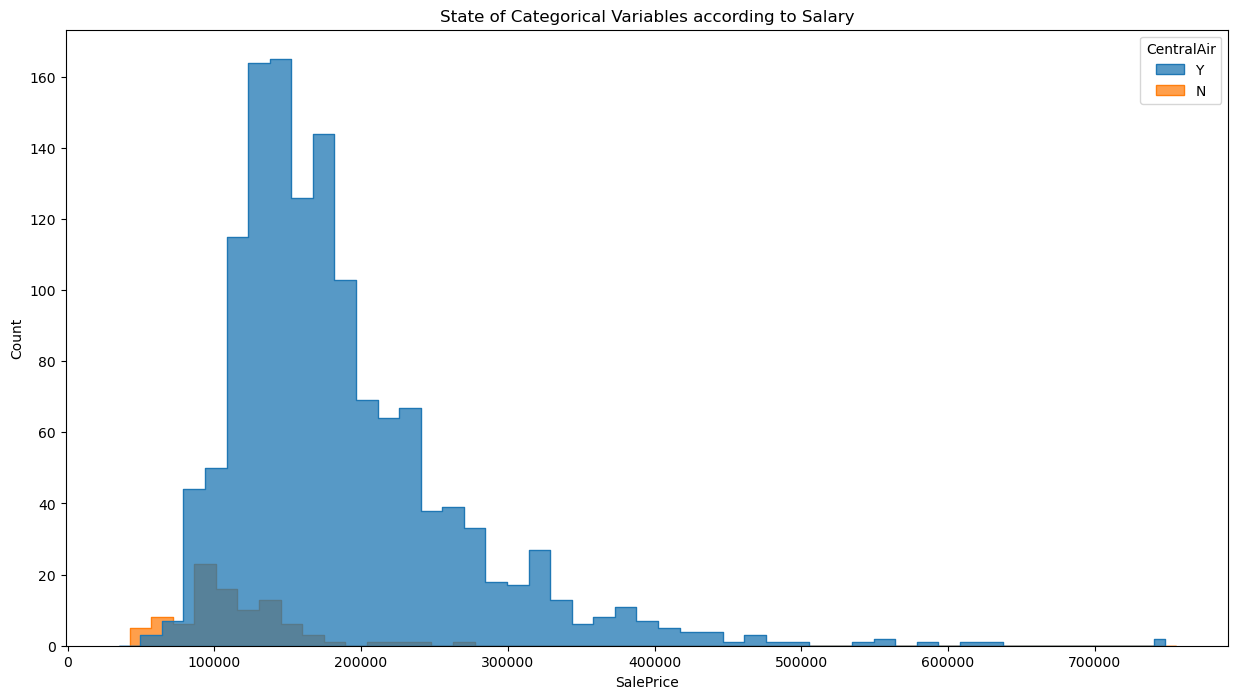

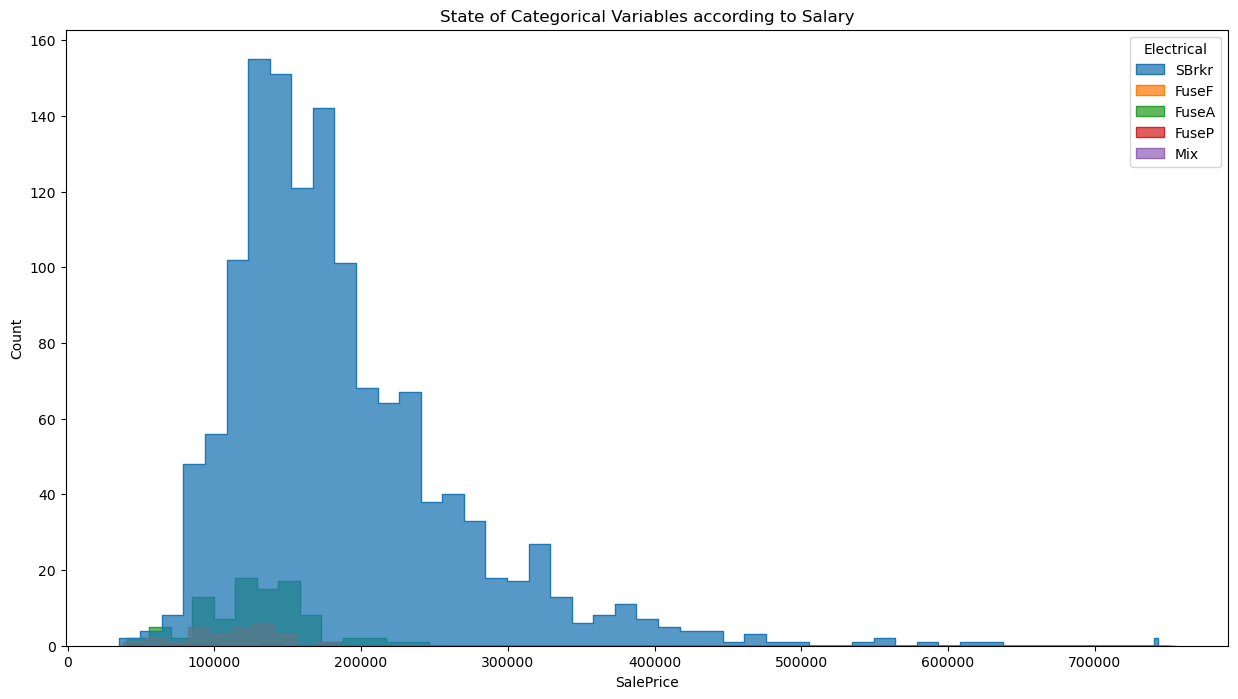

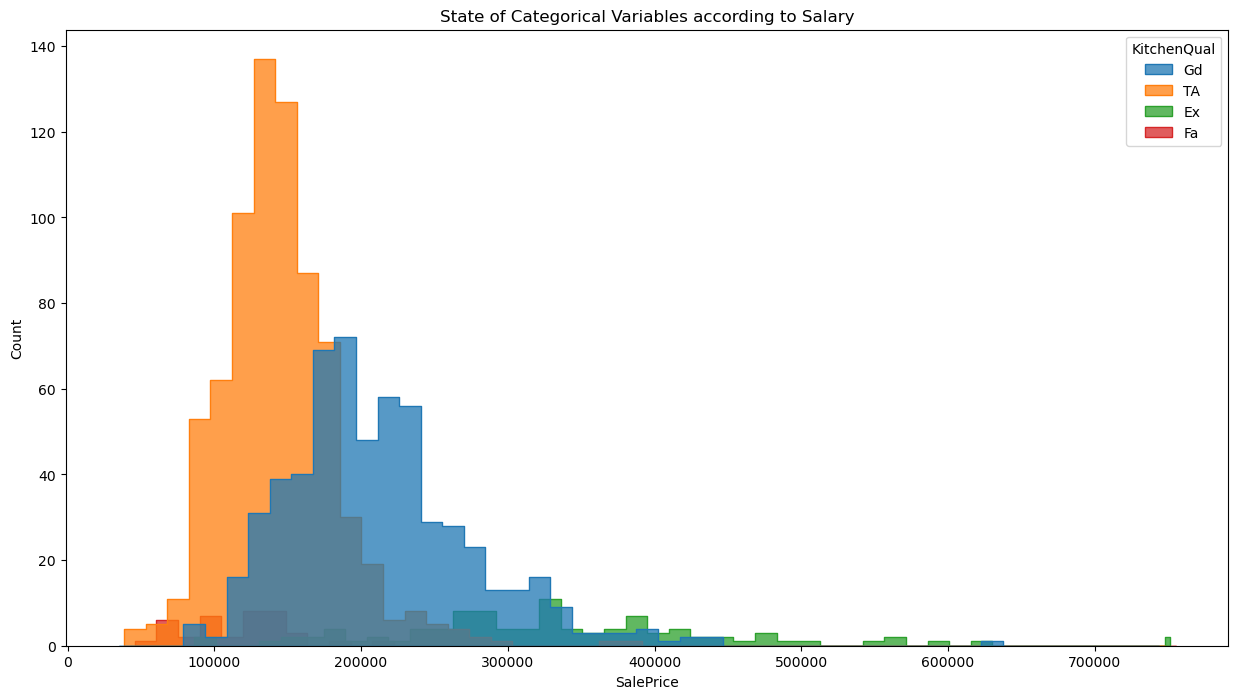

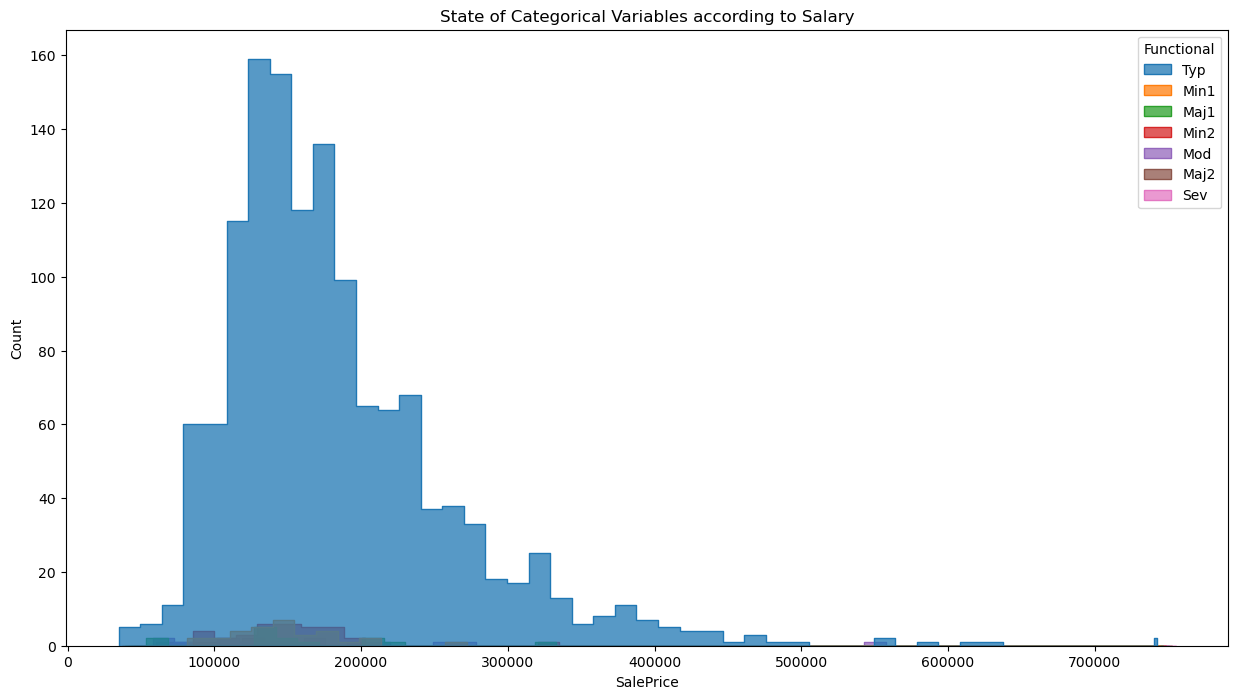

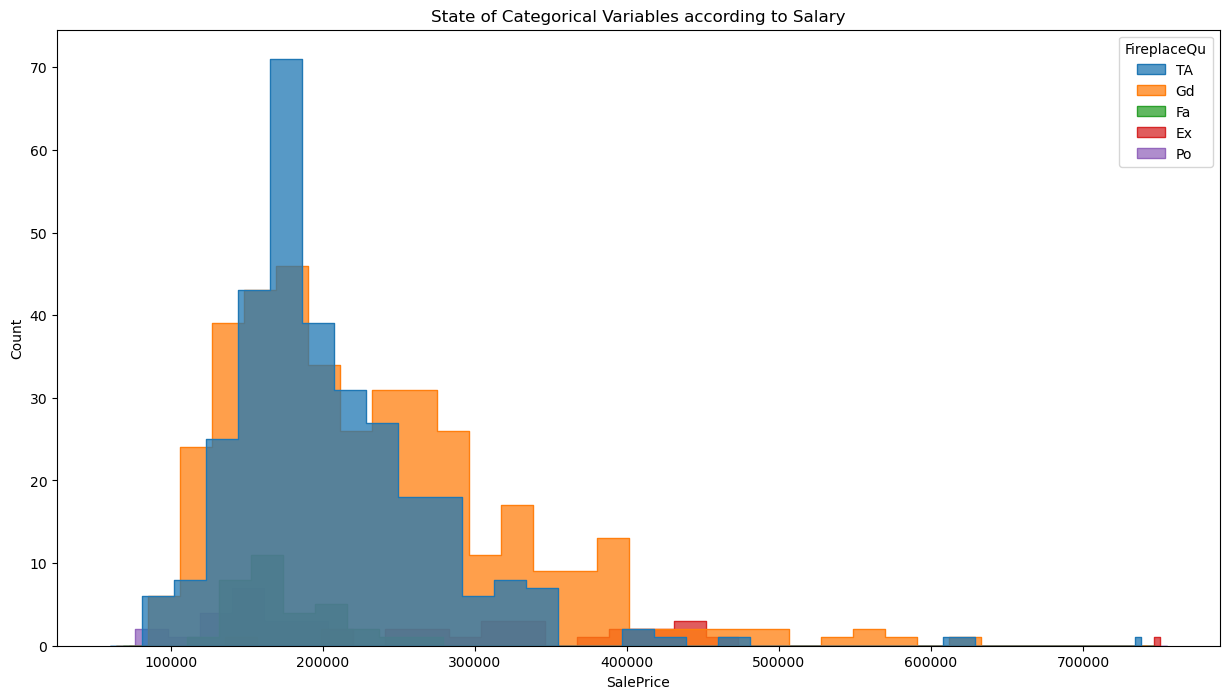

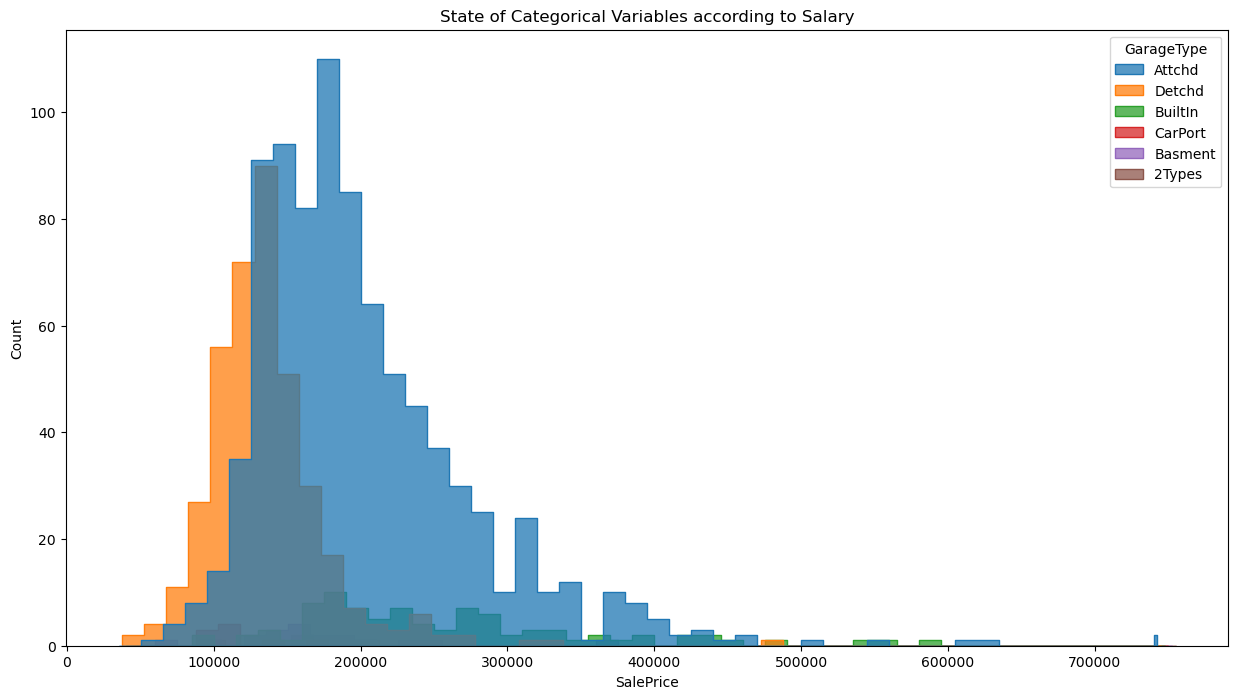

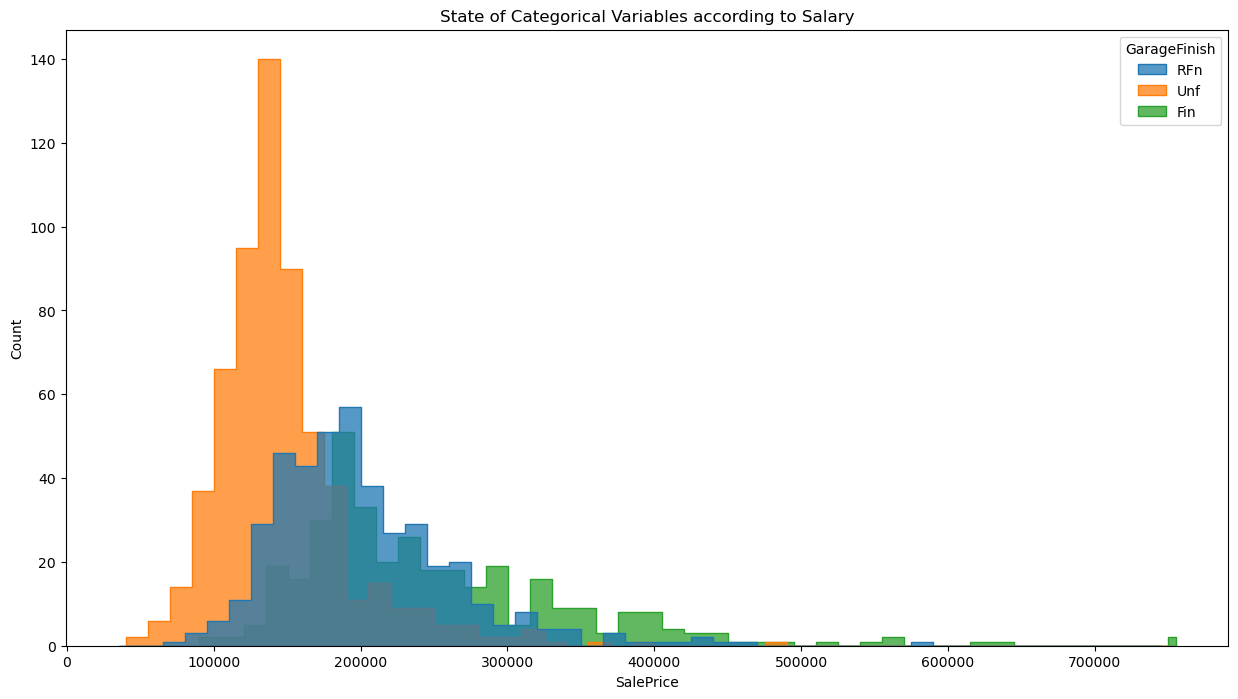

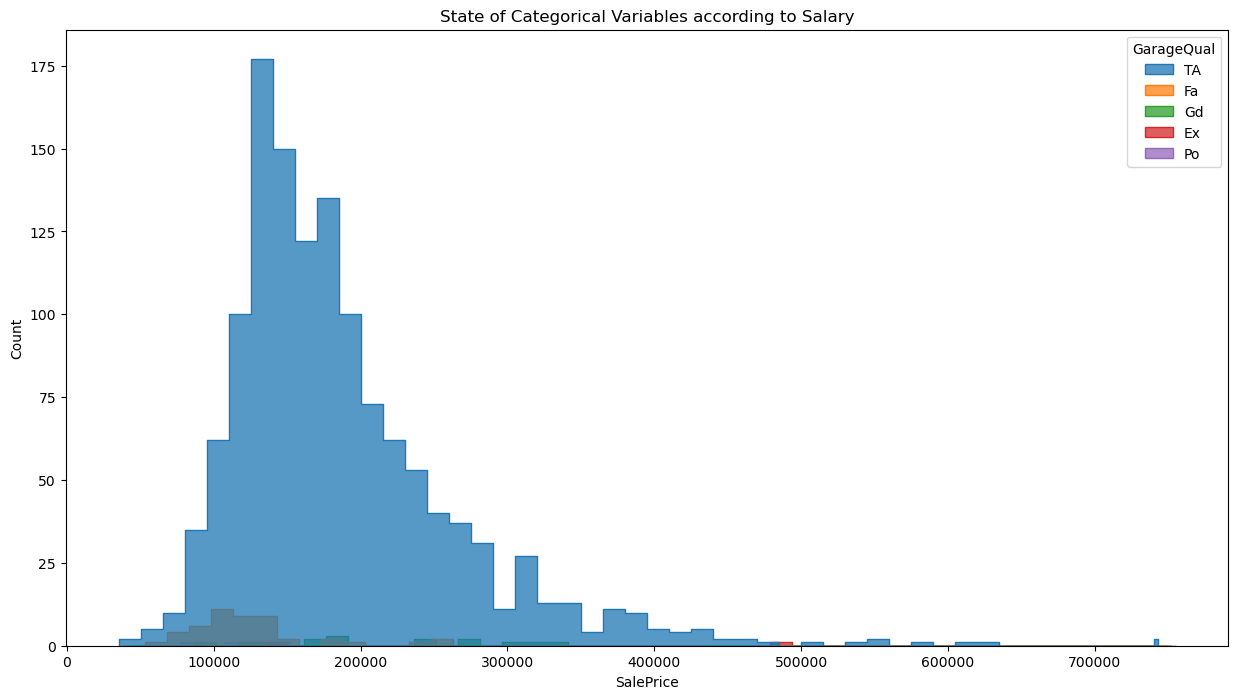

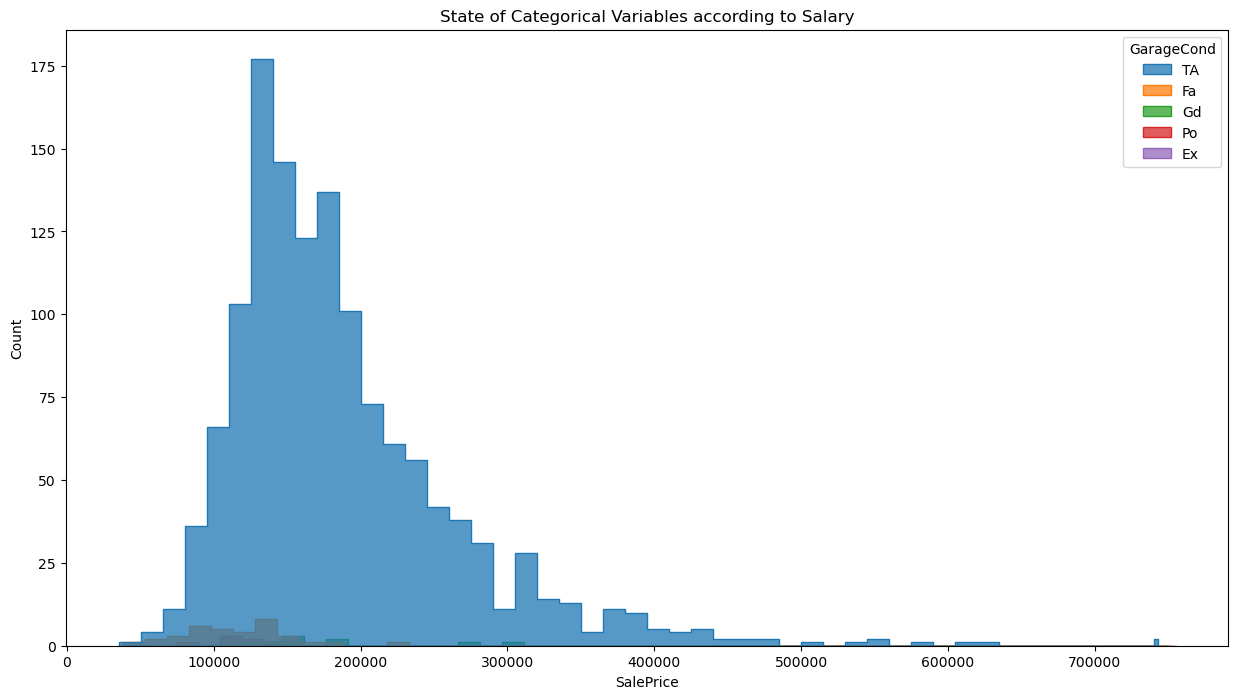

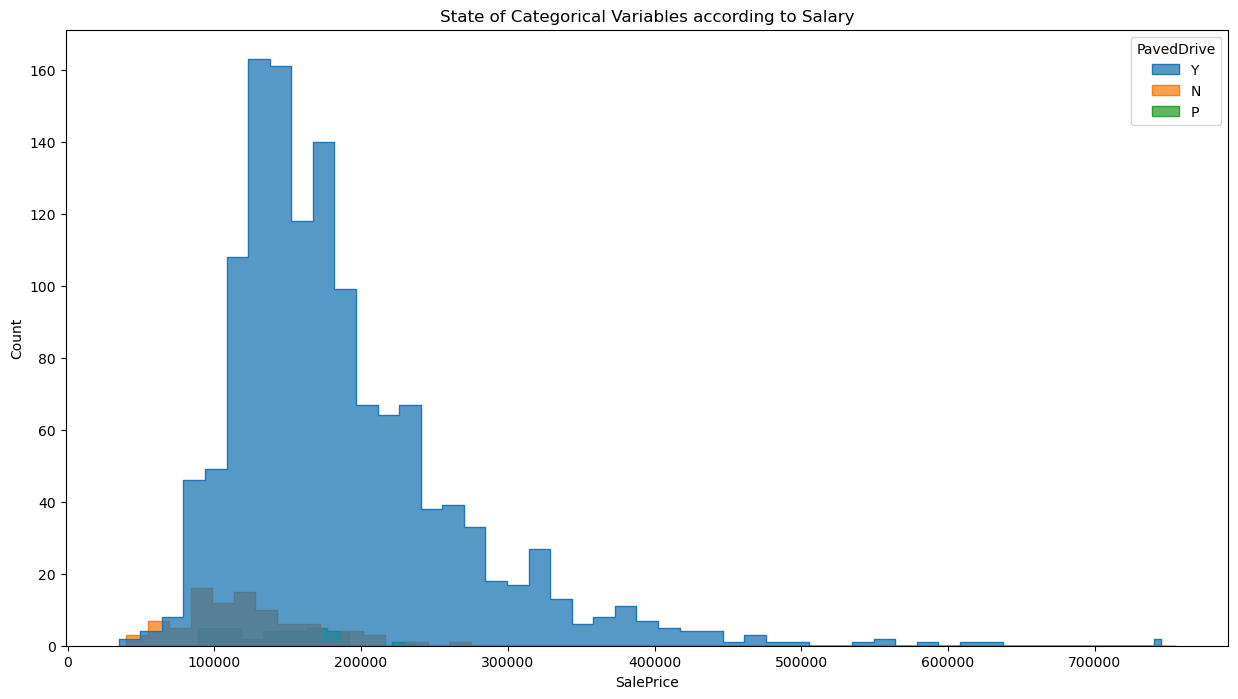

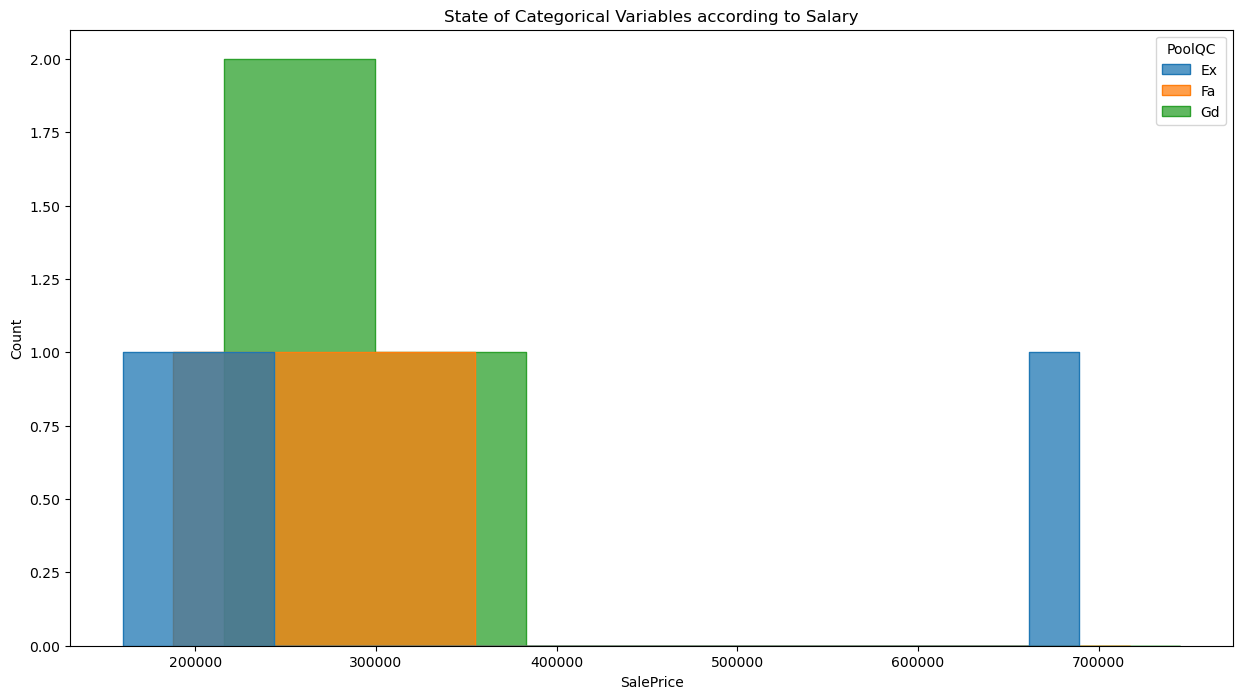

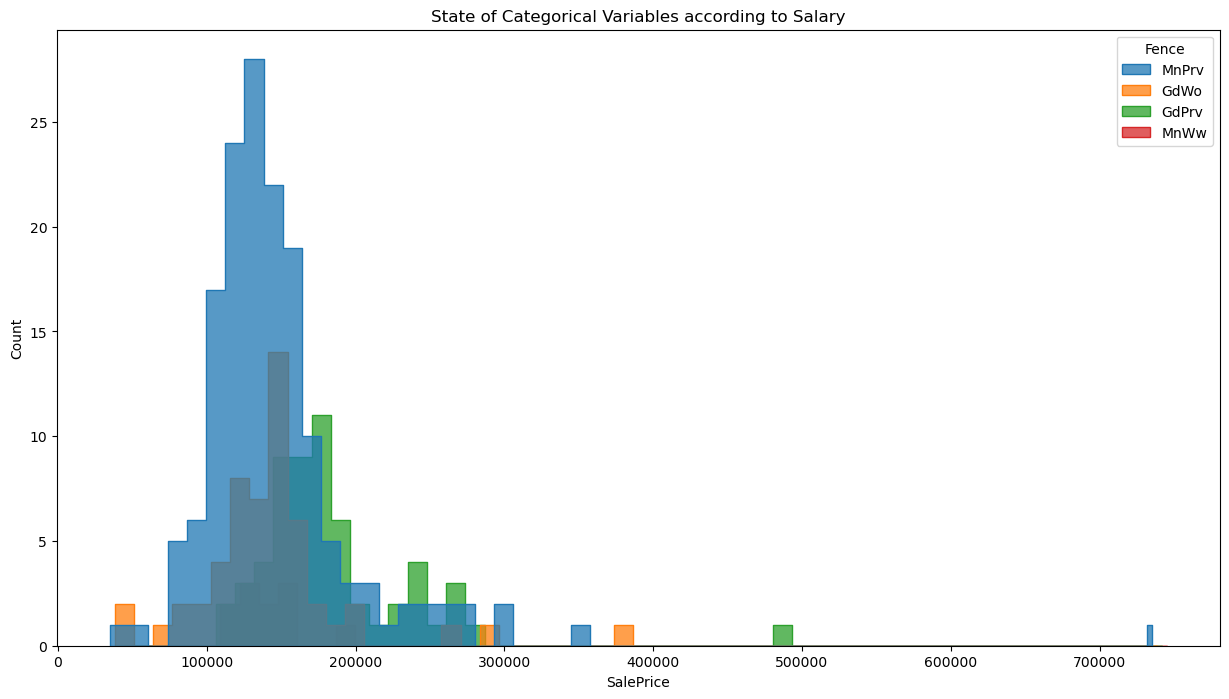

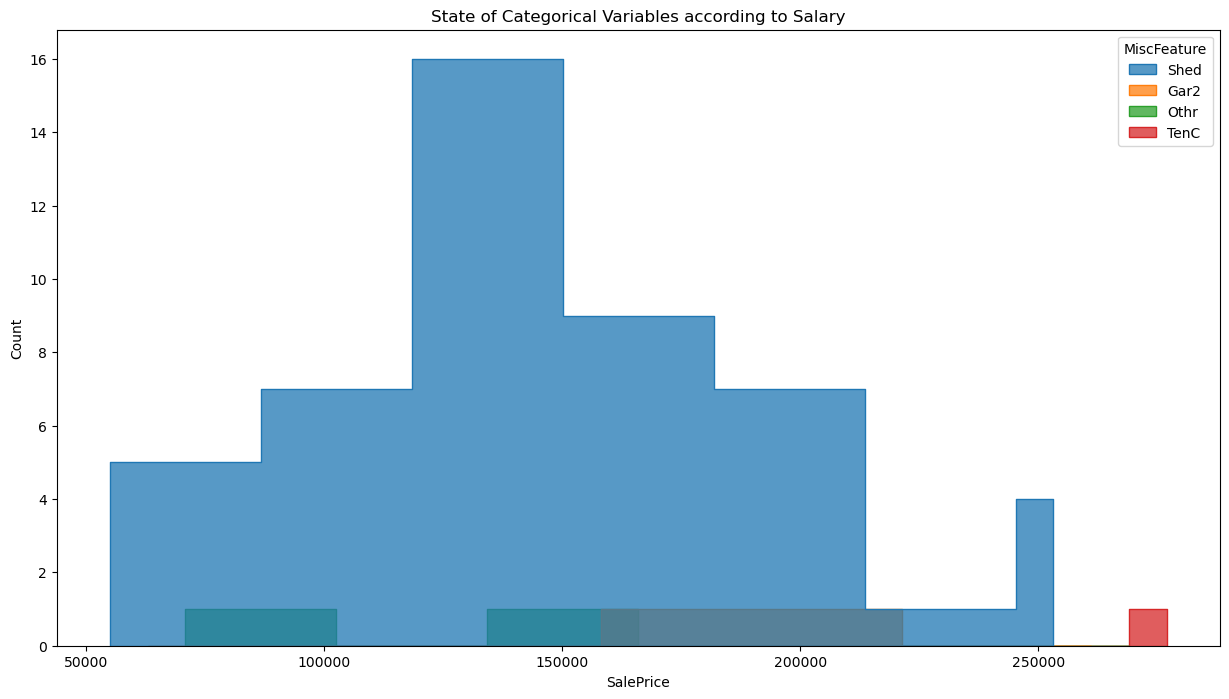

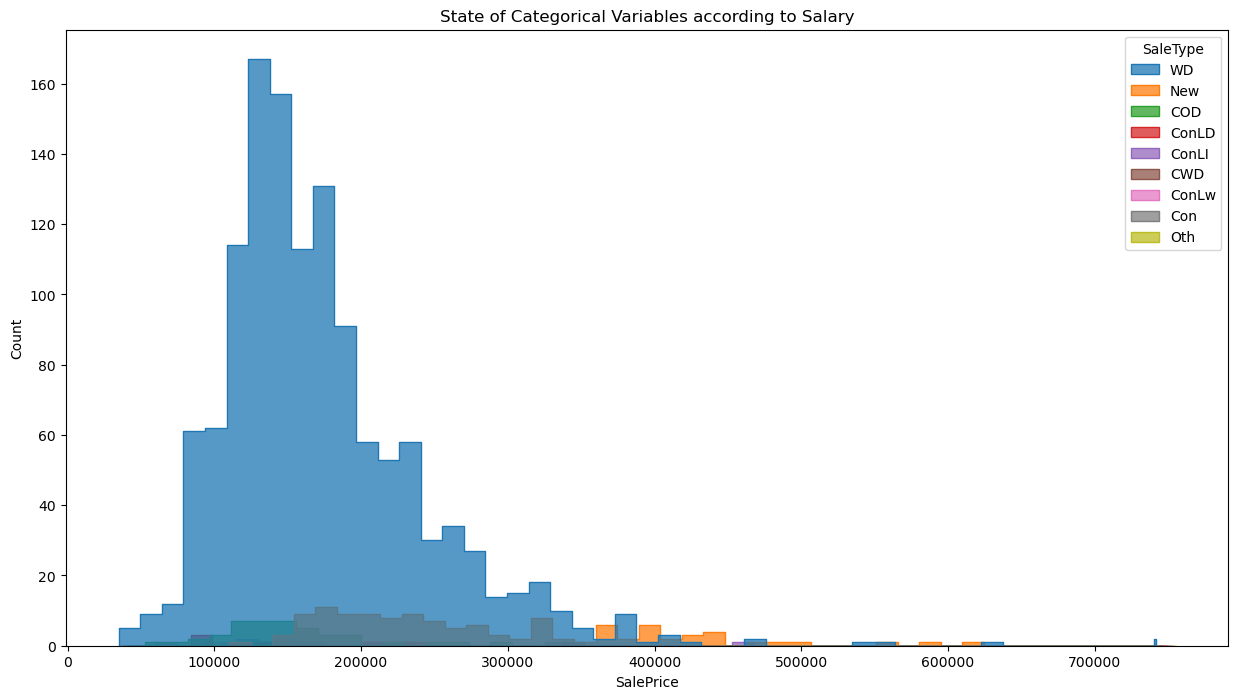

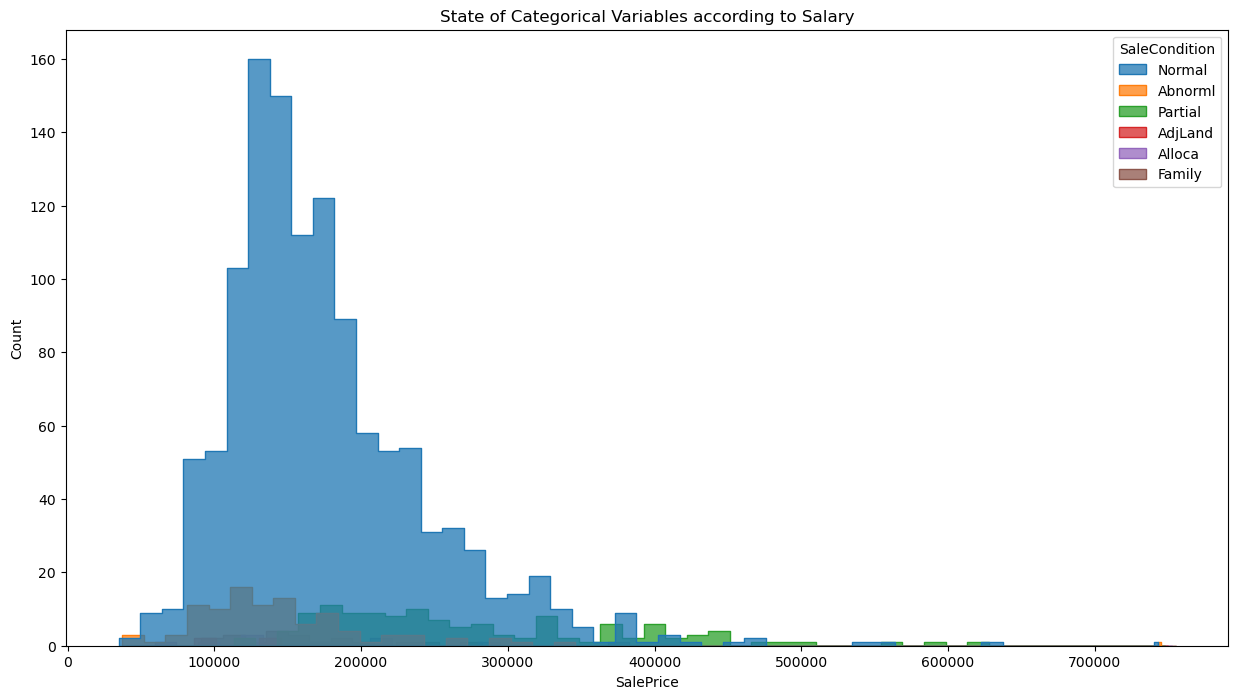

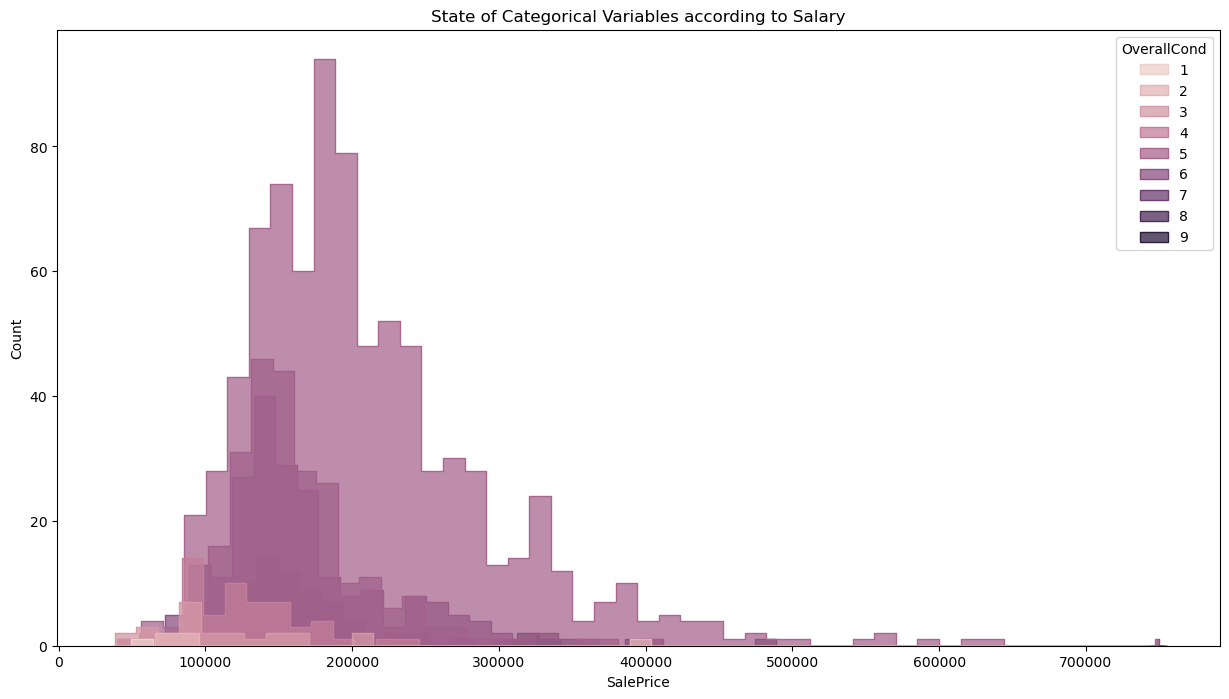

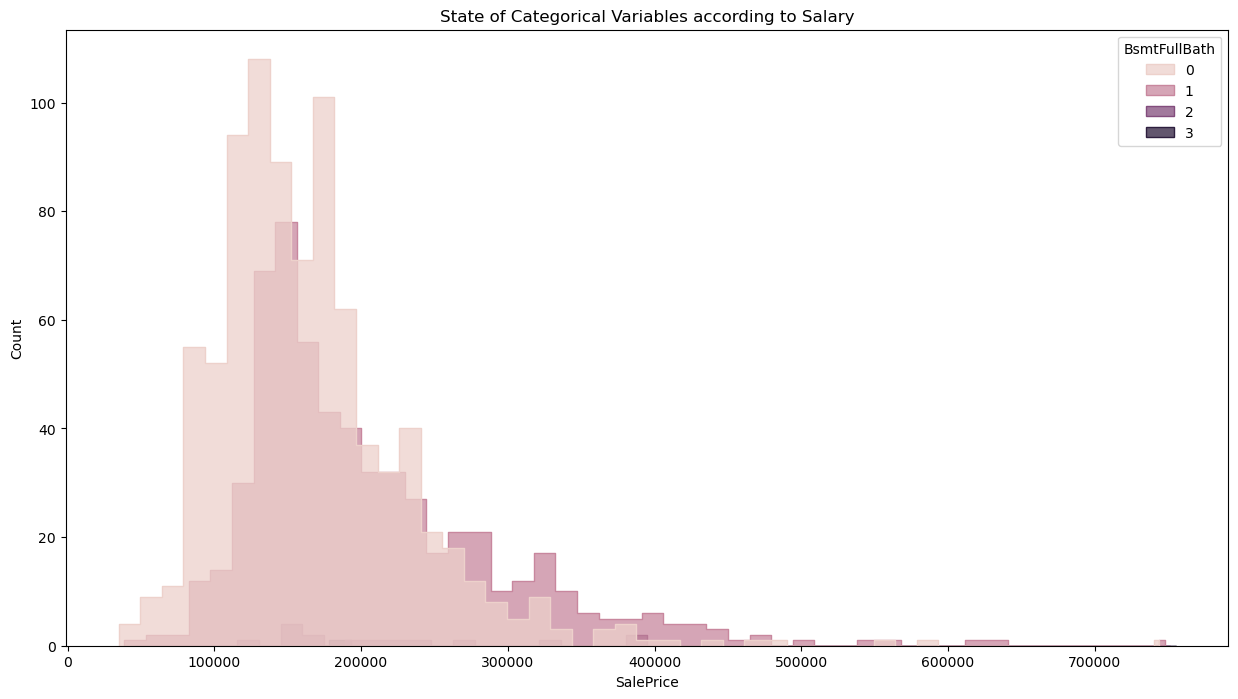

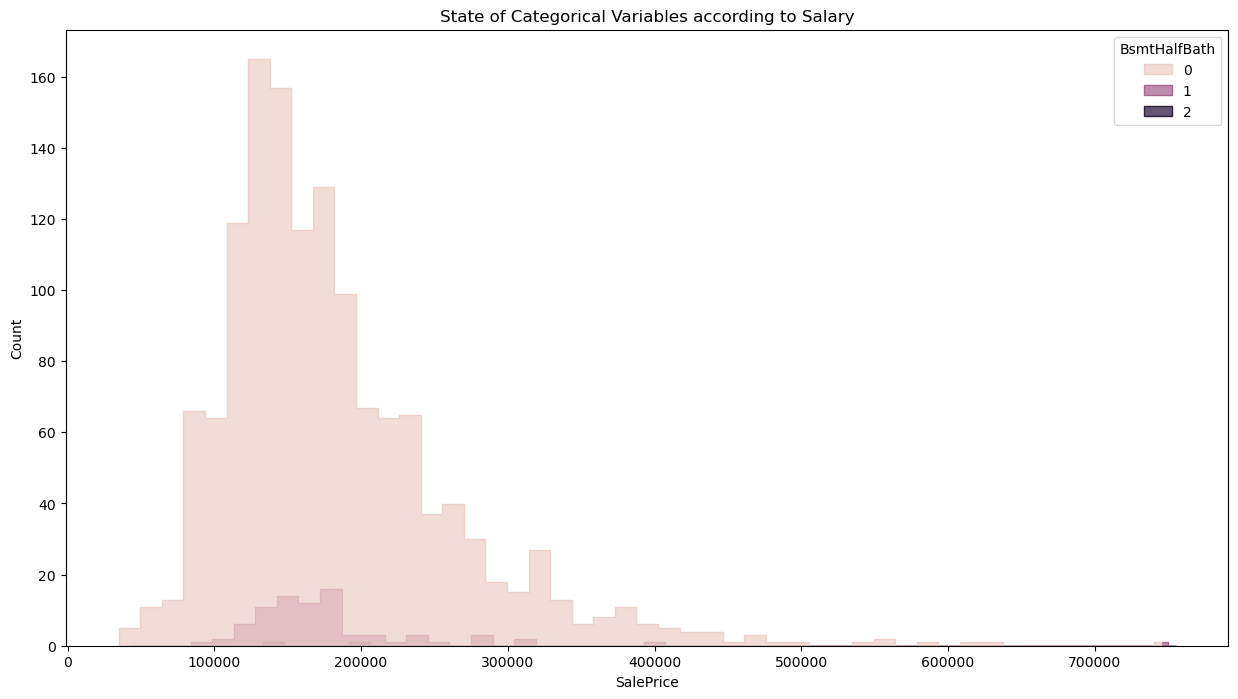

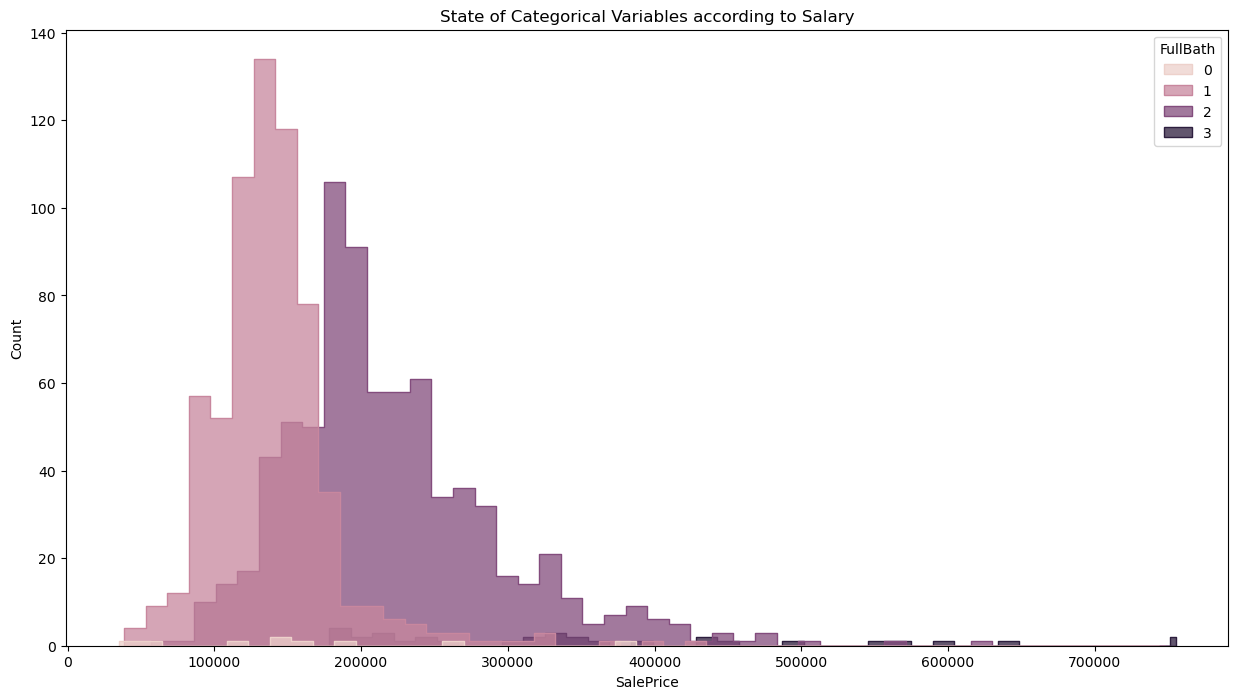

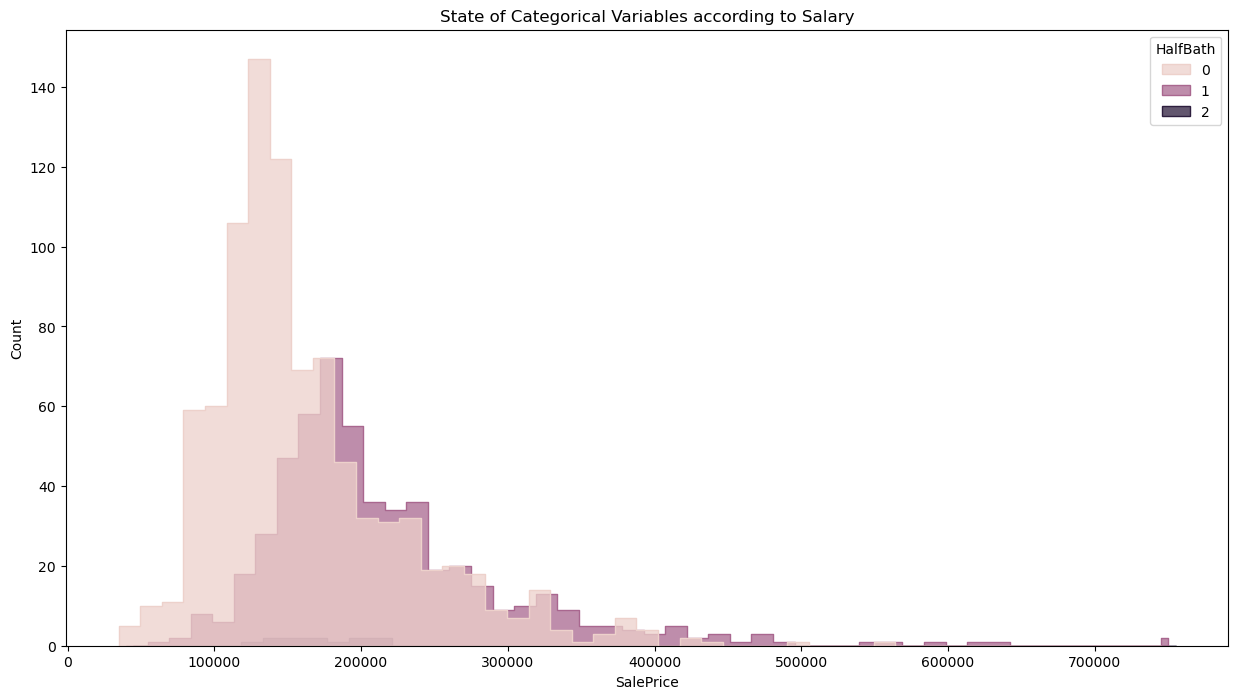

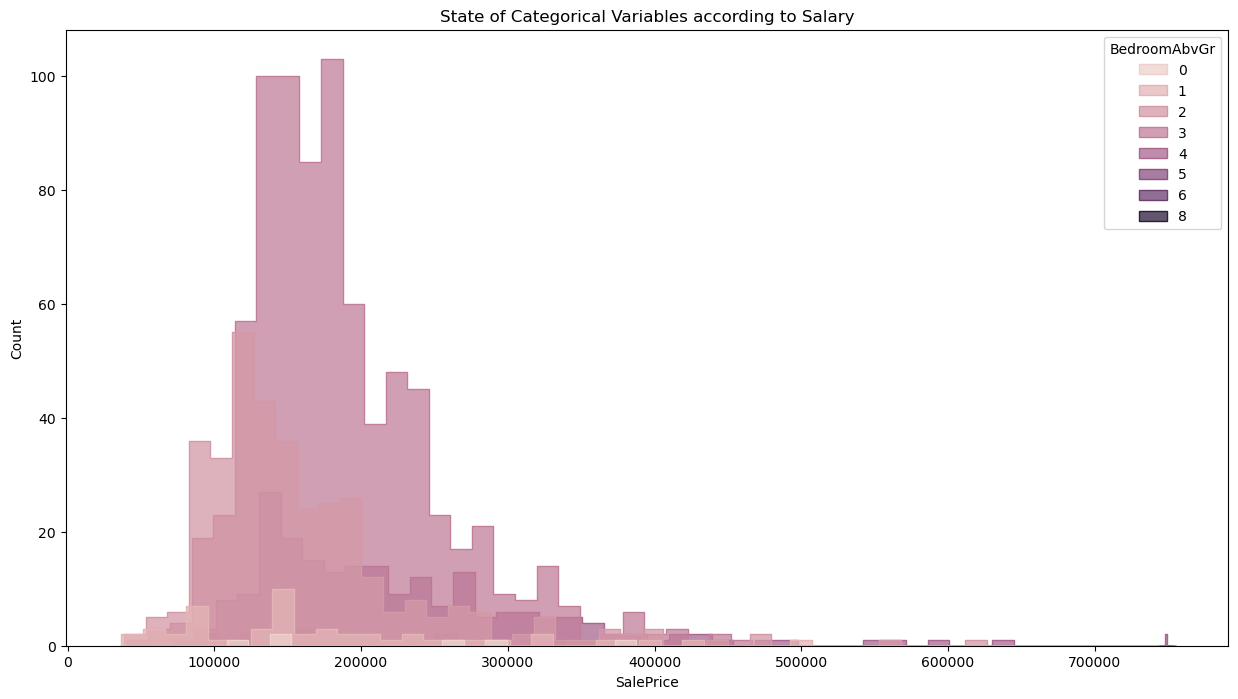

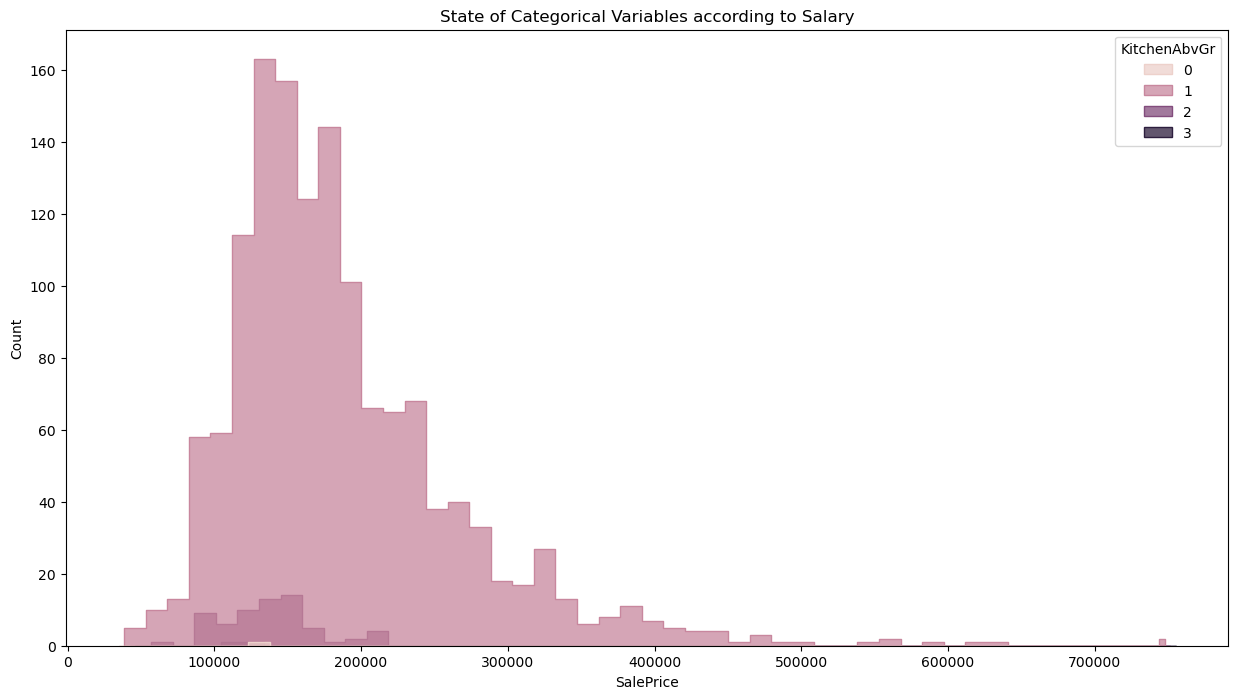

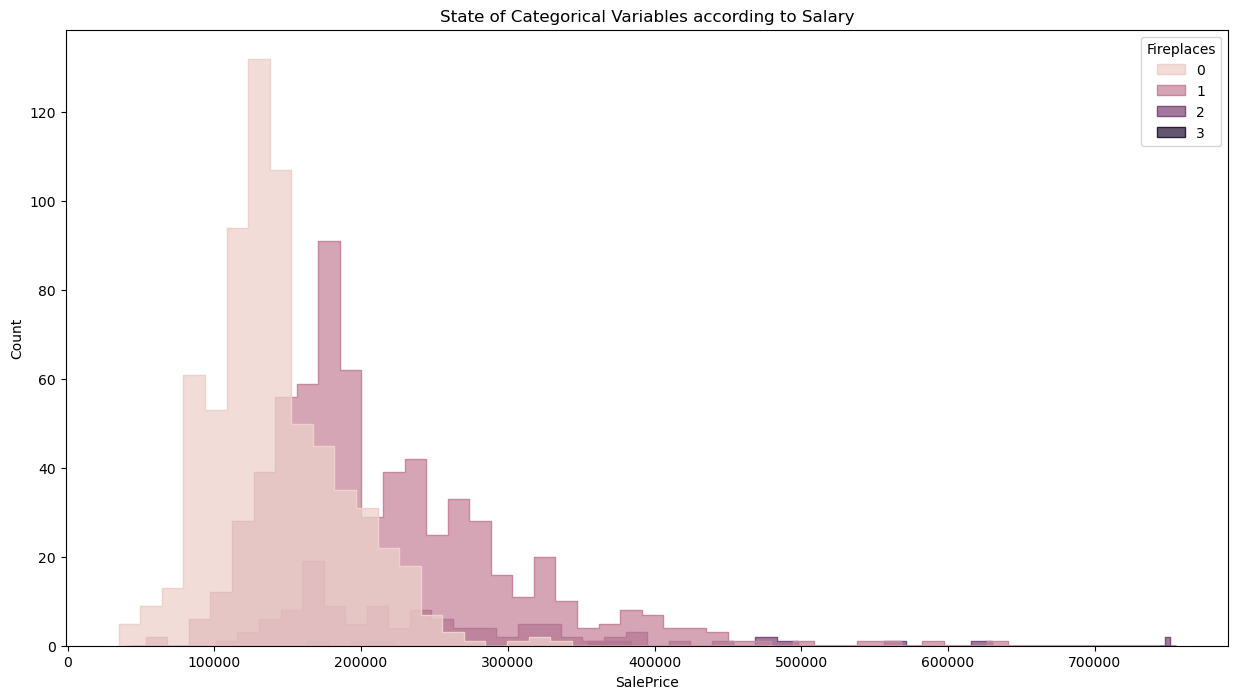

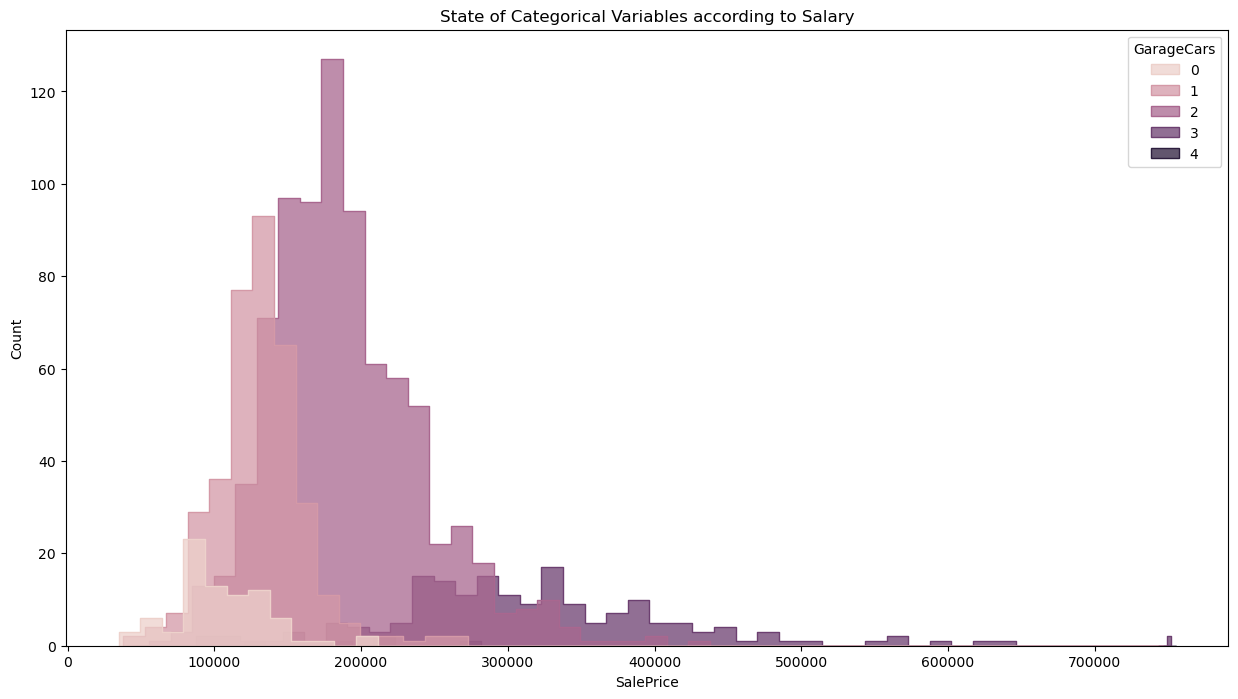

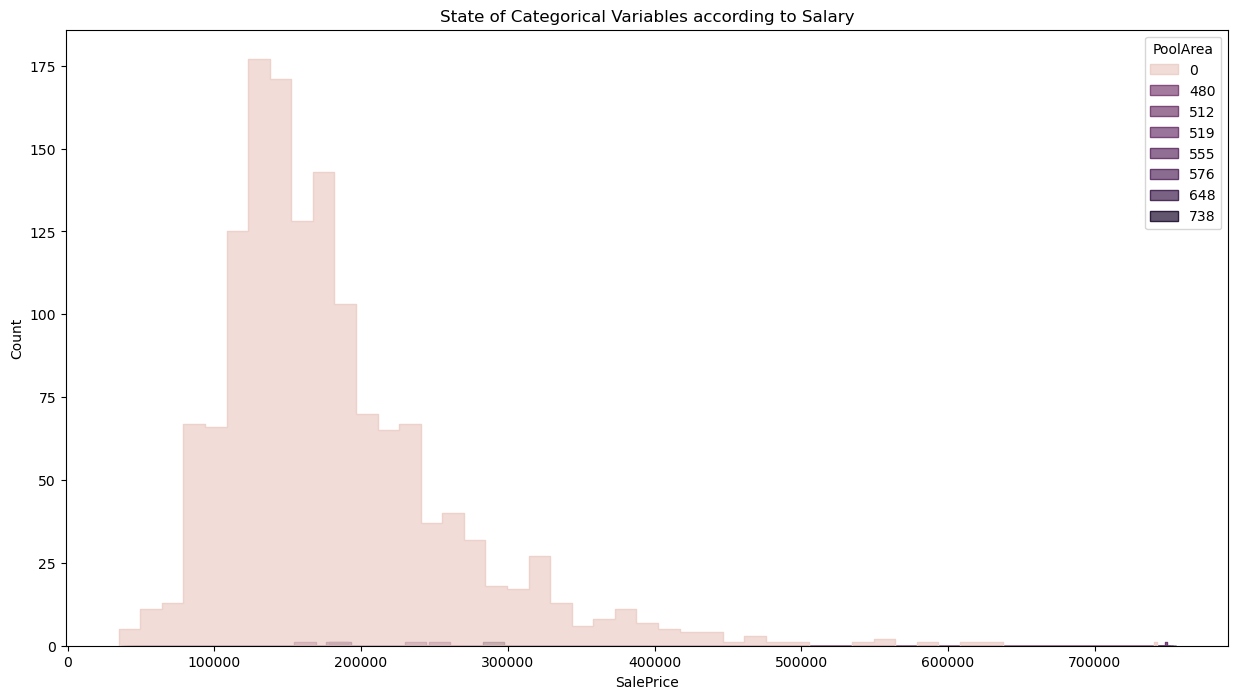

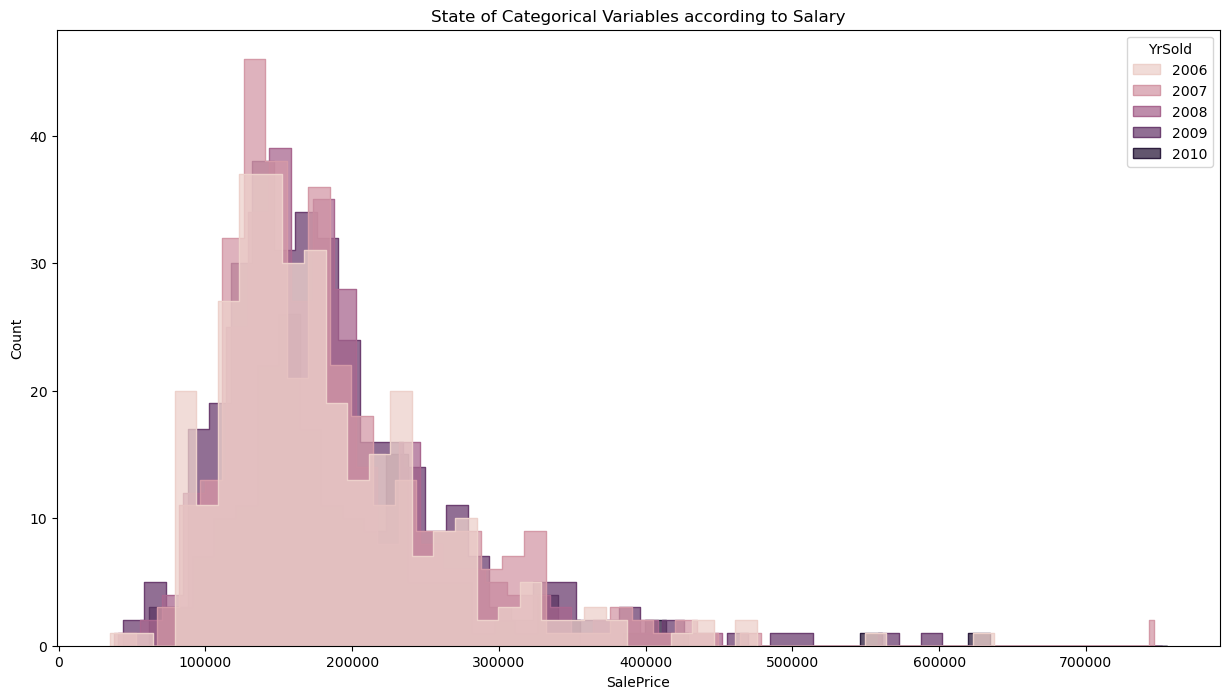

In [26]:
def target_vs_category_visual(dataframe,target, categorical_col):
    plt.figure(figsize=(15,8))
    sns.histplot(x=target,hue=categorical_col, data=dataframe,element="step",multiple="dodge")
    plt.title("State of Categorical Variables according to Salary")
    plt.show()

for col in cat_cols:
    target_vs_category_visual(df,"SalePrice",col)

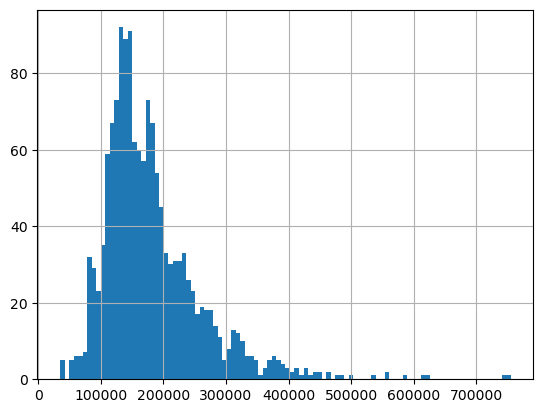

In [27]:
# Bağımlı değişkenin incelenmesi
df["SalePrice"].hist(bins=100)
plt.show()

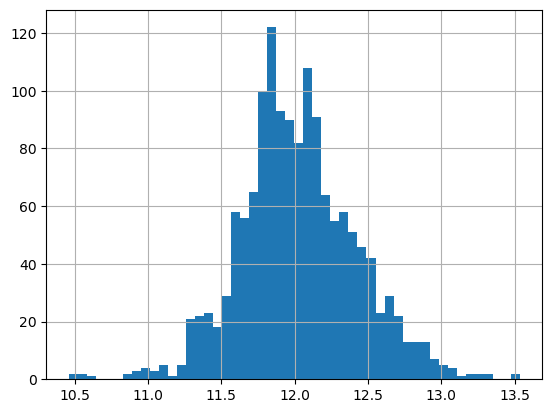

In [28]:
# Bağımlı değişkenin logaritmasının incelenmesi
np.log1p(df['SalePrice']).hist(bins=50)
plt.show()

### Kolerasyon Analizi

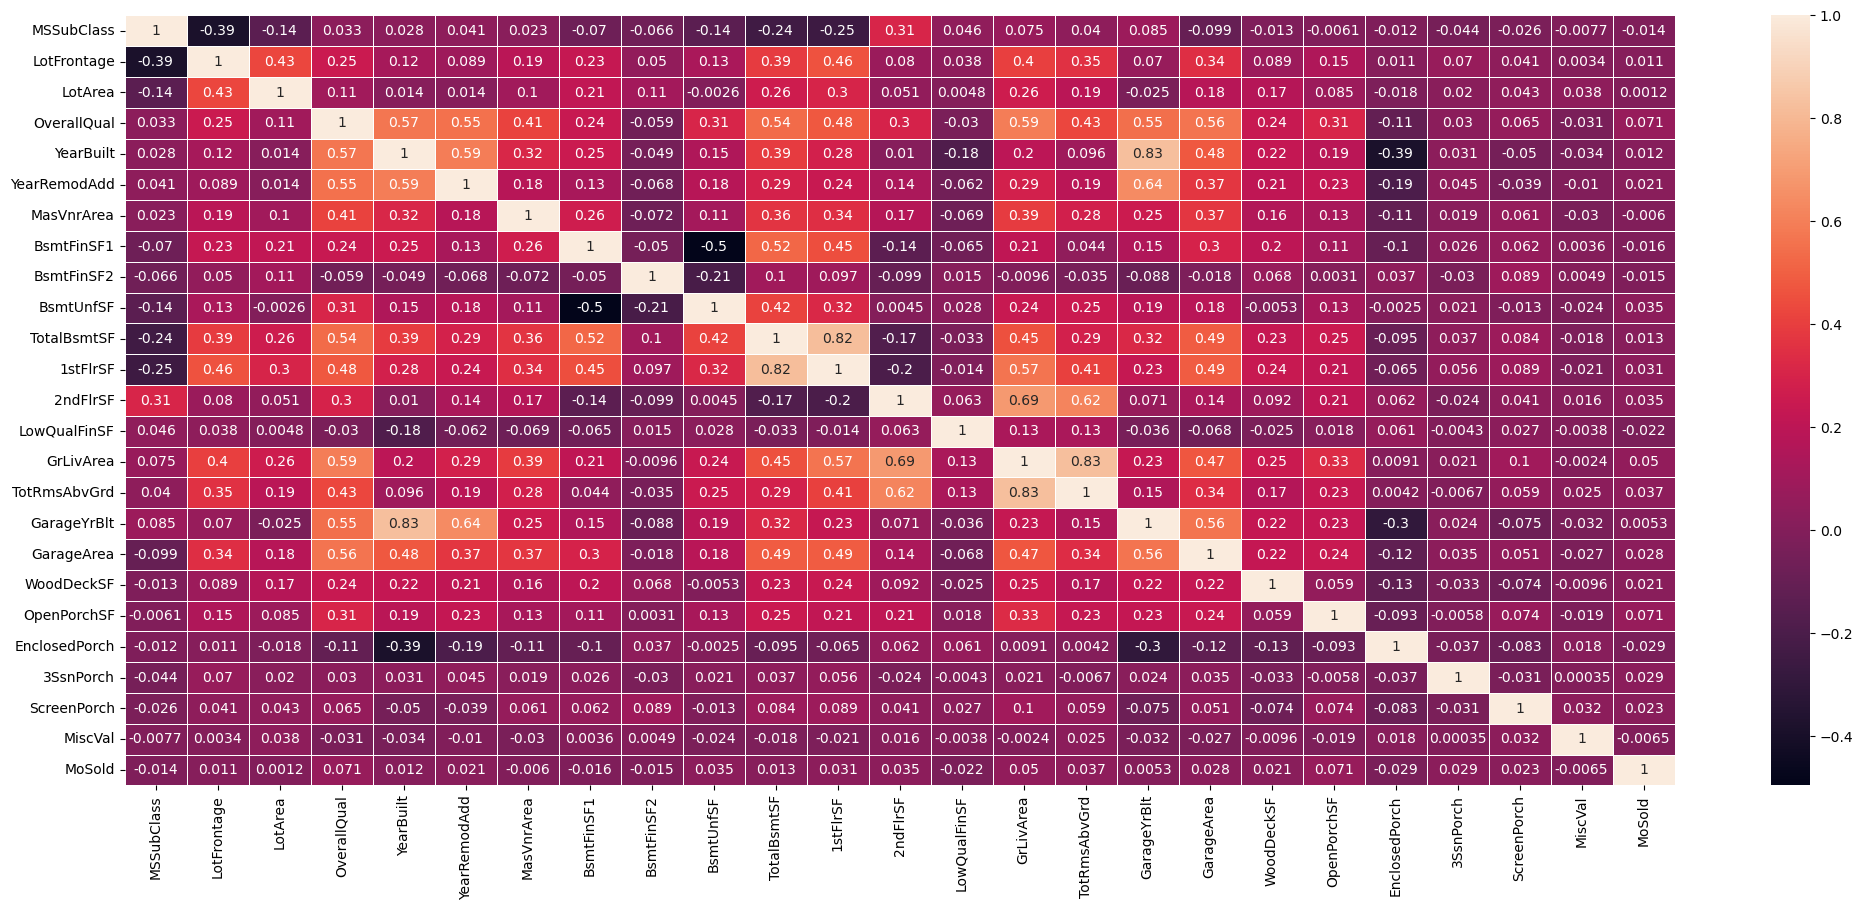

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [30]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.8):
    numeric_df = dataframe.select_dtypes(include=[float, int])

    corr = numeric_df.corr()
    cor_matrix = corr.abs()
    
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        fig, ax = plt.subplots(figsize=(25,10)) 
        sns.heatmap(df[num_cols].corr(), annot=True, linewidths=.5, ax=ax)
        plt.show()
    
    return drop_list

high_correlated_cols(df, plot=True)

## Data Processing and Feature Engineering

In [32]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710   
1          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262   
2          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786   
3          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717   
4          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500  
1             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0       

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Aykırı Değer Analizi

In [35]:
def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.9):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [36]:
for col in num_cols:
    print("******" , col , "******")
    print(check_outlier(df, col))
    print("***********************")

****** MSSubClass ******
False
***********************
****** LotFrontage ******
True
***********************
****** LotArea ******
True
***********************
****** OverallQual ******
False
***********************
****** YearBuilt ******
False
***********************
****** YearRemodAdd ******
False
***********************
****** MasVnrArea ******
True
***********************
****** BsmtFinSF1 ******
True
***********************
****** BsmtFinSF2 ******
True
***********************
****** BsmtUnfSF ******
False
***********************
****** TotalBsmtSF ******
True
***********************
****** 1stFlrSF ******
True
***********************
****** 2ndFlrSF ******
False
***********************
****** LowQualFinSF ******
True
***********************
****** GrLivArea ******
True
***********************
****** TotRmsAbvGrd ******
False
***********************
****** GarageYrBlt ******
False
***********************
****** GarageArea ******
False
***********************
****** WoodDeckSF *

In [37]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:        
    replace_with_thresholds(df,col)

In [38]:
for col in num_cols:
    print("******" , col , "******")
    print(check_outlier(df, col))
    print("***********************")

****** MSSubClass ******
False
***********************
****** LotFrontage ******
False
***********************
****** LotArea ******
False
***********************
****** OverallQual ******
False
***********************
****** YearBuilt ******
False
***********************
****** YearRemodAdd ******
False
***********************
****** MasVnrArea ******
False
***********************
****** BsmtFinSF1 ******
False
***********************
****** BsmtFinSF2 ******
False
***********************
****** BsmtUnfSF ******
False
***********************
****** TotalBsmtSF ******
False
***********************
****** 1stFlrSF ******
False
***********************
****** 2ndFlrSF ******
False
***********************
****** LowQualFinSF ******
False
***********************
****** GrLivArea ******
False
***********************
****** TotRmsAbvGrd ******
False
***********************
****** GarageYrBlt ******
False
***********************
****** GarageArea ******
False
***********************
****** Woo

### Eksik Değer Analizi

In [40]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
PoolQC          1453  99.52
MiscFeature     1406  96.30
Alley           1369  93.77
Fence           1179  80.75
MasVnrType       872  59.73
FireplaceQu      690  47.26
LotFrontage      259  17.74
GarageType        81   5.55
GarageYrBlt       81   5.55
GarageFinish      81   5.55
GarageQual        81   5.55
GarageCond        81   5.55
BsmtFinType2      38   2.60
BsmtExposure      38   2.60
BsmtFinType1      37   2.53
BsmtCond          37   2.53
BsmtQual          37   2.53
MasVnrArea         8   0.55
Electrical         1   0.07


#### Özel Duruma Sahip Eksik Değerlerin Doldurulması

In [42]:
# Bazı değişkenlerdeki boş değerler evin o özelliğe sahip olmadığını ifade etmektedir
not_null_cols = ["Alley", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2", "FireplaceQu", 
                 "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

df[not_null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Alley         91 non-null     object 
 1   BsmtQual      1423 non-null   object 
 2   BsmtCond      1423 non-null   object 
 3   BsmtExposure  1422 non-null   object 
 4   BsmtFinType1  1423 non-null   object 
 5   BsmtFinType2  1422 non-null   object 
 6   FireplaceQu   770 non-null    object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  GarageCond    1379 non-null   object 
 12  PoolQC        7 non-null      object 
 13  Fence         281 non-null    object 
 14  MiscFeature   54 non-null     object 
dtypes: float64(1), object(14)
memory usage: 171.2+ KB


In [43]:
for col in not_null_cols:
    if col != "GarageYrBlt":
        df[col].fillna("No",inplace=True)
    else:
        df[col].fillna(0,inplace=True)

missing_values_table(df)

             n_miss  ratio
MasVnrType      872  59.73
LotFrontage     259  17.74
MasVnrArea        8   0.55
Electrical        1   0.07


#### Sayısal Değişkenlerdeki Eksik Değerlerin Doldurulması

In [45]:
dff = pd.get_dummies(df, drop_first=True)

dff.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0          60         65.0   8450.0          7.0            5     2003.0          2003       196.0       706.0         0.0      150.0        856.0     856.0     854.0             0     1710.0             1             0         2         1             3             1             8           0       2003.0           2       548.0           0           61              0          0            0         0        0     2.0    2008     208500        False        False         True        False   
1          20         80.0   9600.0          6.0            8     1976.0          1976         0.0       978.0         0.0      284.0       1262.0    1262.0       0.0             0     1262.0             0             1         2         0             3             1             6           1       1976.0           2       460.0         298            0              0          0            0         0        0     5.0    2007     181500        False        False         True        False   
2          60         68.0  11250.0          7.0            5     2001.0          2002       162.0       486.0         0.0      434.0        920.0     920.0     866.0             0     1786.0             1             0         2         1             3             1             6           1       2001.0           2       608.0           0           42              0          0            0         0        0     9.0    2008     223500        False        False         True        False   
3          70         60.0   9550.0          7.0            5     1915.0          1970         0.0       216.0         0.0      540.0        756.0     961.0     756.0             0     1717.0             1             0         1         0             3             1             7           1       1998.0           3       642.0           0           35            272          0            0         0        0     2.0    2006     140000        False        False         True        False   
4          60         84.0  14260.0          8.0            5     2000.0          2000       350.0       655.0         0.0      490.0       1145.0    1145.0    1053.0             0     2198.0             1             0         2         1             4             1             9           1       2000.0           3       836.0         192           84              0          0            0         0        0    12.0    2008     250000        False        False         True        False   

   Street_Pave  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
0         True      True       False         False         False          True            False            False             True             False              False          False          False              True          False          False             False             True            False            False            False            False            False            False             False             True            False            False            False            False   
1         True      True       False         False

In [46]:
scaler = RobustScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         0.2    -0.190476 -0.254076          0.5          0.0   0.652174      0.243243    1.180723    0.452790         0.0  -0.559829    -0.269652 -0.453608  1.173077           0.0   0.380070           1.0           0.0       0.0       1.0           0.0           0.0           1.0        -1.0     0.604651         0.0    0.281573    0.000000     0.529412            0.0        0.0          0.0       0.0      0.0 -1.333333     0.0   0.541506          0.0          0.0          0.0          0.0   
1        -0.6     0.523810  0.030015          0.0          3.0   0.065217     -0.486486    0.000000    0.834679         0.0  -0.330769     0.538308  0.343643  0.000000           0.0  -0.312090           0.0           1.0       0.0       0.0           0.0           0.0           0.0         0.0    -0.023256         0.0   -0.082816    1.773810    -0.367647            0.0        0.0          0.0       0.0      0.0 -0.333333    -0.5   0.220173          0.0          0.0          0.0          0.0   
2         0.2    -0.047619  0.437624          0.5          0.0   0.608696      0.216216    0.975904    0.143910         0.0  -0.074359    -0.142289 -0.327933  1.189560           0.0   0.497489           1.0           0.0       0.0       1.0           0.0           0.0           0.0         0.0     0.558140         0.0    0.530021    0.000000     0.250000            0.0        0.0          0.0       0.0      0.0  1.000000     0.0   0.720024          0.0          0.0          0.0          0.0   
3         0.4    -0.428571  0.017663          0.5          0.0  -1.260870     -0.648649    0.000000   -0.235170         0.0   0.106838    -0.468657 -0.247423  1.038462           0.0   0.390885           1.0           0.0      -1.0       0.0           0.0           0.0           0.5         0.0     0.488372         1.0    0.670807    0.000000     0.147059          272.0        0.0          0.0       0.0      0.0 -1.333333    -1.0  -0.273728          0.0          0.0          0.0          0.0   
4         0.2     0.714286  1.181201          1.0          0.0   0.586957      0.162162    2.108434    0.381186         0.0   0.021368     0.305473  0.113893  1.446429           0.0   1.134029           1.0           0.0       0.0       1.0           1.0           0.0           1.5         0.0     0.534884         1.0    1.474120    1.142857     0.867647            0.0        0.0          0.0       0.0      0.0  2.000000     0.0   1.035406          0.0          0.0          0.0          0.0   

   Street_Pave  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
0          0.0       0.0         0.0           0.0           0.0           0.0              0.0              0.0              0.0               0.0                0.0            0.0            0.0               0.0            0.0            0.0               0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0               0.0              0.0              0.0              0.0              0.0              0.0   
1          0.0       0.0        

In [47]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         0.2    -0.190476 -0.254076          0.5          0.0   0.652174      0.243243    1.180723    0.452790         0.0  -0.559829    -0.269652 -0.453608  1.173077           0.0   0.380070           1.0           0.0       0.0       1.0           0.0           0.0           1.0        -1.0     0.604651         0.0    0.281573    0.000000     0.529412            0.0        0.0          0.0       0.0      0.0 -1.333333     0.0   0.541506          0.0          0.0          0.0          0.0   
1        -0.6     0.523810  0.030015          0.0          3.0   0.065217     -0.486486    0.000000    0.834679         0.0  -0.330769     0.538308  0.343643  0.000000           0.0  -0.312090           0.0           1.0       0.0       0.0           0.0           0.0           0.0         0.0    -0.023256         0.0   -0.082816    1.773810    -0.367647            0.0        0.0          0.0       0.0      0.0 -0.333333    -0.5   0.220173          0.0          0.0          0.0          0.0   
2         0.2    -0.047619  0.437624          0.5          0.0   0.608696      0.216216    0.975904    0.143910         0.0  -0.074359    -0.142289 -0.327933  1.189560           0.0   0.497489           1.0           0.0       0.0       1.0           0.0           0.0           0.0         0.0     0.558140         0.0    0.530021    0.000000     0.250000            0.0        0.0          0.0       0.0      0.0  1.000000     0.0   0.720024          0.0          0.0          0.0          0.0   
3         0.4    -0.428571  0.017663          0.5          0.0  -1.260870     -0.648649    0.000000   -0.235170         0.0   0.106838    -0.468657 -0.247423  1.038462           0.0   0.390885           1.0           0.0      -1.0       0.0           0.0           0.0           0.5         0.0     0.488372         1.0    0.670807    0.000000     0.147059          272.0        0.0          0.0       0.0      0.0 -1.333333    -1.0  -0.273728          0.0          0.0          0.0          0.0   
4         0.2     0.714286  1.181201          1.0          0.0   0.586957      0.162162    2.108434    0.381186         0.0   0.021368     0.305473  0.113893  1.446429           0.0   1.134029           1.0           0.0       0.0       1.0           1.0           0.0           1.5         0.0     0.534884         1.0    1.474120    1.142857     0.867647            0.0        0.0          0.0       0.0      0.0  2.000000     0.0   1.035406          0.0          0.0          0.0          0.0   

   Street_Pave  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
0          0.0       0.0         0.0           0.0           0.0           0.0              0.0              0.0              0.0               0.0                0.0            0.0            0.0               0.0            0.0            0.0               0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0               0.0              0.0              0.0              0.0              0.0              0.0   
1          0.0       0.0        

In [48]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

df["LotFrontage_imputed_knn"] = dff[["LotFrontage"]]
df["MasVnrArea_imputed_knn"] = dff[["MasVnrArea"]]

df.loc[df["LotFrontage"].isnull(), ["LotFrontage", "LotFrontage_imputed_knn"]]

LotFrontage  LotFrontage_imputed_knn
7             NaN                     82.0
12            NaN                     72.0
14            NaN                     77.4
16            NaN                     67.2
24            NaN                     70.2
31            NaN                     74.4
42            NaN                     71.0
43            NaN                     77.0
50            NaN                     73.4
64            NaN                     73.4
66            NaN                     79.0
76            NaN                     65.4
84            NaN                     74.8
95            NaN                     80.6
100           NaN                     84.2
104           NaN                     75.0
111           NaN                     68.2
113           NaN                     72.6
116           NaN                     62.6
120           NaN                     72.0
126           NaN                     58.2
131           NaN                     80.6
133           NaN                     70.8
136           NaN                     76.2
147           NaN                     62.8
149           NaN                     58.6
152           NaN                     85.2
153           NaN                     72.0
160           NaN                     72.8
166           NaN                     70.6
169           NaN                     92.0
170           NaN                     72.0
177           NaN                     84.6
180           NaN                     26.2
186           NaN                     63.6
191           NaN                     74.6
203           NaN                     42.4
207           NaN                     78.8
208           NaN                     73.4
214           NaN                     75.0
218           NaN                     63.8
221           NaN                     61.0
234           NaN                     78.6
237           NaN                     72.0
244           NaN                     75.2
249           NaN                     98.2
269           NaN                     76.8
287           NaN                     62.6
288           NaN                     70.8
293           NaN                     80.2
307           NaN                     55.2
308           NaN                     90.2
310           NaN                     78.0
319           NaN                     84.2
328           NaN                     63.0
330           NaN                     62.4
335           NaN                     59.2
342           NaN                     62.0
346           NaN                     79.6
347           NaN                     74.2
351           NaN                     49.0
356           NaN                     69.8
360           NaN                     65.4
361           NaN                     68.4
364           NaN                     72.8
366           NaN                     82.8
369           NaN                     62.2
370           NaN                     70.0
375           NaN                     72.2
384           NaN                     65.0
392           NaN                     62.4
393           NaN                     79.2
404           NaN                     69.4
405           NaN                     90.8
412           NaN                     69.6
421           NaN                     87.6
426           NaN                     76.0
447           NaN                     62.4
452           NaN                     71.6
457           NaN                     94.4
458           NaN                     52.6
459           NaN                     77.6
465           NaN                     45.0
470           NaN                     65.6
484           NaN                     67.6
490           NaN                     37.0
496           NaN                     61.2
516           NaN                     82.0
518           NaN                     68.2
529           NaN                     86.8
537           NaN                     69.4
538           NaN                     78.8
539    

In [49]:
df.loc[df["MasVnrArea"].isnull(), ["MasVnrArea", "MasVnrArea_imputed_knn"]]

MasVnrArea  MasVnrArea_imputed_knn
234          NaN                    16.8
529          NaN                   101.2
650          NaN                    19.0
936          NaN                    49.0
973          NaN                    81.6
977          NaN                    69.2
1243         NaN                   341.4
1278         NaN                    34.4

In [50]:
df["LotFrontage"] = df["LotFrontage_imputed_knn"]
df["MasVnrArea"] = df["MasVnrArea_imputed_knn"]
df.drop(columns=[col for col in df.columns if col.endswith('_imputed_knn')], inplace=True)
df.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          60       RL         65.0   8450.0   Pave    No      Reg         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     2Story          7.0            5     2003.0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y      SBrkr     856.0     854.0             0     1710.0   
1          20       RL         80.0   9600.0   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Feedr       Norm     1Fam     1Story          6.0            8     1976.0          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y      SBrkr    1262.0       0.0             0     1262.0   
2          60       RL         68.0  11250.0   Pave    No      IR1         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     2Story          7.0            5     2001.0          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y      SBrkr     920.0     866.0             0     1786.0   
3          70       RL         60.0   9550.0   Pave    No      IR1         Lvl    AllPub    Corner       Gtl       Norm       Norm     1Fam     2Story          7.0            5     1915.0          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ       216.0          Unf         0.0      540.0        756.0    GasA        Gd          Y      SBrkr     961.0     756.0             0     1717.0   
4          60       RL         84.0  14260.0   Pave    No      IR1         Lvl    AllPub       FR2       Gtl       Norm       Norm     1Fam     2Story          8.0            5     2000.0          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ       655.0          Unf         0.0      490.0       1145.0    GasA        Ex          Y      SBrkr    1145.0    1053.0             0     2198.0   
5          50       RL         85.0  14115.0   Pave    No      IR1         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     1.5Fin          5.0            5     1993.0          1995     Gable  CompShg     VinylSd     VinylSd        NaN         0.0        TA        TA       Wood       Gd       TA           No          GLQ       732.0          Unf         0.0       64.0        796.0    GasA        Ex          Y      SBrkr     796.0     566.0             0     1362.0   
6          20       RL         75.0  10084.0   Pave    No      Reg         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     1Story          8.0            5     2004.0          2005     Gable  CompShg     VinylSd     VinylSd      Stone       186.0        Gd        TA      PConc       Ex       TA           Av          GLQ      1369.0          Unf         0.0      317.0       1686.0    GasA        Ex          Y      SBrkr    1694.0       0.0             0     1694.0   
7          60       RL         82.0  10382.0   Pave    No      IR1 

#### Kategorik Değişkenlerdeki Eksik Değerlerin Doldurulması

In [52]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [53]:
# Bu kısımda hedef değişken ile MasVnrType'daki değerler arasındaki ilişkiye göre değer ataması yapıyorum.
# Ortalaması en yüksek değer Stone, en düşük değer ise BrkCmn'idi.
dff = df.copy() 

# dff üzerinde SalePrice'a göre yüksekten düşüğe sıralama
dff = dff.sort_values(by="SalePrice", ascending=False).reset_index(drop=True)

# 1. İlk 175 satırdaki eksik MasVnrType değerlerine "Stone" atama
dff.loc[:174, "MasVnrType"] = dff.loc[:174, "MasVnrType"].fillna("Stone")

# 2. Son 5 satırdaki eksik MasVnrType değerlerine "BrkCmn" atama
dff.loc[-5:, "MasVnrType"] = dff.loc[-5:, "MasVnrType"].fillna("BrkCmn")

# 3. Geri kalan eksik MasVnrType değerlerine "BrkFace" atama
dff["MasVnrType"] = dff["MasVnrType"].fillna("BrkFace")

# Eski ve yeni değerleri karşılaştırmalı olarak yan yana koyma
comparison_df = pd.DataFrame({
    "Original_MasVnrType": df["MasVnrType"],
    "Updated_MasVnrType": dff["MasVnrType"]
})

# dff'deki güncellenmiş MasVnrType'ı df'ye eşitleme
df["MasVnrType"] = dff["MasVnrType"]

# Sonuçları görüntüleme
print(comparison_df)


     Original_MasVnrType Updated_MasVnrType
0                BrkFace            BrkFace
1                    NaN              Stone
2                BrkFace            BrkFace
3                    NaN              Stone
4                BrkFace              Stone
5                    NaN              Stone
6                  Stone              Stone
7                  Stone            BrkFace
8                    NaN              Stone
9                    NaN              Stone
10                   NaN              Stone
11                 Stone            BrkFace
12                   NaN              Stone
13                 Stone              Stone
14               BrkFace              Stone
15                   NaN            BrkFace
16               BrkFace            BrkFace
17                   NaN            BrkFace
18                   NaN              Stone
19                   NaN              Stone
20               BrkFace              Stone
21                   NaN        

In [54]:
df['MasVnrType'].value_counts()

MasVnrType
BrkCmn     848
BrkFace    445
Stone      167
Name: count, dtype: int64

In [55]:
def quick_missing_imp(data, cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

df = quick_missing_imp(df, cat_length=20)
df.head(10)

# BEFORE
Electrical    1
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
Electrical    0
dtype: int64 




MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          60       RL         65.0   8450.0   Pave    No      Reg         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     2Story          7.0            5     2003.0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y      SBrkr     856.0     854.0             0     1710.0   
1          20       RL         80.0   9600.0   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Feedr       Norm     1Fam     1Story          6.0            8     1976.0          1976     Gable  CompShg     MetalSd     MetalSd      Stone         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y      SBrkr    1262.0       0.0             0     1262.0   
2          60       RL         68.0  11250.0   Pave    No      IR1         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     2Story          7.0            5     2001.0          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y      SBrkr     920.0     866.0             0     1786.0   
3          70       RL         60.0   9550.0   Pave    No      IR1         Lvl    AllPub    Corner       Gtl       Norm       Norm     1Fam     2Story          7.0            5     1915.0          1970     Gable  CompShg     Wd Sdng     Wd Shng      Stone         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ       216.0          Unf         0.0      540.0        756.0    GasA        Gd          Y      SBrkr     961.0     756.0             0     1717.0   
4          60       RL         84.0  14260.0   Pave    No      IR1         Lvl    AllPub       FR2       Gtl       Norm       Norm     1Fam     2Story          8.0            5     2000.0          2000     Gable  CompShg     VinylSd     VinylSd      Stone       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ       655.0          Unf         0.0      490.0       1145.0    GasA        Ex          Y      SBrkr    1145.0    1053.0             0     2198.0   
5          50       RL         85.0  14115.0   Pave    No      IR1         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     1.5Fin          5.0            5     1993.0          1995     Gable  CompShg     VinylSd     VinylSd      Stone         0.0        TA        TA       Wood       Gd       TA           No          GLQ       732.0          Unf         0.0       64.0        796.0    GasA        Ex          Y      SBrkr     796.0     566.0             0     1362.0   
6          20       RL         75.0  10084.0   Pave    No      Reg         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     1Story          8.0            5     2004.0          2005     Gable  CompShg     VinylSd     VinylSd      Stone       186.0        Gd        TA      PConc       Ex       TA           Av          GLQ      1369.0          Unf         0.0      317.0       1686.0    GasA        Ex          Y      SBrkr    1694.0       0.0             0     1694.0   
7          60       RL         82.0  10382.0   Pave    No      IR1 

In [56]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### Rare Encoding

In [58]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT     RATIO    TARGET_MEAN
MSZoning                                
C (all)      10  0.006849   74528.000000
FV           65  0.044521  214014.061538
RH           16  0.010959  131558.375000
RL         1151  0.788356  191004.994787
RM          218  0.149315  126316.830275


Street : 2
        COUNT    RATIO    TARGET_MEAN
Street                               
Grvl        6  0.00411  130190.500000
Pave     1454  0.99589  181130.538514


Alley : 3
       COUNT     RATIO    TARGET_MEAN
Alley                                
Grvl      50  0.034247  122219.080000
No      1369  0.937671  183452.131483
Pave      41  0.028082  168000.585366


LotShape : 4
          COUNT     RATIO    TARGET_MEAN
LotShape                                
IR1         484  0.331507  206101.665289
IR2          41  0.028082  239833.365854
IR3          10  0.006849  216036.500000
Reg         925  0.633562  164754.818378


LandContour : 4
             COUNT     RATIO    TARGET_MEAN
LandContou

In [59]:
df["ExterCond"] = np.where(df.ExterCond.isin(["Fa", "Po"]), "FaPo", df["ExterCond"])
df["ExterCond"] = np.where(df.ExterCond.isin(["Ex", "Gd"]), "Ex", df["ExterCond"])
df["LotShape"] = np.where(df.LotShape.isin(["IR1", "IR2", "IR3"]), "IR", df["LotShape"])
df["GarageQual"] = np.where(df.GarageQual.isin(["Fa", "Po"]), "FaPo", df["GarageQual"])
df["GarageQual"] = np.where(df.GarageQual.isin(["Ex", "Gd", "TA"]), "ExGd", df["GarageQual"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType2"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType2"])

In [60]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df


df = rare_encoder(df,0.01)

In [61]:
df.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          60       RL         65.0   8450.0   Pave    No      Reg         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     2Story          7.0            5     2003.0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y      SBrkr     856.0     854.0             0     1710.0   
1          20       RL         80.0   9600.0   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Feedr       Norm     1Fam     1Story          6.0            8     1976.0          1976     Gable  CompShg     MetalSd     MetalSd      Stone         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y      SBrkr    1262.0       0.0             0     1262.0   
2          60       RL         68.0  11250.0   Pave    No       IR         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     2Story          7.0            5     2001.0          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y      SBrkr     920.0     866.0             0     1786.0   
3          70       RL         60.0   9550.0   Pave    No       IR         Lvl    AllPub    Corner       Gtl       Norm       Norm     1Fam     2Story          7.0            5     1915.0          1970     Gable  CompShg     Wd Sdng     Wd Shng      Stone         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ       216.0          Unf         0.0      540.0        756.0    GasA        Gd          Y      SBrkr     961.0     756.0             0     1717.0   
4          60       RL         84.0  14260.0   Pave    No       IR         Lvl    AllPub       FR2       Gtl       Norm       Norm     1Fam     2Story          8.0            5     2000.0          2000     Gable  CompShg     VinylSd     VinylSd      Stone       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ       655.0          Unf         0.0      490.0       1145.0    GasA        Ex          Y      SBrkr    1145.0    1053.0             0     2198.0   
5          50       RL         85.0  14115.0   Pave    No       IR         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     1.5Fin          5.0            5     1993.0          1995     Gable  CompShg     VinylSd     VinylSd      Stone         0.0        TA        TA       Rare       Gd       TA           No          GLQ       732.0          Unf         0.0       64.0        796.0    GasA        Ex          Y      SBrkr     796.0     566.0             0     1362.0   
6          20       RL         75.0  10084.0   Pave    No      Reg         Lvl    AllPub    Inside       Gtl       Norm       Norm     1Fam     1Story          8.0            5     2004.0          2005     Gable  CompShg     VinylSd     VinylSd      Stone       186.0        Gd        TA      PConc       Ex       TA           Av          GLQ      1369.0          Unf         0.0      317.0       1686.0    GasA        Ex          Y      SBrkr    1694.0       0.0             0     1694.0   
7          60       RL         82.0  10382.0   Pave    No       IR 

### Feature Engineering

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [64]:
# Yaş
df["NEW_HouseAge"] = df['YrSold'] - df['YearBuilt']

# Yenilenme Yaşı
df["NEW_RemodAge"] = df['YrSold'] - df['YearRemodAdd']

# Yaşam Alanı Başına Fiyat
df["NEW_LivingAreaPrice"] = df['SalePrice'] / df['GrLivArea']

# Toplam Banyo Sayısı
df["NEW_TotalBathrooms"] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

# Toplam Oda Sayısı
df["NEW_TotalRooms"] = df['TotRmsAbvGrd'] + df['BedroomAbvGr'] + df['KitchenAbvGr']

# Toplam Bodrum Alanı
df["NEW_TotalBasementArea"] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF']

# Arsa Başına Düşen Yaşam Alanı Oranı
df["NEW_LivingAreaLotRatio"] = df['GrLivArea'] / df['LotArea']

# Arsa Genişlik Oranı
df["NEW_LotFrontageRatio"] = df['LotFrontage'] / df['LotArea']

# İlk Kat Alanı Oranı
df["NEW_1stFlrAreaRatio"] = df['1stFlrSF'] / df['GrLivArea']

# Bodrum Alanı Oranı
df["NEW_BasementAreaRatio"] = df['TotalBsmtSF'] / df['GrLivArea']

# İkinci Kat Alanı Oranı
df["NEW_2ndFlrAreaRatio"] = df['2ndFlrSF'] / df['GrLivArea']

# Garaj Alanı Oranı
df["NEW_GarageAreaRatio"] = df['GarageArea'] / df['GrLivArea']

# Garaj Yaşı
df["NEW_GarageAge"] = df['YrSold'] - df['GarageYrBlt']

# Araba Başına Garaj Alanı (0'a bölme hatasını önlemek için 0 atayın)
df["NEW_GarageAreaPerCar"] = np.where(df['GarageCars'] == 0, 0, df['GarageArea'] / df['GarageCars'])

# Ev Yenilenmiş Mi?
df["NEW_HasRemodel"] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)

# İki Katlı Ev mi?
df["NEW_IsTwoStory"] = df['HouseStyle'].apply(lambda x: 1 if x in ['2Story', '2.5Fin', '2.5Unf'] else 0)

# Çatı Tipi Farklılığı
df["NEW_RoofStyleMaterial"] = df['RoofStyle'] + "_" + df['RoofMatl']

# Mutfak Başına Düşen Oda Sayısı (0'a bölme hatasını önlemek için 0 atayın)
df["NEW_RoomsPerKitchen"] = np.where(df['KitchenAbvGr'] == 0, 0, df['TotRmsAbvGrd'] / df['KitchenAbvGr'])

# Yatak Odası Başına Banyo Sayısı (0'a bölme hatasını önlemek için 0 atayın)
df["NEW_BathroomsPerBedroom"] = np.where(df['BedroomAbvGr'] == 0, 0, df['FullBath'] / df['BedroomAbvGr'])

# Veranda Alanı Toplamı
df["NEW_TotalPorchArea"] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Kapalı Alan Oranı
df["NEW_ClosedAreaRatio"] = (df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea']) / df['LotArea']

# Evin Zemin ve İkinci Kat Alanı Oranı (0'a bölme hatasını önlemek için 0 atayın)
df["NEW_1st2ndFlrRatio"] = np.where(df['2ndFlrSF'] == 0, 0, df['1stFlrSF'] / df['2ndFlrSF'])

# Düşük Kaliteli Alan Oranı
df["NEW_LowQualFinAreaRatio"] = df['LowQualFinSF'] / df['GrLivArea']

# Bina Tipine Göre Ortalama Fiyat
df["NEW_AvgPriceByBldgType"] = df.groupby("BldgType")["SalePrice"].transform("mean")

# Bodrum Alanı Başına Banyo Sayısı (0'a bölme hatasını önlemek için 0 atayın)
df["NEW_BathroomsPerBasementArea"] = np.where(df['TotalBsmtSF'] == 0, 0, (df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']) / df['TotalBsmtSF'])

# Banyo Alanı Oranı
df["NEW_BathroomsAreaRatio"] = (df['FullBath'] + df['HalfBath']) / df['GrLivArea']

# Garaj Alanı Başına Arsa Alanı (0'a bölme hatasını önlemek için 0 atayın)
df["NEW_LotAreaPerGarage"] = np.where(df['GarageArea'] == 0, 0, df['LotArea'] / df['GarageArea'])

# Ahşap Güverte Oranı (0'a bölme hatasını önlemek için 0 atayın)
df["NEW_WoodDeckRatio"] = np.where((df['OpenPorchSF'] + df['EnclosedPorch']) == 0, 0, df['WoodDeckSF'] / (df['OpenPorchSF'] + df['EnclosedPorch']))

# Toplam Bina Alanı
df["NEW_TotalBuildingArea"] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

In [65]:
drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature"]
df.drop(drop_list, axis=1, inplace=True)

### Label Encoding ve One Hot Encoding

In [67]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df, col)

Observations: 1460
Variables: 100
cat_cols: 54
num_cols: 46
cat_but_car: 0
num_but_cat: 19


In [68]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [69]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  SalePrice  NEW_HouseAge  NEW_RemodAge  NEW_LivingAreaPrice  NEW_TotalBathrooms  NEW_TotalRooms  NEW_TotalBasementArea  NEW_LivingAreaLotRatio  NEW_LotFrontageRatio  NEW_1stFlrAreaRatio  NEW_BasementAreaRatio  NEW_2ndFlrAreaRatio  \
0          60         65.0   8450.0          7.0     2003.0          2003       196.0       706.0         0.0      150.0        856.0     856.0     854.0     1710.0             8       2003.0       548.0           0           61              0     2.0     208500           5.0             5           121.929825                 3.5              12                  856.0                0.202367              0.007692             0.500585               0.500585             0.499415   
1          20         80.0   9600.0          6.0     1976.0          1976         0.0       978.0         0.0      284.0       1262.0    1262.0       0.0     1262.0             6       1976.0       460.0         298            0              0     5.0     181500          31.0            31           143.819334                 2.5              10                 1262.0                0.131458              0.008333             1.000000               1.000000             0.000000   
2          60         68.0  11250.0          7.0     2001.0          2002       162.0       486.0         0.0      434.0        920.0     920.0     866.0     1786.0             6       2001.0       608.0           0           42              0     9.0     223500           7.0             6           125.139978                 3.5              10                  920.0                0.158756              0.006044             0.515118               0.515118             0.484882   
3          70         60.0   9550.0          7.0     1915.0          1970         0.0       216.0         0.0      540.0        756.0     961.0     756.0     1717.0             7       1998.0       642.0           0           35            272     2.0     140000          91.0            36            81.537566                 2.0              11                  756.0                0.179791              0.006283             0.559697               0.440303             0.440303   
4          60         84.0  14260.0          8.0     2000.0          2000       350.0       655.0         0.0      490.0       1145.0    1145.0    1053.0     2198.0             9       2000.0       836.0         192           84              0    12.0     250000           8.0             8           113.739763                 3.5              14                 1145.0                0.154137              0.005891             0.520928               0.520928             0.479072   

   NEW_GarageAreaRatio  NEW_GarageAge  NEW_GarageAreaPerCar  NEW_RoomsPerKitchen  NEW_BathroomsPerBedroom  NEW_TotalPorchArea  NEW_ClosedAreaRatio  NEW_1st2ndFlrRatio  NEW_BathroomsPerBasementArea  NEW_BathroomsAreaRatio  NEW_LotAreaPerGarage  NEW_WoodDeckRatio  NEW_TotalBuildingArea  MSZoning_RH  MSZoning_RL  MSZoning_RM  MSZoning_Rare  LotShape_1  LotConfig_CulDSac  LotConfig_FR2  LotConfig_Inside  LotConfig_Rare  Condition1_Feedr  Condition1_Norm  Condition1_PosN  Condition1_RRAn  \
0             0.320468            5.0            274.000000                  8.0                 0.666667                  61             0.368521            1.002342                      0.001168                0.001754             15.419708           0.000000                 2566.0        False         True        False          False        True              False          False              True           False             False             True            False            False   
1             0.364501           31.0            230.000000                  6.0                 0.666667     

In [70]:
df.shape

(1460, 227)

## Modelleme

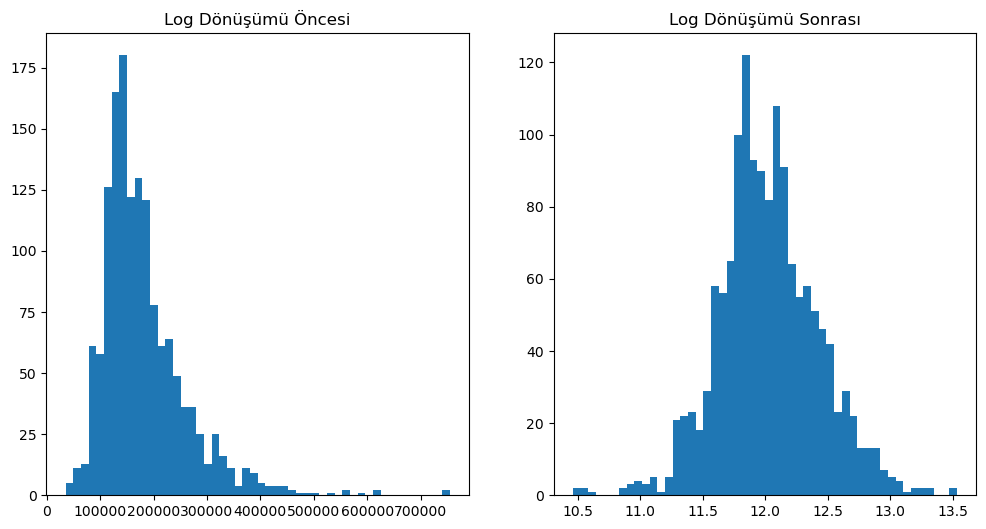

In [72]:
# Log dönüşümü öncesi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=50)
plt.title("Log Dönüşümü Öncesi")

# Log dönüşümü sonrası
plt.subplot(1, 2, 2)
plt.hist(np.log1p(df['SalePrice']), bins=50)
plt.title("Log Dönüşümü Sonrası")

plt.show()

In [73]:
#Base modeller üzerinde testler

X = df.drop(["SalePrice"], axis=1)
y = np.log1p(df['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.0676 (LR) 
RMSE: 0.0698 (Ridge) 
RMSE: 0.1036 (Lasso) 
RMSE: 0.095 (ElasticNet) 
RMSE: 0.2127 (KNN) 
RMSE: 0.1125 (CART) 
RMSE: 0.0849 (RF) 
RMSE: 0.1934 (SVR) 
RMSE: 0.061 (GBM) 
RMSE: 0.0704 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7320
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 182
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7315
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 

In [74]:
# lgbm modeli üzerinde hiperparametre optimizasyonlarının gerçekleştirimi

lgbm_model = LGBMRegressor(random_state=46)

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7320
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 182
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7315
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 178
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

In [75]:
print(f"RMSE: {round(rmse, 4)}")

RMSE: 0.0664


In [76]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1000, 1500],
               "colsample_bytree": [0.5, 0.7, 1]
             }

lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

lgbm_gs_best.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7323
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 177
[LightGBM] [Info] Start training from score 12.027102


{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 1500}

In [77]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7768
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 188
[LightGBM] [Info] Start training from score 12.024057
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7320
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 182
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

In [78]:
print(f"RMSE: {round(rmse, 4)}")

RMSE: 0.0623


In [79]:
# Hata skoru olarak 22222 değerinin altına düşme

lgbm_tuned = LGBMRegressor(**lgbm_gs_best.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7323
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 177
[LightGBM] [Info] Start training from score 12.027102


In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.05396982239699719

In [81]:
# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(y_pred)
new_y_test = np.expm1(y_test)

np.sqrt(mean_squared_error(new_y_test, new_y))

# RMSE : 9809.33903089798

9809.33903089798